<a href="https://colab.research.google.com/github/ValKhv/DGT_Tokenomics/blob/main/DGT_TOKENOMIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tokenomics Model for Decentralized Platform DGT**  <mark>v 0.2</mark>
--------------------------
This Jupyter Notebook outlines the tokenomics model for a hypothetical decentralized platform DGT. This tokenomic model is a comprehensive representation of the multi-faceted dynamics of a token within a blockchain network. It encapsulates key dimensions of token utility, user engagement, network performance, and market dynamics.

# #1. INTRODUCTION
----------------------

## 1.1 The purpose
The world of cryptocurrency has grown exponentially in the past few years and it continues to evolve in diverse ways. One area that has garnered significant interest is the development of decentralized ecosystems and the accompanying tokenomics models that govern these ecosystems. The tokenomics, or token economics, represents the economic framework within which the token operates, influencing factors such as distribution, demand, supply, and overall value.

In this project, we aim to develop a robust tokenomics model for the Decentralized Ecosystem (DEC). The DEC model simulates a decentralized network, incorporating a range of parameters including the growth of nodes, user base, network performance, and token price.

Our model also pays specific attention to the minting process, simulating the issuance and distribution of tokens to nodes based on specific rules and metrics such as the Service Level Agreement (SLA). It is further informed by the Fisher equation, allowing for adjustments based on token circulation.

The main purpose of this model is to simulate the dynamic behavior of various aspects of the platform, including the number of nodes, platform performance, user base, token price, and more. The model is designed to provide valuable insights into how these variables interact over time, based on a set of initial parameters and assumptions.

## 1.2 Building Blocks
The model consists of the following components:

1. **Node Growth Simulation**: A model to simulate the growth of nodes in the network over time, based on factors such as initial node count, growth rate, and maximum node limit.

2. **User Growth and Retention Modeling**: This part of the model simulates user behavior, including growth, activity, and retention patterns.

3. **Network Performance Simulation**: A model to estimate the network's performance over time, considering factors like network load and node performance.
4. **Token Price Simulation**: The model estimates the price of the platform's token over time, taking into account network performance, market dynamics, and other key factors.

5. **Token Minting and Burn Mechanisms**: This component models the creation (minting) and destruction (burn) of tokens, based on supply-demand dynamics.

6. **Integral Platform Metrics Simulation**: This section provides calculations of key platform metrics such as Total Value Locked (TVL) and Market Capitalization.

7. **Risk Analysis**: This part of the model identifies and simulates key risks and uncertainties, providing insights into their potential impacts.

8. **Decentralization Metrics Calculation**: The model calculates key metrics related to token distribution and decentralization, providing insights into the platform's governance structure.

9. **Governance and Regulatory Considerations**: This section discusses the potential impact of governance decisions and regulatory factors on the platform's tokenomics.

## 1.3 Assumption

To ensure that the tokenomics model aligns with realistic conditions and constraints, we set a series of initial assumptions. These assumptions influence the conditions under which the model operates and the results it produces. They represent key parameters such as the total timeline of simulation, maximum number of nodes, initial number of nodes, and time until token distribution begins. Other parameters considered include the average number of nodes per cluster, the maximum supply of tokens, and the nominal price of tokens. These assumptions are established based on data available, industry standards, and theoretical underpinnings to guide the simulation.

In [48]:
## Mount Disk Drive to save df at final stage (please replace it to have ability in Jupyter Notebook or comment ot)
from google.colab import drive
drive.mount('/content/drive')
Model_Version = "0.2"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Assumptions
total_timeline_years = 9
total_timeline_months = total_timeline_years * 12 # converting years to months
t0 = 1 # time during which tokens are not distributed, nodes grow before emission
N0 = 30 # number of nodes during the period 0-t0
Npercluster = 4 # the average number of nodes per cluster
Max_Supply = 8589869056 # Maximum number of tokens Supply_Max (Maximum Supply)
Pnominal = 0.8 # USD (1 DEC = 0.8)

# Pandas DataFrame Initialization
df = pd.DataFrame(index=np.arange(0, total_timeline_months),
                  columns=["Month", "Nodes", "ArbitratorNodes", "NotaryNodes", "LuckyNodes", "TokensIssued", "TokensPerNode", "RemainingTokens"])

# Setting the 'Month' column to a range of months from 0 to total_timeline_months
df["Month"] = np.arange(0, total_timeline_months)

# #2. NODES
-----------
The node growth simulation forms the basis of our tokenomics model. It projects the increase in the number of nodes within the DEC network over a given timeframe. Nodes represent crucial participants within the network, processing transactions and maintaining its operational integrity. In this model, nodes are incentivized to join and remain in the network through the distribution of DEC tokens.

In this node growth simulation, two models are used to calculate the increase in the number of nodes over time:


For each model, we also calculate the number of specific node types: arbitrator nodes, notary nodes, and validator nodes. The number of arbitrator and notary nodes are assumed to increase linearly with the total number of nodes, whereas the number of validator nodes is the total nodes minus arbitrator and notary nodes.

<b>`LuckyNodes`</b> (<i>the function that presents the number of nodes involved in minting</i>) are also calculated, representing nodes that successfully participate in minting. The number of "LuckyNodes" is a Poisson-distributed random number, which is constrained to not exceed the number of validator nodes.

## 2.1 The Richards Model
This is a flexible growth model that can handle different shapes of growth curves. The simulation uses a modified version of the Richards growth model to capture the intricate dynamics of node growth. The Richards model is a versatile and widely used approach for modeling growth phenomena in various domains, including population dynamics and the spread of diseases.

In the traditional Richards model, the growth rate and attrition rate are constants, leading to a logistic growth curve. However, we propose an improvement to this model by considering the growth rate `r(t)` and the attrition rate `a(t)` as functions of time `t`:

$$r(t) = \frac{r_0}{1 + k_r \cdot t} \tag{1}$$

$$a(t) = a_0 \cdot (1 + k_a \cdot t) \tag{2}$$

where $r_0$ and $a_0$ are initial growth and attrition rates, and $k_r$ and $k_a$ are coefficients determining how growth and attrition rates change over time. This approach takes into account the fact that as the network matures, the rate of addition of new nodes may decrease (decreasing growth rate), and the rate of existing nodes leaving the network may increase (increasing attrition rate).

The resulting node growth $N_{nodes}(t)$ is then described by the following formula:

$$N_{nodes}(t) = \frac{N_{max}}{1 + (N_{max}/N_{0} - 1) \cdot exp(-\int (r(t) - a(t)) dt)} \tag{3}$$

## 2.2 The Logistic Model
This model is also known as the "S-shaped" model. The number of nodes is modeled by a logistic curve determined by differential equalization:

$$\frac{dN_{nodes}}{dt}=rN_{nodes}\ \left(1-\frac{N_{nodes}}K  \right) \tag{4}$$

where r is the rate of population growth, K is the supporting capacity of the medium (the maximum possible population size, that is, the given Nmax). The solution of this equation gives an s-shaped curve formed by the logistic function:
$$N_{nodes}(t) = \frac{KN_0 \cdot e^{r(t+t_0)}}{K + N_0 \cdot (e^{r(t+t_0)} - 1)} \tag{5}$$

## 2.3 Node Growth Calculation
The calculation below is a curve tuned according to one of the models (by default, the Richards model), controlled by its **growth** parameters $r$ and **attrition** $a$. We also calculate the number of arbitrators, notaries, based on the average per network, as well as the number of so-called lucky nodes (**LuckyNodes**), which is the number of active nodes, which can be specified below.

The model is: richards_model
The maximum number of nodes is: 986.0


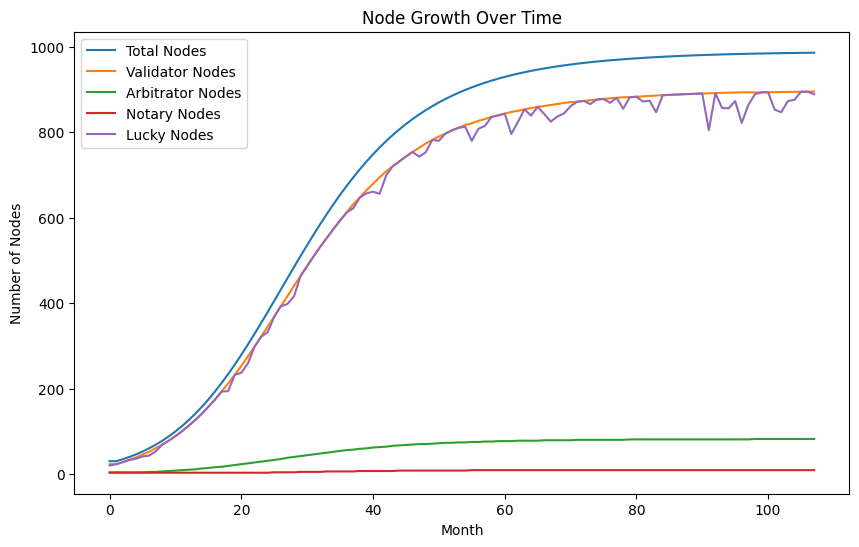

In [50]:
# NODE GROWTH MODEL
# Model type
model_type = 'richards_model'  # can be either 'richards_model' or 'logistic_model'
Nmax = 1000 # Maximum number of nodes

# Parameters for Richards' growth model
r_0 = 0.2  # Initial growth rate
k_r = 0.007  # Growth rate factor
a_0 = 0.05  # Initial attrition rate
k_a = 0.01  # Attrition rate factor

r_max = 0.2  # Maximum per-capita growth rate for the logistic model

# Assumptions for arbitrators and notary nodes
nArbitrator0 = 4
NPerArbitrator = 12
NNotaries0 = 3
NPerNotary = 100

# Define functions for the growth and attrition rates
r = lambda t: r_0 / (1 + k_r * t)
a = lambda t: a_0 * (1 + k_a * t)

rng = np.random.default_rng(1) # For reproducibility

# Calculate the total number of nodes, arbitrator nodes, notary nodes, and lucky nodes
for month in df["Month"]:
    if month < t0:
        df.at[month, "Nodes"] = N0
    else:
        t = month - t0
        if model_type == 'richards_model':
            df.at[month, "Nodes"] = Nmax / (1 + ((Nmax / N0) - 1) * np.exp(-integrate.quad(lambda x: r(x) - a(x), 0, t)[0]))
        elif model_type == 'logistic_model':
            df.at[month, "Nodes"] = (Nmax * N0 * np.exp(r_max * (t + t0))) / (Nmax + N0 * (np.exp(r_max * (t + t0)) - 1))

    # Calculate the number of arbitrator nodes
    df.at[month, "ArbitratorNodes"] = np.maximum(nArbitrator0, df.at[month, "Nodes"] // NPerArbitrator)

    # Calculate the number of notary nodes
    df.at[month, "NotaryNodes"] = np.maximum(NNotaries0, df.at[month, "Nodes"] // NPerNotary)

    # Calculate the number of validator nodes
    df.at[month, "ValidatorNodes"] = df.at[month, "Nodes"] - df.at[month, "ArbitratorNodes"] - df.at[month, "NotaryNodes"]

    # Ensure there is a non-negative number of nodes before calculating "LuckyNodes"
    if df.at[month, "ValidatorNodes"] > 0:
        # Generate lucky nodes as a stochastic process
        df.at[month, "LuckyNodes"] = min(df.at[month, "ValidatorNodes"], rng.poisson(df.at[month, "ValidatorNodes"], 1)[0])
    else:
        df.at[month, "LuckyNodes"] = 0

# Find and print model and the maximum number of nodes
max_nodes = round(df["Nodes"].max(),0)
print(f"The model is: {model_type}")
print(f"The maximum number of nodes is: {max_nodes}")

# Plot the number of nodes
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["Nodes"], label='Total Nodes')
plt.plot(df["Month"], df["ValidatorNodes"], label='Validator Nodes')
plt.plot(df["Month"], df["ArbitratorNodes"], label='Arbitrator Nodes')
plt.plot(df["Month"], df["NotaryNodes"], label='Notary Nodes')
plt.plot(df["Month"], df["LuckyNodes"], label='Lucky Nodes')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Nodes')
plt.title('Node Growth Over Time')
plt.show()

## 2.4 Active Nodes Corrections

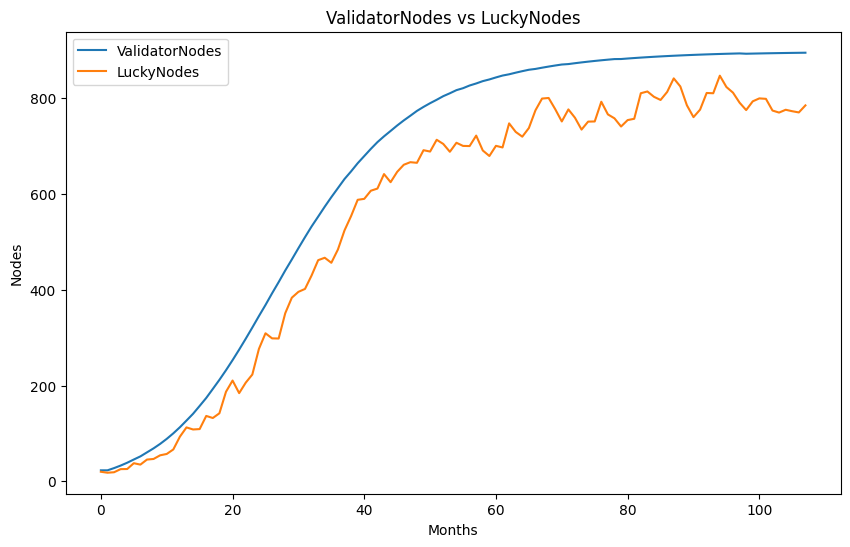

In [51]:
# Assuming df is your DataFrame with 'Month', 'ValidatorNodes' and 'LuckyNodes'
# df = pd.DataFrame(...)

# Boolean variable to enable or disable correction
enable_correction = True    # If false - just skipped

if enable_correction:
    # Generate LuckyNodes taking into account the previous history and time-increasing variance
    LuckyNodes_corrected = np.zeros_like(df['LuckyNodes'].values)
    LuckyNodes_corrected[0] = df['LuckyNodes'].values[0] # initial value

    for i in range(1, len(df['Month'])):
        avg_deviation = 0.8 + 0.001 * i # assuming avg_deviation increases over time
        inertia = 0.5 # assuming 50% inertia from previous month

        # Fluctuations from previous month with some inertia
        fluctuation = np.random.poisson(df['ValidatorNodes'].values[i] * avg_deviation * (1 - inertia))

        # Taking into account the previous month's value with some inertia
        LuckyNodes_corrected[i] = inertia * LuckyNodes_corrected[i-1] + fluctuation

        # Making sure LuckyNodes do not exceed ValidatorNodes
        LuckyNodes_corrected[i] = min(LuckyNodes_corrected[i], df['ValidatorNodes'].values[i])

    df['LuckyNodes'] = LuckyNodes_corrected

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['ValidatorNodes'], label='ValidatorNodes')
plt.plot(df['Month'], df['LuckyNodes'], label='LuckyNodes')
plt.xlabel('Months')
plt.ylabel('Nodes')
plt.title('ValidatorNodes vs LuckyNodes')
plt.legend()
plt.show()

# #3. USERS
---------
The user model in this analysis is centered on two complementary approaches:

- **The LGND (Logistic-Gompertz-Node Driven) Model**: This is the primary model utilized due to its versatile applicability to user growth patterns typically observed in network systems. The LGND model encompasses three primary factors - Logistic and Gompertz Growth Curves, Node-Driven Growth - and integrates Realistic Behavior Amendments to reflect network reactions to stimulating and inhibiting events. The LGND model's strengths lie in its adaptability to different growth behaviors and its ability to incorporate randomness or uncertainty via entropy calculations, rendering it more suitable for real-world simulation. The main limitation is that the model's accuracy relies heavily on the appropriate selection of its coefficients and parameters, which can be challenging to estimate accurately in a complex, evolving system.

- **The Alternative User Engaging Model**: This model is founded on the concepts of Carrying Capacity and Marketing Impact, positing that user growth is contingent on the system's capacity and the effectiveness of marketing campaigns. The advantage of this model is that it explicitly accounts for external influences and capacities, offering a more direct way to evaluate the impact of marketing strategies and system upgrades. However, it might be less adaptable to different system dynamics, and it requires detailed data on marketing campaigns and system capacity changes, which may not always be available.

In our further calculations, we primarily employ the LGND model. It offers a more straightforward implementation and is better adapted for comparisons with external market data. Nevertheless, the alternative user engaging model provides valuable insights and can complement the LGND model in a comprehensive user growth analysis.

##3.1 Legend-Model: A Logistic-Gompertz-Node Driven Approach
User growth is a crucial performance metric in the tech startup and online platform domains. It provides insights into the health and future potential of a business. However, this growth doesn't occur in isolation. Several factors like marketing campaigns, network effects, and negative events can significantly influence it.

The User Growth Model helps businesses comprehend how these factors could impact growth, assisting in strategic decision-making. Although the multitude of influencing factors may render these models complex, the Logistic-Gompertz-Node Driven (LEGND) model is a simpler, yet realistic alternative.

**The Assumptions of the LEGND Model**
1. **Total User Capacity**: The model assumes a set limit (USER_CAP) on the total number of users over a specific period. This limit is chiefly determined by exogenous factors like technology adaptability level and competition.

2. **Active User Vs Total User**: While the model sets an external requirement for the total number of users, it recognizes that the actual number of transactions occurs among a smaller subset of active users, rather than the entire user base.

3. **Decentralized System User Growth**: The model acknowledges that the total user number for a decentralized system follows a typical ecosystem growth pattern, capped at a reasonable value (USER_CAP). It primarily models the growth curve behavior rather than the maximum user number. The model draws upon the logistic curve (resource growth under resource limitation) and the Gompertz curve (user attrition and reduced user base growth rate due to competition) to describe this behavior. It also factors in the growth of network nodes, network effects, and user audience proportionality to the network volume in the user growth model.

4. **Impact of Non-deterministic Events**: The LEGND model accounts for the effects of non-deterministic events. It considers negative scenarios like regulatory actions and general market pressures, alongside positive reinforcements like marketing campaigns that attract users to the platform.

#### Practical Implications of the LEGND Model
The LGND model, despite its simplicity, decouples from real marketing data, facilitating network and user growth modeling at the initial stage without the need for a large marketing data array. This makes it particularly suitable for startups.

An essential limitation that adds realism to the model is the independent selection of USER_CAP. This choice should be based on realistic decentralized network use cases. Consequently, the LGND model serves as a simpler, yet realistic version of models that rely heavily on actual network data sources.
#### Limitations of the Logistic-Gompertz-Node Driven (LGND) user growth model:
1. **Assumptions**: The model is based on a lot of educated guesses. For example, it assumes that there's a maximum number of users that a platform can reach, and that this number is decided in advance based on realistic scenarios. But in real life, things are more unpredictable, and the actual user limit might be different from what we assume.

2. **Estimating Unknown Events**: The model tries to predict the impact of random events like negative scenarios or marketing campaigns. But these events are not always predictable, and guessing their timing and effects might lead to inaccuracies in our predictions.

3. **Focus on User Sign-ups, Not Activity**: The model is mostly concerned with the number of people who sign up, not how many of them actually use the platform regularly. Just because someone signs up doesn't mean they will use the platform, so the model might overestimate how active users are.

4. **Doesn't Use a Lot of Real-world Data**: The model doesn't use much actual data to make its predictions. This makes it simpler and easier to use, especially for small businesses or startups that don't have a lot of data. However, because it doesn't use a lot of real-world data, it might miss important trends or factors that could impact user growth.

###3.1.1 Implications of the LGND Model
The LGND model, despite its simplicity, decouples from real marketing data, facilitating network and user growth modeling at the initial stage without the need for a large marketing data array. This makes it particularly suitable for startups.

An essential limitation that adds realism to the model is the independent selection of USER_CAP. This choice should be based on realistic decentralized network use cases. Consequently, the LGND model serves as a simpler, yet realistic version of models that rely heavily on actual network data sources.
In our model, we have modeled user growth as a combination of three main components: a logistic growth curve, a Gompertz curve, and a user-driven node effect.
####**Logistic Growth**
Logistic growth is a common model of population growth, where the growth rate decreases as the population approaches its carrying capacity $\widehat{U}$ (USER_CAP in our code).

The equation for logistic growth is:
$$U_{logistic}(t) = \frac {U_0}{\widehat{U}} \cdot  \frac{e^{r \cdot  (t - t_0)}} {1 + U_0 \cdot e^{r \cdot (t - t_0) - 1}} \tag{6}$$
Here,

- t: Time (in months in our case)
- $U_0$: The initial user base
- $\widehat{U}$: The maximum possible user base (the "carrying capacity")
- r: The inherent growth rate
- $t_0$: The time at which the initial user base is present

####**Gompertz Curve**
A Gompertz curve is a type of mathematical model for a time series, where growth is slowest at the start and end of a time period. It's often used to describe growth of biological organisms and mechanical systems.

The equation for Gompertz growth is:
$$U_{gompertz}(t) = U_0 + (\widehat{U} - U_0) * e^{\epsilon \cdot  e^{r * (t - t0)}} \tag{7}$$
Here, epsilon and r have slightly different connotations than in the logistic model, but U0, USER_CAP, and t0 have the same meanings.
####**Node-Driven Users**
In addition to these classical growth models, we also consider the growth driven by nodes (N_{Nodes}). The motivation here is to represent the network effect, where having more nodes in the network (for example, more users or more content) makes the network more valuable, attracting more users.

The equation for user-driven node growth is:
$$U_{Nodes}(t) = U_0 + \frac{N_{Nodes}}{TotalNodes} \cdot  (\widehat{U} - U_0) \tag{8}$$
Here, $N_{Nodes}$ represents the number of nodes at time t and TotalNodes represents the total number of nodes.

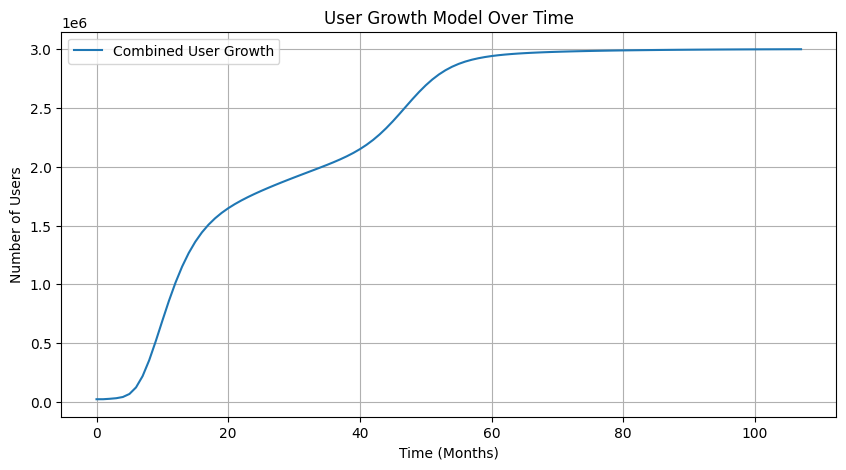

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define initial conditions and parameters
USER_CAP = 3000000
U0 = 10
t0 = 5
TotalNodes = df["Nodes"].max()  # Use the maximum value from "Nodes" data

# Define Logistic function
def logistic(t, U0, USER_CAP, r_logistic, t0):
    x = np.exp(r_logistic * (t - t0))
    p = (U0 / USER_CAP) * x / (1 + ((U0 / USER_CAP) * (x - 1)))
    return np.round(p * USER_CAP).astype(int)

# Define Gompertz function
def gompertz(t, U0, t0, epsilon, r_gompertz, USER_CAP):
    x = np.exp(r_gompertz * (t - t0))
    x = (USER_CAP - U0) * np.exp(epsilon * x) + U0
    return np.round(x).astype(int)

# Define UserDrivenNodes function
def user_driven_nodes(nNodes, U0, USER_CAP, TotalNodes):
    return U0 + (nNodes.astype(float) / TotalNodes) * (USER_CAP - U0)

# Parameters for each function
r_logistic = 0.3
epsilon = -4
r_gompertz = -0.3
w1, w2, w3 = 1, 2, 1

# Calculate combined Users using the three functions with specified weights
df['Users'] = ((w1*logistic(df['Month'], U0, USER_CAP, r_logistic, t0) +
                w2*gompertz(df['Month'], U0, t0, epsilon, r_gompertz, USER_CAP) +
                w3*user_driven_nodes(df['Nodes'], U0, USER_CAP, TotalNodes)) / (w1+w2+w3)).round().astype(int)

# Plot Users over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Users'], label='Combined User Growth')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Users')
plt.title('User Growth Model Over Time')
plt.legend()
plt.grid(True)
plt.show()


###3.1.2 Add realistic behaviour
The addition of negative events and marketing campaigns in the LGND model helps to simulate real-world conditions that influence user growth in an ecosystem. Here is a brief description of the approach:

1. **Negative Events**: These events are represented as localized declines in the user count, induced at random intervals throughout the timeline. The magnitude and timing of these declines are determined randomly within a specified range, signifying unpredictable negative impacts (like a data breach or a significant competitor's launch). The negative effect reduces the user count by a certain percentage, which gradually wears off over a specified duration.

2. **Marketing Campaigns**: These are represented as temporary boosts in user count, usually occurring at specific points in time. They are characterized by a surge in user count, which gradually subsides over a specified duration. The magnitude, timing, and duration of these campaigns are randomly chosen within a defined range, simulating the unpredictable nature and varying efficacy of real-world marketing efforts. The effect of a marketing campaign increases the user count by a certain percentage, creating a bubble-like pattern that eventually reverts back to the underlying trend.

For each negative event and marketing campaign, we first randomly determine its start time, duration, and impact within the specified ranges. We then create an effect array that models the event's or campaign's impact over time - for negative events, this is a linear decline, while for marketing campaigns, it's a Gaussian curve to create a "bubble" effect.

Next, we apply these effects to the 'Actual_Users' column in the dataframe for the duration of each event or campaign. The user count is decreased by the event impact for negative events, and increased by the campaign impact for marketing campaigns. These additions are done element-wise, and the effect arrays are designed to be the same length as the event or campaign duration.

The process is repeated for each negative event and marketing campaign, and the effects are applied additively, meaning that if two events or campaigns coincide, their impacts are summed.

This way, the model incorporates the impacts of real-world events and campaigns into the simulated user growth, making the results more realistic.

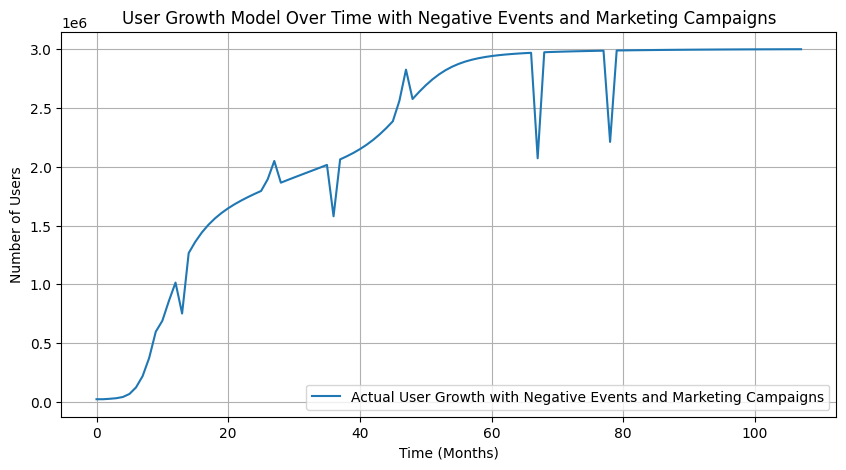

In [53]:
# Initialize parameters for negative events and marketing campaigns
negative_events_num = 4
event_impact = np.random.uniform(0.2, 0.4, negative_events_num)
event_timing = np.random.choice(range(t0, len(df['Month'])), negative_events_num, replace=False)

marketing_campaigns_num = 3
campaign_impact = np.random.uniform(0.0, 0.2, marketing_campaigns_num)
campaign_timing = np.random.choice(range(t0, len(df['Month'])), marketing_campaigns_num, replace=False)
campaign_duration = 2

# Create a copy of Users column for Actual Users
df['Actual_Users'] = df['Users'].copy()

# Apply the impact of each negative event to the 'Actual_Users'
for i in range(negative_events_num):
    df.loc[event_timing[i], 'Actual_Users'] *= (1 - event_impact[i])

# Apply the impact of each marketing campaign to the 'Actual_Users'
for i in range(marketing_campaigns_num):
    start = campaign_timing[i]
    end = min(start + campaign_duration, len(df['Month']))
    duration = end - start
    time = np.arange(duration)
    campaign_effect = campaign_impact[i] * np.exp(-(time - duration / 2)**2)
    df.loc[start:end-1, 'Actual_Users'] += df.loc[start:end-1, 'Users'] * campaign_effect

# Convert 'Actual_Users' to integers
df['Actual_Users'] = df['Actual_Users'].round().astype(int)

# Plot Actual_Users over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Actual_Users'], label='Actual User Growth with Negative Events and Marketing Campaigns')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Users')
plt.title('User Growth Model Over Time with Negative Events and Marketing Campaigns')
plt.legend()
plt.grid(True)
plt.show()


##3.2 Alternative User Enaging Model

The Alternative User Engaging Model provides a comprehensive perspective on user growth by integrating both the intrinsic system dynamics and external marketing efforts. It's important to note that while the model's main tenets are described here, the actual calculations hinge heavily on the estimation of the platform's performance (A_t), which can either be driven by the endogenous factors or be a consequence of the exogenous influences channeled through node growth and user engagement.

1. Calculation of Carrying Capacity $K$: Originating from population biology, the concept of carrying capacity embodies the maximum population size that a specific environment can sustain over time. For our user growth model within a network, the carrying capacity is considered a theoretical ceiling or a normalizing component that shapes the user growth equation.

$$K(t) = f (A_t, \widehat{U}, N_{nodes})  + \psi(t) \tag{9}$$

2. Calculation of Marketing Impact $Φ$: This facet of the algorithm simulates how marketing activities contribute to user base growth. The Marketing Impact (Φ) is treated as a function comprising three variables: the platform's performance (At), the number of nodes (Nnodes), and the impact of marketing activities, which is portrayed by an exponential decay function. The implementation steps of the algorithm essentially rely on these components.
$$𝜱(t) = \sum_{i=0}^{n} C_i \cdot \frac {exp(-(t - T_i)^2} {2 \cdot  σ_i^2} \tag{10}$$

3. User Base Calculation: The model leverages a difference equation to portray the growth of the user base:

$$\frac{dU}{dt} = r_{users} \cdot  U \cdot  (1 - \frac{U}{K_{users}}) + \Phi \tag{11}$$

where:

- U is the number of users
- $K_{users}$ is the carrying capacity
- $r_{users}$ is the intrinsic growth rate
- $Φ$ is the financial impact

The equation is resolved iteratively for each month, leading to a projection of user base growth.

The Alternative User Engaging Model offers a blend of the system's natural dynamics and externally-driven factors, which can be particularly valuable for gauging the effects of marketing campaigns and system improvements on user base growth. However, accurate parameter estimation remains crucial for the model's successful application.

# #4. TRANSACTIONS
---------------

In this model, we're computing the actual number of transactions per month, $TX(t)$, based on a multiplication of the maximum potential transactions per month, $TX_{max}(t)$, and a transaction profile factor $K_{TX}(t)$.

In essence:

- $TX(t)$ symbolizes the realistic number of transactions taking place during month t.
- $TX_{max}(t)$ represents the maximum achievable number of transactions within the month t, which is an ideal situation where all active users are transacting at their maximum capacity.
- $K_{TX}(t)$ is a factor, which helps simulate a plausible transactional behavior on the platform. This profile mirrors a natural course of adoption where transactions per active user gradually surge and eventually stabilize over time.

The interesting aspect of this model is that its complexity is encapsulated within the $K_{TX}$ factor, which captures the evolution of user behavior over time. On the contrary, we model the count of active users based on a fairly simplistic assumption that they constitute a fluctuating proportion of the total user base, within a specified range. This assumption, while robust for a preliminary model, can be further refined or validated as we gather more data or insights about the user behavior on the platform.

##4.1 Transaction Profile
In this model, $K_{TX}(t)$ represents the transaction profile over time. It is a function that combines various aspects influencing the number of transactions that occur within a platform or network. These aspects are tailored towards startups or online platforms and encompass elements of user behavior and market dynamics.

$K_{TX}(t)$ is essentially an estimation of the proportion of transactions generated per user at a given time, t. The key motivation behind this function is to capture the dynamic nature of transaction rates in a growing user base, which can fluctuate due to various factors such as user growth, market saturation, platform usability, and external events.

This transaction profile is shaped by three main components:
1. **Emerging Effect**: This represents the initial adoption phase of a platform, where the novelty and excitement lead to a surge in transactions. As the platform matures and the novelty wears off, the number of transactions decreases. This is modeled with an exponential decay function, where 'ke' is the initial number of transactions, 'be' is the rate at which the initial hype decays, and 'le' models the initial positioning of the solution. 'ce' is a constant that represents the baseline transaction rate once the initial hype has worn off.

2. **Market Share**: This component represents how transactions are influenced by the platform's market penetration. As more users adopt the platform, the number of transactions naturally increases. This is modeled as a logistic function, with 'Bm' being the maximum market share achievable, 'bc' representing the speed at which the market share grows, and 't0' as the inflection point in the market share growth curve.

3. **Usefulness**: This component captures the idea that the number of transactions depends on the usability of the platform. If the platform provides significant value to users, transactions will increase, but if the platform is difficult to use or does not meet users' needs, transactions will decrease. This is modeled as a logistic decay function, with 'Cu' representing the baseline level of usability, 'au' as the rate of decay in usability, and 'ku' as the shift of the adaptation curve.
$$K_{TX} (t)=Emerging Effect+Marketshare-Usefullness=Emerging Effect+Solution Risk=
c_e+k_e e^{-b_e t}  e^{-l_e e^(-b_e t)}+ \left( \frac{B_M}{1+e^{-b_c (t-t0) } }-  \frac{C_u}{1+e^{(-a_u (t-t0-k_u ))}}  \right) \tag{12}$$

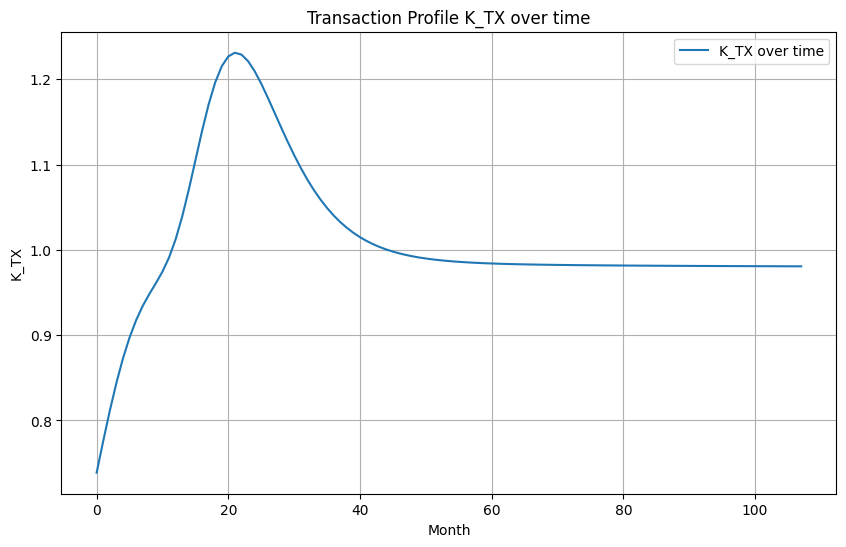

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assumptions
ce = 0.5     # Fair expectation of transaction volume
be = 0.00537 # Elasticity of innovation
le = 30      # Effect of initial positioning of the solution
ke = 20  # Value adjusted based on your assumption

Bm = 0.5  # Contribution of the market component (competition)
bc = 0.01 # Elasticity of competition in relation to the period under review
t0 = 1    # The starting time point

Cu = 0.02  # Marginal expectation of risk
au = 0.001  # Elasticity of expectation of economic benefits over time
ku = 0.1  # Shift of the adaptation curve with respect to the risk curve

# Generate a DataFrame for the simulation
#df = pd.DataFrame({'Month': range(0, 100)})

# Convert month to days
df['Day'] = df['Month'] * 30

# Define K_TX
def calculate_K_TX(t):
    Emerging = ke * np.exp(-be * t) * np.exp(-le * np.exp(-be * t)) + ce
    Marketshare = Bm / (1 + np.exp(-bc * (t - t0)))
    Usefulness = Cu / (1 + np.exp(-au * (t - t0 - ku)))
    return Emerging + Marketshare - Usefulness

# Calculate K_TX over days
df['K_TX'] = df['Day'].apply(calculate_K_TX)

# Plot K_TX over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['K_TX'], label='K_TX over time')
plt.xlabel('Month')
plt.ylabel('K_TX')
plt.title('Transaction Profile K_TX over time')
plt.legend()
plt.grid(True)
plt.show()


##4.2 Calculation Transaction Number
The process of modeling transactions in the given context:
1. **Active Users** ($MAU$):
This represents the active users on the platform in a given month. As we know that not all users of a platform will be active at a given time, we define a proportion (k_mau) of the total users (Users) that are active monthly. This is modeled as:
$$MAU(t) = k_{mau} * Users(t) \tag{13}$$
Where:

- $MAU(t)$ is the active users in month t
- $k_{mau}$ is the ratio of active users to total users. It's a random number in the range [k_mau_min, k_mau_max]
- $Users(t)$ is the total number of users in month t

2. **Maximum Transactions ($TX_{max}$)**:
This represents the maximum potential transactions that could occur on the platform given the active user base and average transaction volume per active user (TX_MAU). It's modeled as:

$$TX_max(t) = MAU(t) * TX_MAU \tag{14}$$
Where:

- $TX_{max}(t)$ is the maximum potential transactions in month t
- $TX_{MAU}$ is the average transaction volume per active user. It's assumed to be constant.
- $MAU(t)$ is the active users in month t

3. **Actual Transactions (TX)**:
This represents the actual number of transactions happening on the platform in a given month. It takes into account the transaction profile (K_TX) which is a multiplier reflecting the adoption curve of the technology. It's modeled as:

$$TX(t) = TX_{max}(t) * K_TX(t) \tag{15}$$

Where:

- $TX(t)$ is the actual transactions in month t
- $TX_{max}(t)$ is the maximum potential transactions in month t
- $K_{TX}(t)$ is the transaction profile in month t, derived from the previously calculated transaction profile curve.
These steps, when combined, help to generate a realistic projection of transaction volume over time on the platform.

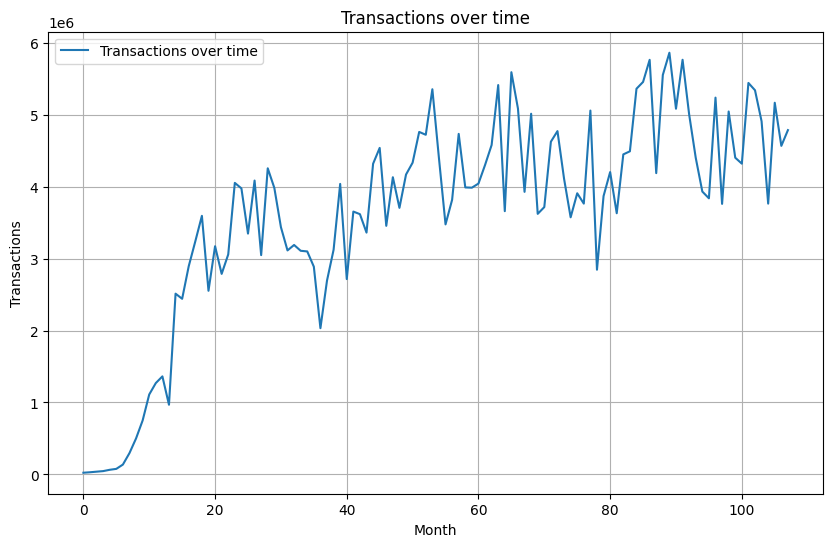

In [55]:
import numpy as np

# Assumptions
k_mau_min = 0.3  # Minimum Active User Ratio
k_mau_max = 0.5  # Maximum Active User Ratio
TX_MAU = 4  # Transactions per Active User

# Calculate active users (MAU)
df['k_mau'] = np.random.uniform(k_mau_min, k_mau_max, len(df))  # Random active user ratio for each month
df['MAU'] = df['k_mau'] * df['Actual_Users']

# Calculate maximum transactions
df['TX_max'] = df['MAU'] * TX_MAU

# Calculate actual transactions
df['TX'] = df['TX_max'] * df['K_TX']

# Plot the number of transactions over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['TX'], label='Transactions over time')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.title('Transactions over time')
plt.legend()
plt.grid(True)
plt.show()


# #5. PERFORMANCE
------------
The aim of modeling A(T) is to simulate the performance of the system over time. A(T) represents the performance of an asset or system at a given time point 'T'.

In the context of our model, we assume that this performance is influenced by a drift term, modeled by mu_t, and a random term, represented by the product of the standard deviation of performance (sigma) and a Wiener process (Z_t). The equation used is a form of the geometric Brownian motion, often used in finance to model assets prices:
$$A_t = A_0 \cdot  exp((\mu_t - σ^2 / 2) \cdot  t + σ \cdot  Z_t) \tag{16}$$
Here, $A_0$ is the initial performance which is normalized to `0.001` for our purposes.

$\mu_t$ is the drift term which accounts for the average growth rate of the performance, taking into account both labor and financial components. It is modeled taking into account the assumption of "winters" and "summers" in investment activities.

$σ$ is the standard deviation of the performance, which models the volatility of the performance over time. This volatility is assumed to grow in tandem with the growth of nodes in the network, capturing the increasing complexity and variability as the network grows.

$Z_t$ is a random variable following a Wiener process, which adds an element of randomness to the performance, simulating the inherent uncertainty and randomness in real-world scenarios. The **Wiener process** is discretized here to align with our monthly time step.

By combining these elements in the formula for $A_t$, we capture both deterministic ($\mu_t$) and random ($σ * Z_t$) influences on the system's performance, allowing us to create a more realistic simulation of its behavior over time.

## 5.1 Endogenous Performance Model
In the context of the platform's endogenous performance model, the native cryptocurrency or tokens underpin the system's value, primarily deriving their worth from the platform's core economic model. These tokens are typically utility tokens and they are used to pay for the platform's services, as opposed to functioning as speculative instruments in the broader cryptocurrency market. The key value proposition of such tokens hinges on their intrinsic worth, which escalates in sync with the growth in the user base.

The distinct characteristic of this model lies in its assumption that the market price of tokens and the size of the user base are solely driven by the platform's utility. This translates to solving a stochastic equation for the platform performance, $A_t$, that requires the modeling of economic drift, $μ_t^A$, and volatility, $σ_t^A$, predicated on the following premises:

- $μ_t^A$ is computed as the sum of labor and financial contributions, which are subject to cyclical environmental constraints, such as financing seasons (e.g., winter and summer).
- $σ_t^A$ volatility is determined by the fluctuations in node growth (which is modeled separately but reflects the network's impact on the external environment) and the Wiener process, $Z(t)$.

Under these conditions, network performance is an increasing function. In an ideal model, such performance would drive the growth of users and nodes. However, in this model, user and node growth curves are depicted as independent relationships, reflecting the anticipated behavior of market participants.
The endogenous attribute of $A_t$ is a standalone marker of the network's performance, not directly implicated in other models. This is because, in an ideal scenario, labor and investment contributions would directly increase network performance. However, in reality, these dynamics often involve a multitude of other factors, making it essential to view $A_t$ as a distinct parameter in this model.


###5.1.1 Economic Drift Modeling
<b>$\mu_t$</b>, also referred to as the drift coefficient in the context of stochastic differential equations, represents the expected rate of return on a security or a platform. In our case, we are using $\mu_t$ to model the growth rate of a platform. Its value determines how the platform's value (`A(t)` - platform performance metric) is expected to change over time on average.

In our model, $\mu_t$ is influenced by two main components: **labor** and **financial** investments. Here's why:

- **Labor Component**: This represents the human effort invested in the platform. Labor can contribute to the growth of a platform in multiple ways, including developing new features, improving user experience, managing operations, marketing, and many more. The assumption here is that more labor input (captured by $L$) would generally lead to a higher growth rate, hence a higher value of $\mu_t$.

- **Financial Component**: This component ($F$) represents the financial resources that are invested into the platform. These resources can be used in numerous ways such as expanding the platform's infrastructure, marketing, hiring more personnel, etc., which can enhance the platform's performance, hence contributing to a higher growth rate $\mu_t$.

**The algorithm**:
1. The **labor contribution** $L$ for a given month is calculated as:

$$L = L0 ⋅ labor\_{rate} + (Fmax_{year} / 12) ⋅ {investment\_labor\_ratio} \tag{17}$$

where
- $L0$ is the minimum labor contribution in person-months,
- **labor_rate** is the rate in USD per person-month,
- $Fmax_{year}$ is the maximum investment per year,
- and **investment_labor_ratio** is the ratio of investment that goes to labor.

2. The **current season** for a given month is determined based on a cycle that alternates between 'winter' and 'summer' periods. The length of each period is specified by winter_length and summer_length respectively.

$$season =  \frac{month \%\left({winter\_lenght}+summer\_lenght \right)}{winter\_lenght} \tag{18}$$

The <b>`season`</b> value is less than 1 during the `winter` period and greater than 1 during the `summer period`.

3. The **financial investment** $F$ for a given month depends on the current season:
- If **season** $<$ 1 (i.e., it's **winter**), then $F = 0$.
- If **season** $\ge$ 1 (i.e., it's **summer**), then the financial investment is given by:
$$F =\frac{(Fmax_{year}/12)\cdot (season-1)}{summer\_lenght} \tag{19}$$
4. A **random shock**  is generated using a normal distribution with mean $0$ and standard deviation **sigma**.

5. <b>The drift coefficient $\mu_t$ </b>is calculated as a function of the **labor contribution** $L$, the **financial investment** $F$, and the  **random shock**:
$$\mu_t = α \cdot  ln(1 + L) + β \cdot \sqrt{F}  \cdot e^{-decay\_factor \cdot  month} + γ \cdot  random\_shock \tag{20}$$
where $α$, $β$, and $γ$ are parameters that weight the contributions of $L$, $F$, and **random_shock** respectively, and **decay_factor** is a parameter that controls the rate at which the effect of the financial investment diminishes over time.

6. $\mu_t$ is then normalized to a range between 0 and 1 using the sigmoid function: $$\mu_t = \frac {1}{1  + exp(-\mu_t)} \tag{21}$$

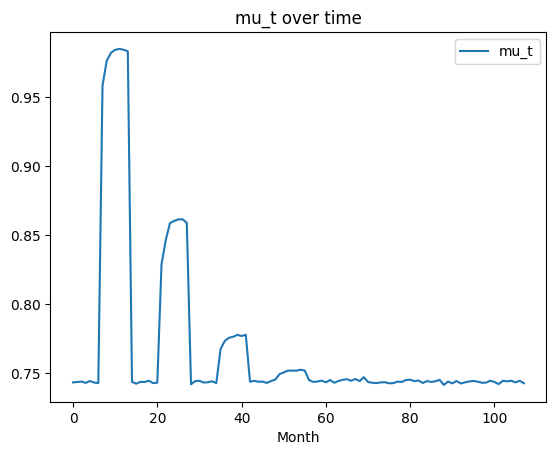

In [56]:
# Additional Assumptions for mu_t
L0 = 4 # minimum labor contribution in person-months
labor_rate = 50 # rate in USD per person-month
Fmax_year = 1e6 # maximum investment per year
winter_length = 6 # winter period in months
summer_length = 8 # summer period in months
investment_labor_ratio = 0.5 # ratio of investment that goes to labor
decay_factor = 0.1 # decay factor for the seasonal component

# Parameters for mu_t
alpha = 0.1
beta = 0.1
gamma = 0.1
sigma = 0.05

# Sigmoid function for normalization
sigmoid = lambda x: 1 / (1 + np.exp(-x))

for month in df["Month"]:
    # Calculate the labor contribution
    df.at[month, "L"] = L0 * labor_rate + (Fmax_year / 12) * investment_labor_ratio

    # Determine the current season (winter or summer)
    season = (month % (winter_length + summer_length)) / winter_length

    # Calculate the financial investment
    if season < 1:
        # 'Winter' period
        df.at[month, "F"] = 0
    else:
        # 'Summer' period
        df.at[month, "F"] = (Fmax_year / 12) * ((season - 1) / summer_length)

    # Generate a random shock
    random_shock = rng.normal(0, sigma)

    # Calculate mu_t
    df.at[month, "mu_t"] = alpha * np.log1p(df.at[month, "L"]) + beta * np.sqrt(df.at[month, "F"]) * np.exp(-decay_factor * month) + gamma * random_shock

    # Normalize mu_t using the sigmoid function
    df.at[month, "mu_t"] = sigmoid(df.at[month, "mu_t"])

# Display the results
df.plot(x="Month", y="mu_t", title="mu_t over time")
plt.show()
#Please note that the assumptions alpha, beta, gamma, and sigma are set arbitrarily in this code. In practice, you may want to calibrate these parameters using historical data, if available, or con

###5.1.2 Volatility Modeling
In order to model the performance of a network, we introduce the volatility function $σ(t)$, which captures the inherent unpredictability in the growth of the network. This unpredictability could stem from various factors such as changes in market conditions, alterations in the competitive landscape, technological innovations, etc.
The volatility function $σ(t)$ is defined as:
$$σ(t) = σ₀ \cdot  (1 + kₜ \cdot  t) \cdot  \frac{N(t)}{N₀} \tag{22}$$
where:

- σ₀ is the initial volatility,
- kₜ is a constant factor that models the time-dependent changes in volatility,
- N(t) is the number of nodes at time t, and
- N₀ is the initial number of nodes.

The volatility function represents the standard deviation of the return on an investment and can be seen as a measure of the risk or uncertainty about the size of changes in the value of a security.

In order to incorporate the stochastic nature of network performance, we also introduce a **Wiener process** $Z(t)$, which represents the cumulative effect of many small and independent random changes. This process is used to model a wide range of phenomena such as the movement of particles suspended in a fluid (**Brownian motion**), fluctuating stock prices, and other quantities that exhibit random fluctuations.

The **Wiener process** Z(t) is defined as:
$$Z_n^t=\frac{1}{\sqrt n}\ \sum_{1 \le k \le nt }{\xi_k} \tag{23}$$

where $ξₖ$ represents independent and identically distributed random variables.

Z(t) can be considered as the randomness or noise introduced into the system. It's worth noting that the **Wiener process**, also known as **Brownian motion**, is a central concept in the mathematical theory of stochastic processes and is used extensively in various fields like physics, economics, and finance.

After calculating the values of $σ(t)$ and $Z(t)$ for each point in our timeline, we can then compute the network performance function A(t) using these variables. Please note that the calculations should be done stepwise, with the calculation for month t depending only on the values for the previous months.

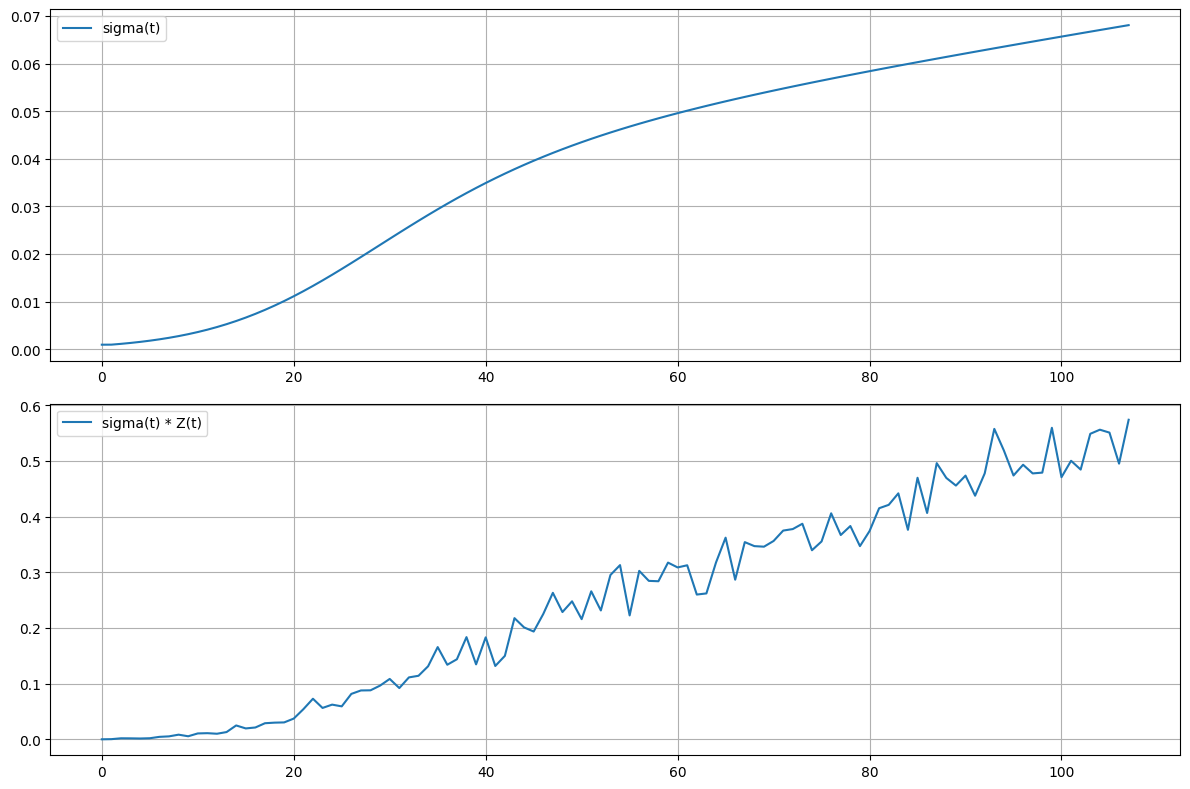

In [57]:
# Assumptions
sigma_0 = 0.001  # Initial sigma value
alpha = 1  # Influence of network growth on volatility
k_t = 0.01  # Time-dependent factor for volatility

# Add "sigma" and "Z" to your DataFrame
df["sigma"] = 0.0
df["Z"] = 0.0

# Initialize "sigma" and "Z" at t=0
df.at[0, "sigma"] = sigma_0
df.at[0, "Z"] = 0  # as there's no history for t=0

# Compute sigma(t) and Z(t) for each subsequent month
for month in range(1, total_timeline_months):
    n = np.abs(np.random.normal(loc=0, scale=1, size=month))
    df.at[month, "Z"] = (1 / np.sqrt(month)) * np.sum(n)
    df.at[month, "sigma"] = sigma_0 * (1 + k_t * month) * (df.at[month, "Nodes"]/N0)**alpha
# Create a new figure
plt.figure(figsize=(12,8))

# Plot sigma(t)
plt.subplot(211) # 2 rows, 1 column, 1st subplot = top
plt.plot(df["Month"], df["sigma"], label="sigma(t)")
plt.legend()
plt.grid()

# Plot sigma(t) * Z(t)
plt.subplot(212) # 2 rows, 1 column, 2nd subplot = bottom
plt.plot(df["Month"], df["sigma"] * df["Z"], label="sigma(t) * Z(t)")
plt.legend()
plt.grid()

# Show the figure with two subplots
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding
plt.show()

###5.1.3 Ideal Network Performance Calculation
Let's put it all together. Solving the GBM equation gives
$$A_t=A_0\ \ exp((\mu-\sigma^2/2)t+\sigma Z_t\ ) \tag{24}$$

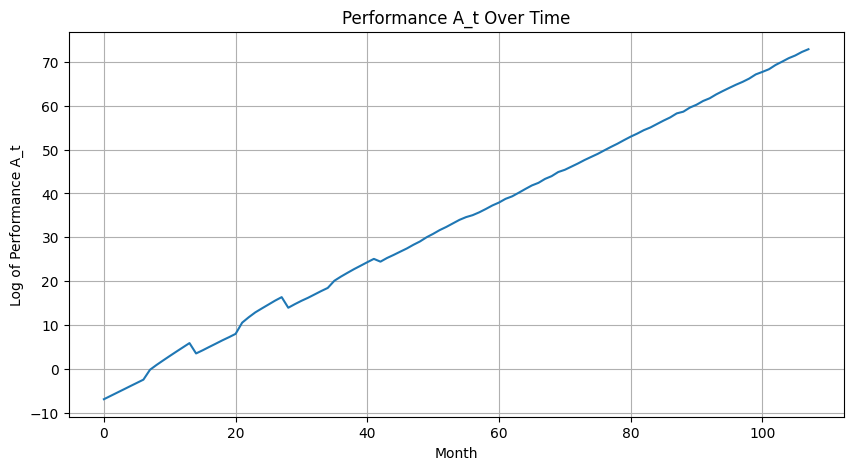

In [58]:
# Define the initial performance value A_0
A_0  = 0.001 # assuming the initial performance is normalized to 1

# Calculate the token amount A_t for each month
df['A_t'] = A_0 * np.exp((df['mu_t'] - df['sigma']**2 / 2) * df['Month'] + df['sigma'] * df['Z'])

# Display the DataFrame
#print(df)

# Plot the performance A_t
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], np.log(df['A_t']))
plt.title("Performance A_t Over Time")
plt.xlabel("Month")
plt.ylabel("Log of Performance A_t")
plt.grid(True)
plt.show()

##5.2 Network Entropy
In the context of the DGT Network, entropy serves as a metric quantifying the degree of uncertainty, randomness, or complexity in the system. Here, it's calculated using the ratio of the number of transactions $TX$ to the number of nodes $N_{Nodes}$ in the network, which we denote as $PB_{tx}$ (Probability of Transaction).
The greater the entropy (or the more complex the information pattern), the greater the value being transferred, and thus, the greater the token demand.


Entropy in this context can be seen as a measure of the uncertainty or randomness of the system. In the case of a blockchain network, higher entropy could represent a higher number of independent transactions and more heterogeneous usage patterns, which in turn would indicate a larger and more diverse network with a higher level of value being transferred.

The calculation for entropy is derived from the Shannon entropy equation, a fundamental concept in information theory:
$$S_{\epsilon} = -P_{tx}^B * \log_2{P_{tx}^B} \tag{25}$$
where:
- $P_{tx}^B = \frac{TX}{N_{NODES}}$ - the probability of each active user performing a transaction
-$TX$ - transaction volume
- $N_{NODES}$ - number of monthly active nodes

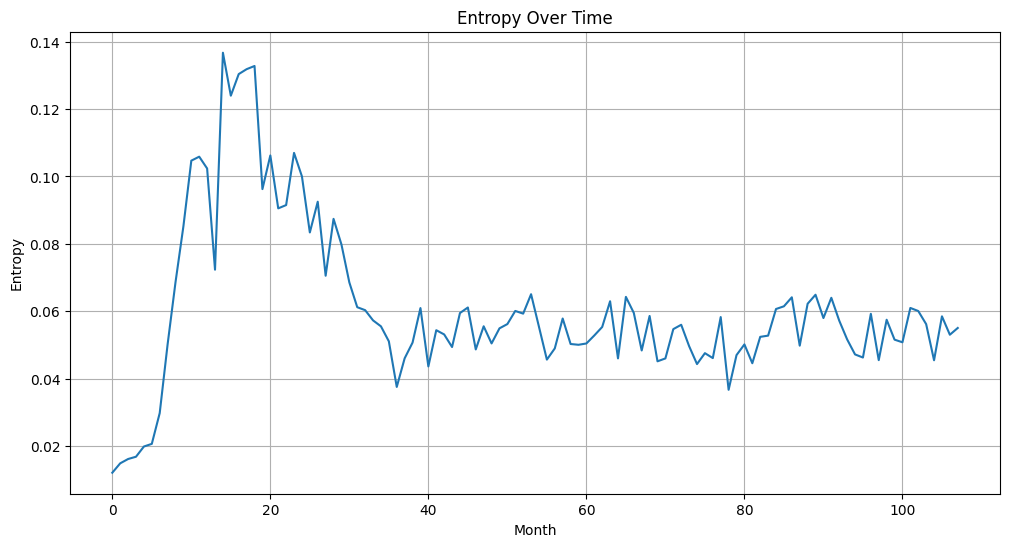

In [59]:
# Calculate the probability of each node performing a transaction
df['PB_tx'] = df['TX'] / df['Nodes']

# Ensure no division by zero or log of zero
df['PB_tx'] = df['PB_tx'].replace([np.inf, -np.inf], np.nan).fillna(0)
df.loc[df['PB_tx'] == 0, 'PB_tx'] = 1e-9  # a small constant

# Check if probabilities are valid and normalize if necessary
if not ((0 <= df['PB_tx']) & (df['PB_tx'] <= 1)).all():
    df['PB_tx'] = df['PB_tx'] / df['PB_tx'].sum()

# Calculate the entropy based on these probabilities
df['entropy'] = -df['PB_tx'] * np.log2(df['PB_tx'])

# Plot the entropy over time
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['entropy'])
plt.title('Entropy Over Time')
plt.xlabel('Month')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()

## 5.3 Network Utility
Metcalf's Law suggests that the value or utility of a network grows as the square of the number of users, or nodes, in the network. It emphasizes the potential connections that can be made between nodes, reflecting the power of network effects. However, Metcalf's Law, in its original formulation, assumes that all connections or interactions are equally valuable, and that each additional node contributes to the utility of the network uniformly.

Our proposed metric, which could be described as a refinement of Sarni's Law, offers a more nuanced and potentially more accurate view of network utility. It takes into account three key factors:
- **Entropy**: This captures the information richness or complexity of the network, reflecting the diversity and quality of interactions. Networks with higher entropy are more complex and potentially more useful to users, as they offer a wider range of interactions. In our metric, utility grows with the square root of entropy, reflecting the diminishing returns of complexity.

- **User Load**: This factor reflects the relative activity level or engagement of the user base, measured as the ratio of the current number of users to the maximum number of users over time. A higher user load, indicating more users per node, suggests a more active or engaged user base, a more efficient use of resources, or a higher potential for network effects. Our metric thus adjusts for the user load, emphasizing networks that effectively manage their user-node ratio.

- **Number of Users**: Similar to Metcalf's Law, our metric also considers the total number of users, with utility growing with the square of this number. However, it differentiates itself by incorporating the user load and entropy factors, providing a more comprehensive and nuanced view of network utility.

The physical sense of this metric is to capture the utility value of a network from a user's perspective. It incorporates not just the size of the network (as in Metcalf's Law), but also its complexity (entropy) and the relative engagement of its user base (user load). This makes it potentially more useful in assessing and comparing the utility of different networks, especially in the context of decentralized networks where the distribution of users and nodes can vary widely.

Ultimately, this metric can provide a more holistic view of network utility, taking into account not just the quantity but also the quality of connections and interactions. This is particularly important in the context of blockchain networks, where the value of the network often lies in the richness and diversity of its transactions, as well as the engagement of its users.

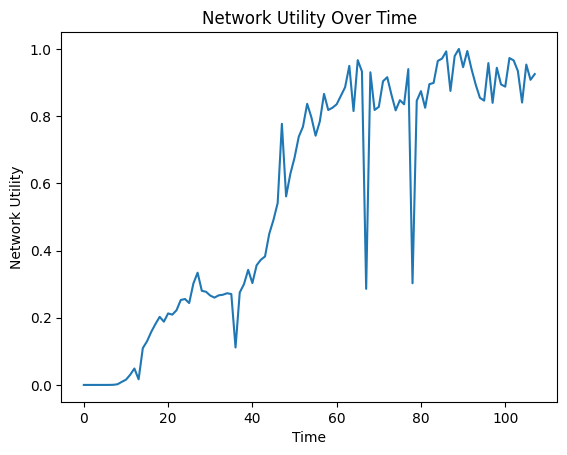

In [60]:
import numpy as np

# define alpha
alpha = 1

# calculate user load factor
user_load = df['Actual_Users'] / df['Actual_Users'].max()

# calculate network utility using Metcalfe's law
df['U_network'] = alpha * np.sqrt(df['entropy']) * (df['Actual_Users'])**2 * user_load

# normalize network utility to a range of 0 to 1 by dividing by the maximum value
df['U_network'] = df['U_network'] / df['U_network'].max()

# plot network utility over time
df['U_network'].plot(title='Network Utility Over Time')
plt.xlabel('Time')
plt.ylabel('Network Utility')
plt.show()




# #6. TOKEN SUPPLY MODEL
---------------
Token supply, in the context of cryptocurrencies and blockchain technology, refers to the total number of tokens that exist or can exist. This is a particularly important concept because it affects the value of individual tokens; generally, the more tokens in supply, the less valuable each one is, all else being equal.

The model is based on a specific approach to token supply. Here are its primary characteristics:

1. **Token Supply**: In this model, there is a capped total supply of tokens, denoted as **TOTAL_SUPPLY**. This is the maximum number of tokens that will ever exist.

2. **Initial Distribution**: Upon the creation of these tokens, an initial distribution takes place. A certain proportion of the total supply is immediately allocated to the corporation. This could be for a variety of reasons, such as paying for the development of the blockchain, covering operating costs, or providing a source of income for the founding team.

3. **Minting for Nodes**: The remaining tokens are not directly put into circulation. Instead, they're reserved for distribution to nodes in the network. This process of creating new tokens and distributing them to nodes is known as "minting."

4. **Node Token Distribution**: The rate of distribution of these reserved tokens to nodes is not constant. Instead, it is determined by a specific function **S_SLA_PROFILE**, which is based on an inverted sigmoid function. This function takes into account various factors, such as the steepness of the distribution curve ($\beta_2$), a stretch parameter ($\tau_1$), and a starting point of token distribution ($t_0$).

5. **Adjustment over Time**: As time progresses, the number of tokens distributed each month changes according to the **S_SLA_PROFILE** function. In the early stages, few tokens are distributed. The number of distributed tokens peaks at a certain point and then gradually decreases over time. This distribution function creates a kind of "inflation" in the early stages, as a growing number of tokens are put into circulation, followed by "deflation" as the rate of new tokens entering circulation decreases.

This model aims to incentivize node participation in the early stages of the network (when more tokens are being distributed) while ensuring a finite token supply. It also allows for a smooth transition from inflation to deflation, as opposed to a sudden halt of token distribution.

##6.1 Token distribution
The token distribution model for DGT network is designed with a comprehensive strategy, aimed at immediate issuance and strategic allocation of tokens, to ensure the sustainability and growth of the network.

- **Token Issuance**: At the inception of the network, all tokens, amounting to **TOTAL_SUPPLY**, are issued immediately. They are reserved in a specific system wallet, named EMISSION. Technically, this operation mirrors the token creation function utilized in Bitcoin's model, where all tokens are minted at the outset.

- **Initial Distribution**: The TOTAL_SUPPLY of tokens is strategically divided into two segments:

>> - **S_immidiate_distributed**: A percentage of the total supply (for instance, 20%) is immediately allocated to a consortium (corporate) account. This portion serves various purposes beneficial to the network, such as supporting development efforts, funding public goals, and enabling token conversions to establish bridges to external networks like Ethereum.
- **S_reserved**: The majority of the total tokens (for instance, 80%) is reserved to incentivize and support network nodes over time. Network nodes form the backbone of the DGT network, and these tokens help foster a robust and sustainable node economy.

- **Network Activation Delay** ($t_0$): It's worth noting that the network does not start operating immediately post token issuance. There is a time delay, referred to as t_0, during which no tokens are distributed. This delay allows for necessary preparations and arrangements before the network goes live.

- **Documentation and Transparency**: Specific parameters pertaining to the token distribution model are meticulously documented in a dedicated White Paper. This ensures transparency and allows stakeholders to verify details both at the protocol level and via user-friendly interfaces such as the Network Explorer.

In essence, the DGT token distribution model emphasizes immediate issuance, strategic allocation, and gradual distribution. It meticulously blends immediate utility and long-term network sustainability, thus serving as a robust foundation for the DGT ecosystem.

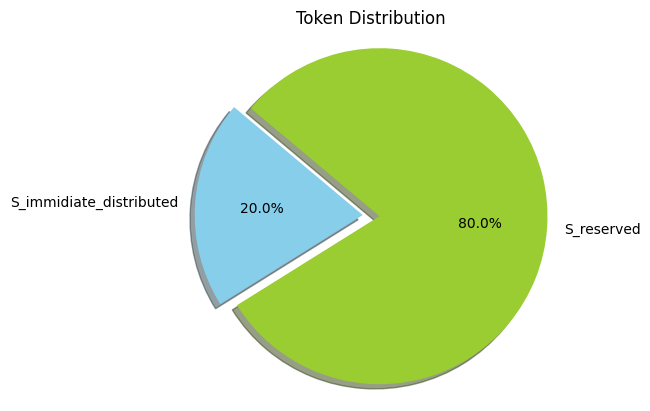

In [61]:
# Distribution Assumptions
TOTAL_SUPPLY = 100000000  # Total token supply (100%)
S_immidiate_distributed = 0.2 * TOTAL_SUPPLY  # 20% of total supply
S_reserved = 0.8 * TOTAL_SUPPLY  # 80% of total supply

# Data to plot
labels = ['S_immidiate_distributed', 'S_reserved']
sizes = [S_immidiate_distributed, S_reserved]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Token Distribution')
plt.axis('equal')
plt.show()

##6.2 Supply Profile
In the context of our token supply model, $S_{SLA}^{PROFILE}$ is a function that governs the distribution rate of tokens to nodes over time. It is formulated on the basis of an inverted sigmoid function, a common mathematical function that provides a smooth transition between two levels.

In the Bitcoin network, the reward for creating a new block — often referred to as the "block creation fee" — decreases over time. Specifically, the reward is halved for every 210,000 blocks added to the blockchain, a rule determined by Bitcoin's difficulty equation.

In contrast, the DEC Token (DGT) network employs a smoother approach to decrease the reward over time, thereby providing a less abrupt reduction compared to Bitcoin's halving mechanism.

The reward decrement follows an inverse sigmoid (logit) profile function, commonly denoted as $S_{SLA}^{PROFILE}$ in the context of our token supply model. This function, based  on time (measured in months), governs the distribution rate of tokens to network nodes:
$$Sig_{inv}=1 - \frac{1}{1 + e^{-\beta_2 \cdot  (x - \tau_1)}} \tag{26}$$

$$S_{SLA}^{PROFILE} = Sig_{inv} (t-t_0) \tag{27}$$

In this equation, $x$ represents time, $\beta_2$ controls the steepness of the curve, and $\tau_1$ determines the point along the x-axis where the curve transitions from one level to another.
In summary, the DGT network employs the $S_{SLA}^{PROFILE}$ function, based on the inverted sigmoid curve, to smoothly decrease the rate of token distribution over time. The function initially provides a low rate, then it increases, peaking at a certain point, and gradually decreases thereafter.


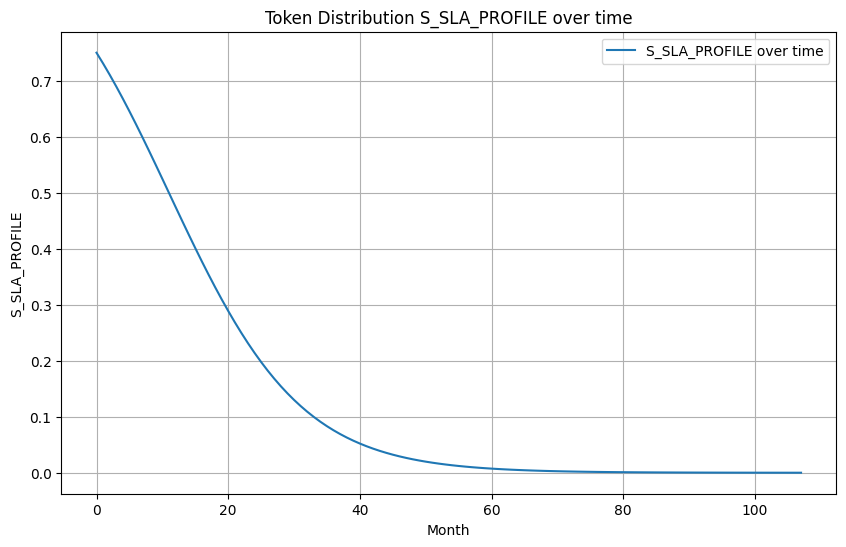

In [62]:
# Assumptions
t0 = 1  # Peak of the distribution
beta2 = 0.1  # Steepness of the distribution curve
tau1 = 10  # Stretch of the distribution curve

# Inverted sigmoid function
def inverted_sigmoid(x, beta2, tau1):
    return 1.0 - (1.0 / (1.0 + np.exp(-beta2 * (x - tau1))))

# Assume that df is your dataframe
# df = pd.DataFrame({'Month': np.arange(0, 101, 1)})

# Calculate S_SLA_PROFILE using inverted sigmoid function
df['S_SLA_PROFILE'] = inverted_sigmoid(df['Month'] - t0, beta2, tau1)

# Plot S_SLA_PROFILE over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['S_SLA_PROFILE'], label='S_SLA_PROFILE over time')
plt.xlabel('Month')
plt.ylabel('S_SLA_PROFILE')
plt.title('Token Distribution S_SLA_PROFILE over time')
plt.legend()
plt.grid(True)
plt.show()

##6.3 Supply Protocol Function
The function $S_{SLA}$ determines the amount of tokens distributed to network nodes from the reserved token pool $S_{reserved}$ over time. The token distribution process follows a uniform schedule (e.g., monthly), although in practice, it is tied to the heartbeat protocol.

The distribution follows a profile defined by $S_{SLA}^{PROFILE}$, which is based on an inverted sigmoid function, representing a growth and decay distribution model over time. The amplitude of the profile, $S_{SLA}^0$, increases linearly over time, from zero to a maximum value $S_{SLA}^{MAX}$.
In the token distribution process, $S_{SLA}^{MAX}$ is calculated as the product of S_reserved and $k_{SLA}$ divided by the maximum time t_max. For each time period t, $S_{SLA}^0$ is calculated as $S_{SLA}^{MAX}$ multiplied by the ratio of t to t_max. The tokens distributed for time t, $S_{SLA}$, are then calculated as the product of $S_{SLA}^{PROFILE}$ and $S_{SLA}^0$.

This approach is designed to balance the token distribution. It helps prevent early nodes from receiving a disproportionately large volume of tokens and ensures that the reward volume per node decreases as the transaction volume, the number of nodes, and the token value increase. It thus promotes fairness and stability in the network's token economy.

t0 = 1, S_SLA_MAX = 14953271.028037382, S_reserved = 80000000.0


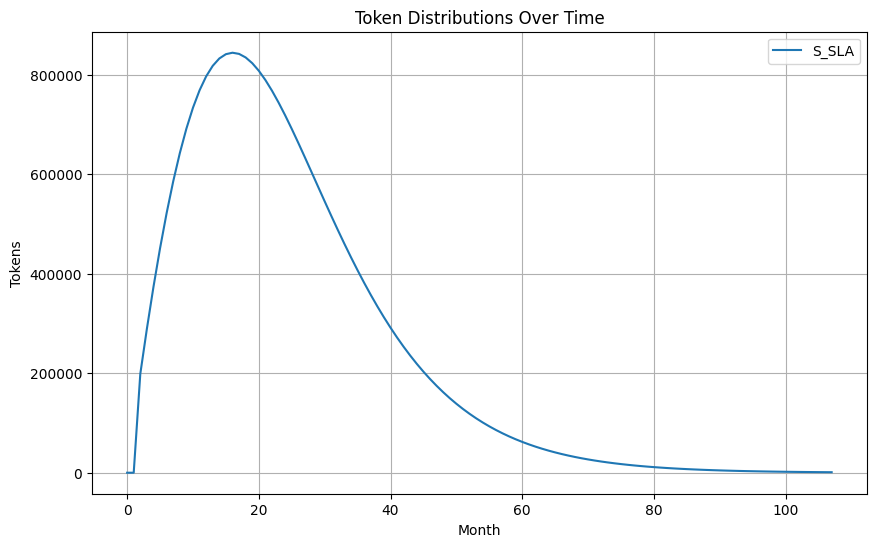

In [63]:
# Assumptions
t0 = 1  # Start of token distribution
beta2 = 0.1  # Steepness of the distribution curve
tau1 = 10  # Stretch of the distribution curve
k_SLA = 20  # Determines the maximum token distribution
S_reserved = 80000000.00  # Reserved tokens for distribution

# Calculate t_max
t_max = df['Month'].max()

# Calculate S_SLA_MAX
S_SLA_MAX = S_reserved * k_SLA / t_max

# Function to calculate S_SLA
def calculate_S_SLA(t, S_SLA_PROFILE, S_SLA_MAX, t_max):
    if t <= t0:
        return 0
    else:
        # S_SLA_0 increases linearly from 0 to S_SLA_MAX
        S_SLA_0 = S_SLA_MAX * t / t_max
        return S_SLA_PROFILE * S_SLA_0

# Initialize S_SLA column
df['S_SLA'] = 0

# Iterate over the dataframe
for i in range(len(df)):
    t = df.loc[i, 'Month']
    S_SLA_PROFILE = df.loc[i, 'S_SLA_PROFILE']

    # Calculate S_SLA
    S_SLA = calculate_S_SLA(t, S_SLA_PROFILE, S_SLA_MAX, t_max)
    df.loc[i, 'S_SLA'] = S_SLA

# Print required parameters
print(f't0 = {t0}, S_SLA_MAX = {S_SLA_MAX}, S_reserved = {S_reserved}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['S_SLA'], label='S_SLA')
plt.xlabel('Month')
plt.ylabel('Tokens')
plt.title('Token Distributions Over Time')
plt.legend()
plt.grid(True)
plt.show()


Token distribution in this model is an extended process that gradually depletes the initial reserve of tokens ($S_{reserved}$) to zero. This timeline is influenced by the parameters $\beta_2$, $\tau_1$, and $k_{SLA}$, which shape the distribution curve and regulate the volume of tokens dispensed at each distribution event.
The $\beta_2$ parameter adjusts the steepness of the curve, meaning it influences the rate of token distribution. A high $\beta_2$ will make the distribution steeper, implying a faster distribution of tokens, while a low $\beta_2$ will result in a more gradual, slower distribution.

The $\tau_1$ parameter determines the stretch of the distribution curve. It essentially spreads out the distribution events, ensuring that the tokens are not exhausted too rapidly.

The $k_{SLA}$ is a scaling factor that determines the maximum token distribution at each event. A higher $k_{SLA}$ will increase the maximum number of tokens distributed, hastening the depletion of $S_{reserved}$.

## 6.4 Token Balance and Cumulative Supply
The $S_{remain}$ function, described below, monitors the balance of the S_reserved tokens. It starts with the total amount of reserved tokens and decrements with each distribution event based on the $S_{SLA}^{PROFILE}$ and the increasing $S_{SLA}^0$. When $S_{remain}$ reaches zero, this indicates that the initial token reserve has been completely distributed. This event could occur within the timeframe chosen for the model or outside it, depending on the value of $k_{SLA}$. A smaller $k_{SLA}$ will result in a longer distribution period, while a larger $k_{SLA}$ will lead to a faster depletion of the reserve.

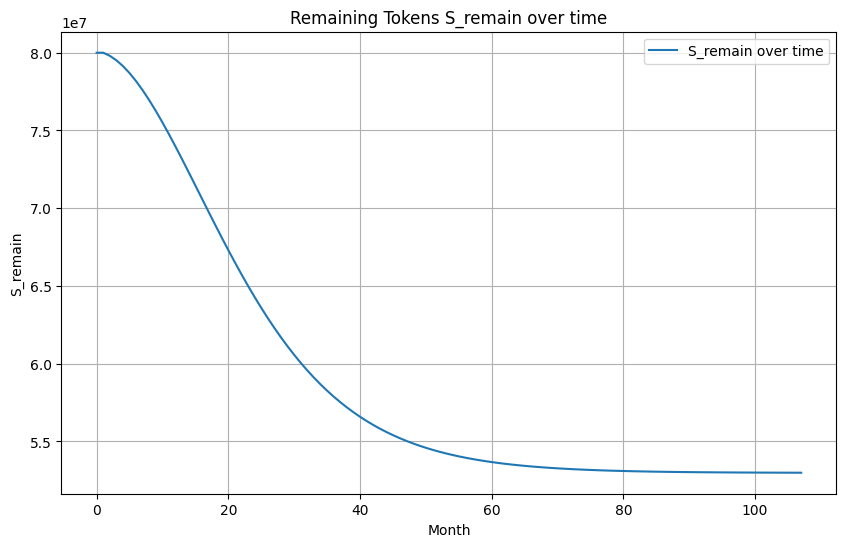

In [64]:
# Initialize S_reserved
S_reserved = 80000000.00

# Initialize S_remain
df['S_remain'] = S_reserved

# Iterate over the dataframe
for i in range(1, len(df)):
    df.loc[i, 'S_remain'] = df.loc[i - 1, 'S_remain'] - df.loc[i, 'S_SLA']
    if df.loc[i, 'S_remain'] < 0:
        df.loc[i, 'S_remain'] = 0

# Plot S_remain over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['S_remain'], label='S_remain over time')
plt.xlabel('Month')
plt.ylabel('S_remain')
plt.title('Remaining Tokens S_remain over time')
plt.legend()
plt.grid(True)
plt.show()

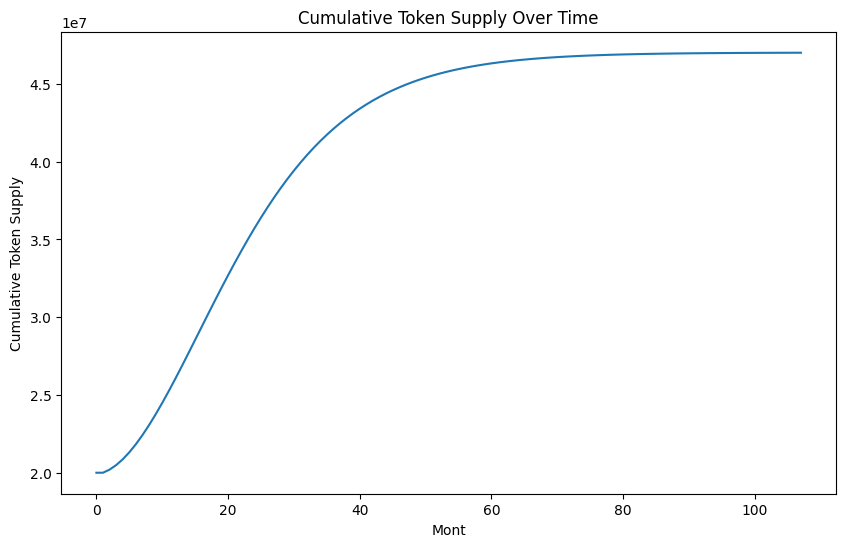

In [65]:
# Calculate cumulative token supply (minted tokens plus immediately distributed tokens)
df['S_cumulative'] = df['S_SLA'].cumsum() + S_immidiate_distributed

# Plot cumulative token supply
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['S_cumulative'])
plt.xlabel('Mont')
plt.ylabel('Cumulative Token Supply')
plt.title('Cumulative Token Supply Over Time')
plt.show()

# #7. TOKEN DEMAND
----------


## 7.1 Node-Base Demand
In the given model, we are simulating the token demand for maintaining the nodes of a blockchain network. Nodes form the backbone of any blockchain network, validating transactions and maintaining the overall network integrity. As a part of their operation, nodes incur certain expenses which must be offset by the rewards they receive in the form of tokens. Therefore, the token demand from nodes forms a significant part of the overall system's token demand.

### 7.1.1 Sigmoid Model of the Token Price
The token price sigmoid model serves as a simulation for how the price of a blockchain token might evolve over time. The sigmoid function is often used in such simulations due to its S-shaped curve, which typically represents a phase of slow growth, a phase of rapid growth, and finally another phase of slow growth. This is a common pattern observed in the growth of many cryptocurrencies.

In the context of this model, the token's price is simulated to increase from its nominal value of 0.8 USD to a peak value of 300 USD. The choice of a sigmoid function allows the model to capture the slow initial growth when the token is first launched and not widely recognized, followed by a period of rapid growth as the token gains recognition and sees increased adoption, and finally a period of slowed growth as the token reaches maturity:
$$P_t^{sigmoid}= \frac{P_t^{max}}{1+e^{-k_S\cdot t-t^*}}+P_t^0 \tag{28}$$
where:
- $k_S$ is steepness of the curve
- $t^*$ is midpoint of the time period
- $P_t^{max}$ is maximum token price
-$P_t^0 =P_t^{min} - min(\frac{P_t^{max}}{1+e^{-k_St-t^*} })$  

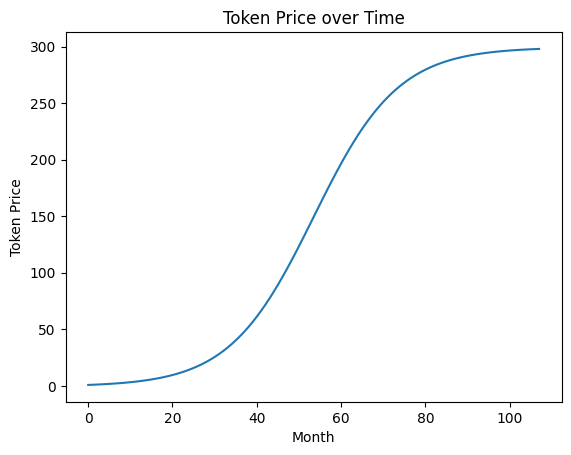

In [66]:
# Define sigmoid parameters
Pt_S_Max = 300  # maximum price
Pt_S_Min = 0.8 # minimum proce
k_S = 0.1  # steepness of the curve

x0 = df['Month'].max() / 2  # midpoint of the sigmoid
# Calculate the token price
df['K_pt_sigmoid'] = Pt_S_Max / (1 + np.exp(-k_S * (df['Month'] - x0)))

# Adjust the initial price to be 0.8
df['K_pt_sigmoid'] = df['K_pt_sigmoid'] - df['K_pt_sigmoid'].min() + Pt_S_Min

plt.plot(df['Month'], df['K_pt_sigmoid'])
plt.xlabel('Month')
plt.ylabel('Token Price')
plt.title('Token Price over Time')
plt.show()

###7.1.2 Node Based Token Demand
The needs of the nodes, however, lie in the fiat plane as they have real-world operating expenses. Since the token value is subject to market fluctuations, we attempt to simulate a simplified representation of the token price to understand how it impacts the node's operation costs. We model the token price using a sigmoid function to mimic its growth pattern as observed in other well-known blockchain networks. In this function, the token price is simulated to increase from its nominal value of **0.8 USD** to a peak value of **300 USD**, a common range observed in maturing cryptocurrencies.

The actual cost of running a node includes factors like the node's operating cost and its token needs which can both change over time. The initial cost of a node operation is factored in as initial_node_cost. Over time, we assume this cost increases at a rate defined by node cost growth rate $G_r$. To account for the additional token needs for nodes, we introduce an initial additional token need initial_additional_token_need which also grows over time at a rate of additional_token_needs_growth_rate. This time-dependent node cost and additional token needs result in a dynamic node token demand (sigmoid) $D_{node}^{sigmoid}$.

By calculating the **node_token_demand_sigmoid**, we can simulate the node's token demand over time, giving a more accurate picture of the token demand of the system. This model hence forms a critical component in understanding and predicting the behavior of token economics in a blockchain network:
$$D_{node}^{sigmoid} = \frac{D_{node}^0 \cdot (1+G_r)^{t^*}}{P_t^{sigmoid} + P_t^{extra}} \tag{29}$$
where:
- $G_r$ - Growth rate
- $t^*$ - Actual time (corresponded with $G_r$)
- $D_{node}^0$ - Initial node cost
- $P_t^{extra}$ - Additional costs of the node due to competition or regulatory restrictions

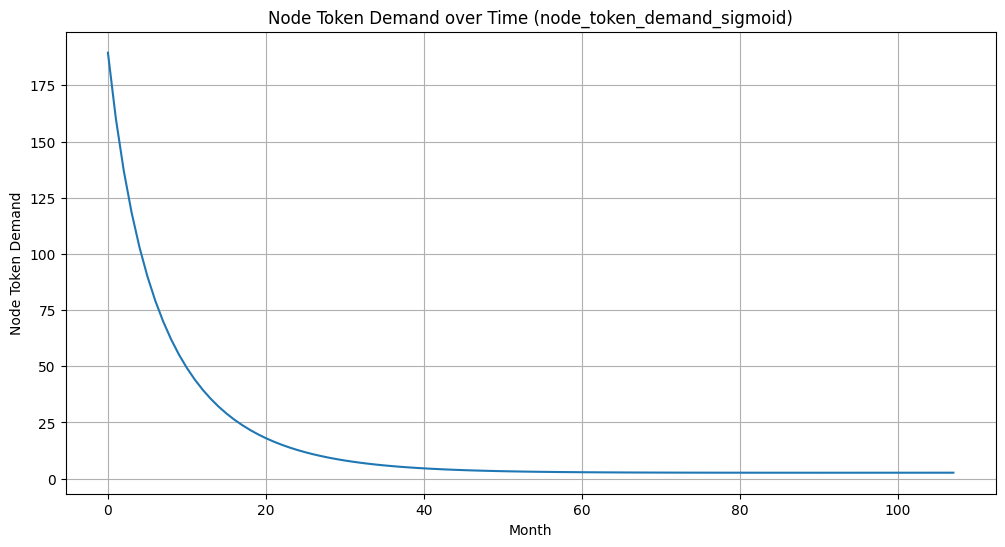

In [67]:
# Defining the parameters for node cost calculation
initial_node_cost = 150  # Initial average node cost
node_cost_growth_rate = 0.01  # Annual growth rate of node costs
initial_additional_token_need = 2  # Initial additional token need per node
additional_token_needs_growth_rate = 0.005  # Growth rate of additional token needs

# Apply function to get time-dependent node costs
df['time_dependent_node_cost'] = initial_node_cost * (1 + node_cost_growth_rate) ** (df['Month'] / 12)

# Time-dependent additional token needs
df['time_dependent_additional_token_need'] = initial_additional_token_need * (1 + additional_token_needs_growth_rate) ** (df['Month'] / 12)

# Token needs of nodes, considering the more realistic token price model and time-dependent node costs and additional token needs
df['node_token_demand_sigmoid'] = df['time_dependent_node_cost'] / df['K_pt_sigmoid'] + df['time_dependent_additional_token_need']

# Plotting node_token_demand_sigmoid
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['node_token_demand_sigmoid'])
plt.title('Node Token Demand over Time (node_token_demand_sigmoid)')
plt.xlabel('Month')
plt.ylabel('Node Token Demand')
plt.grid(True)
plt.show()


### 7.1.3 The network effect
The dependency of the cost of a single node operation within our model accurately mirrors the initial conditions of a new network, where the token's lower valuation prompts nodes to hold a larger amount of tokens to sustain their operations. With time, the necessity for tokens associated with operating expenses stabilizes around a certain value. This value is sufficient to cover the cost of node operation, adjusted for the appreciation of the token's price. In terms of fiat currency, the expenses per node eventually reach a steady-state level. This equilibrium reflects the balance between the token's worth and the real-world operating costs of a node, effectively illustrating the dynamics of a node's token requirements in various stages of the network's growth and token valuation.

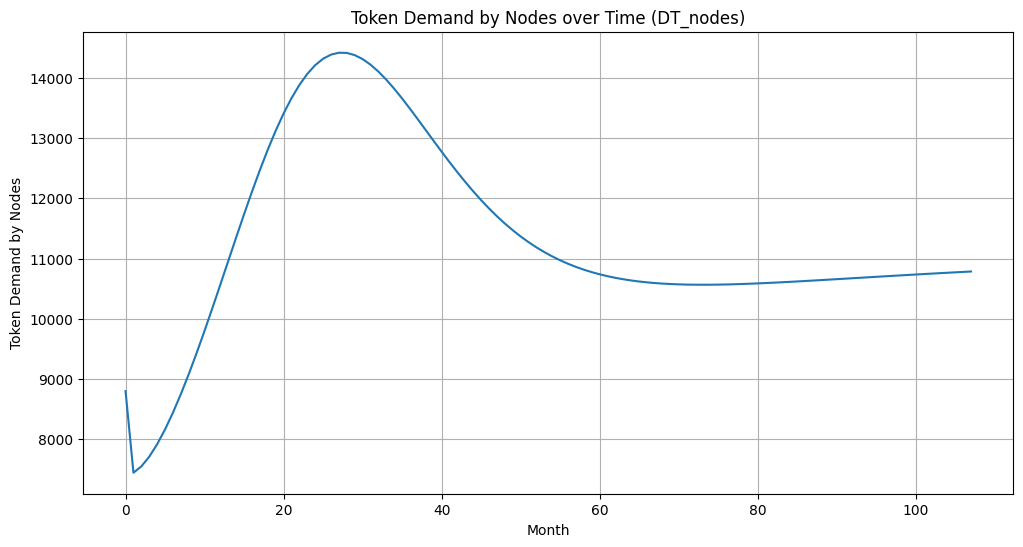

In [68]:
# Defining the parameters for network effect calculation
network_effect_factor = 0.1

# Calculate the token demand by nodes, considering the network effect
df['Nodes'] = pd.to_numeric(df['Nodes'], errors='coerce')
df['DT_nodes'] = df['node_token_demand_sigmoid'] * df['Nodes'] * (1 + network_effect_factor * df['Nodes'].apply(np.sqrt))

# Plotting DT_nodes
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['DT_nodes'])
plt.title('Token Demand by Nodes over Time (DT_nodes)')
plt.xlabel('Month')
plt.ylabel('Token Demand by Nodes')
plt.grid(True)
plt.show()


##7.2 Transaction-Based Token Demand

In order to properly assess the token demand within a network, it's important to consider various aspects of network activity. This is due to the fact that different factors can drive the demand for tokens in different ways. The proposed model thus considers two main aspects: users and value transferred, each of which captures different dynamics of the network's operation.
- **User-Based Demand** : This aspect focuses on the individual network participants. It postulates that the demand for tokens is proportional to the number of active users in the network, multiplied by the average number of transactions each user makes. The logic here is straightforward: more active users imply more transactions, which in turn implies a higher demand for tokens. This aspect essentially represents the "breadth" of token use within the network.
- **Value Transferred Demand**: This aspect, on the other hand, focuses on the aggregate activity within the network, represented by the value transferred across all transactions. It is influenced by Metcalfe's law and concepts of information entropy, suggesting that the network's value (and thus, the demand for tokens) grows more than linearly with the number of participants. This captures the "depth" of token use within the network - tokens may be needed not just for basic transactions, but also for more complex interactions as the network grows in size and complexity.

### 7.2.1 User-based Demand
The approach utilized in this user-based model revolves around the notion that as the average number of transactions per user increases, so too will the demand for tokens. This model introduces the concept of a dynamic demand for tokens based on user activity rather than a fixed per-user demand, which is a much more accurate representation of a growing and evolving network.
In the modeling process, a sigmoid function is employed to represent the range of alterations in the demand for tokens needed to facilitate a certain number of transactions. Similar to previous models, the focus is on defining the shape of the function within given limits. These limits are obtained from abstract external sources, such as the analysis of existing cases.

The token demand per user, in this context, is modeled based on the average number of transactions per user. It is important to note that this model potentially overestimates the token demand, as it aligns with the overall trend of an increasing average number of transactions per active user over time. As the network evolves and user engagement grows, more transactions are likely to occur. This model captures this trend within the set range, providing an upper limit for the token demand per user.

We specifically consider the active users as determined previously, excluding inactive or less active users from the total user base. This ensures a more accurate representation of the token demand based on the activities of users who are actively engaging with the network:
$$D_{user\_based}^T = D_0^T + \frac{D_{max}^T - D_0^T}  {1 + e^{-k_{DTUser} * (TX_{avg} - b_{DTUser})}} \tag{30}$$
Where:
- $D_0^T$ and $D_{max}^T$ represent the initial and maximum token requirements per user, respectively. These are defined based on prior knowledge about the network or assumptions about user behavior.
- $k_{DTUser}$ is the rate of growth of token requirement per user as the number of transactions increases. It determines how rapidly the token demand changes with the change in transactions per user.
- $b_{DTUser}$ is a corrective factor that can adjust the transition point in the sigmoid function.

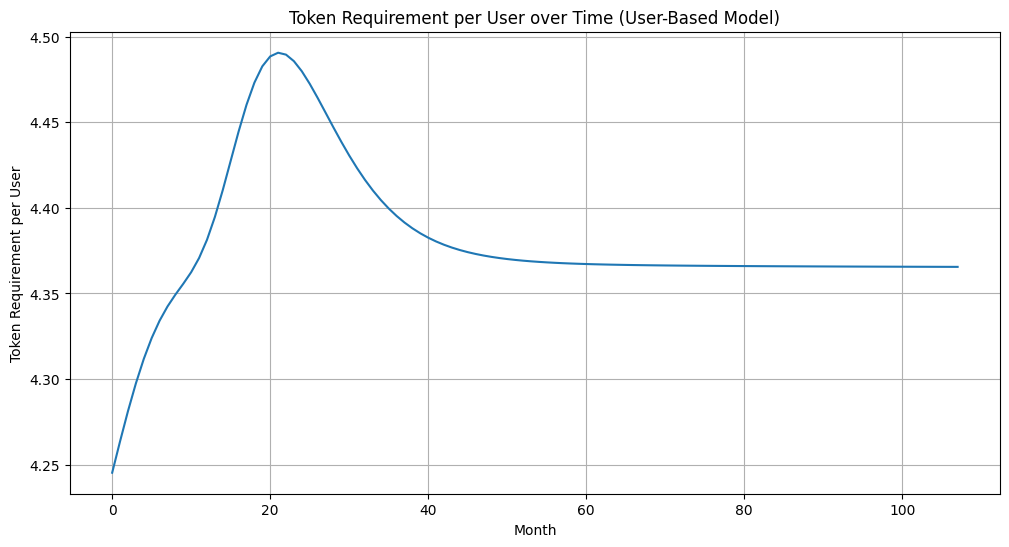

In [69]:
# Active User Based Model

# Defining the parameters
DT0 = 2  # Initial token requirement per user
DT_max = 7  # Maximum token requirement
k_DTUser = 0.1  # Rate of growth of token requirement
b_DTUser = 5 # Transaction correction

# Calculating the average transactions per user
df['avg_transactions_per_user'] = df["TX"] / df["MAU"]

# Calculating the token requirement based on sigmoid function
df['DT_user_based'] = DT0 + (DT_max - DT0) / (1 + np.exp(-k_DTUser * (df['avg_transactions_per_user'] - b_DTUser)))

# Plotting DT_user_based
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['DT_user_based'])
plt.title('Token Requirement per User over Time (User-Based Model)')
plt.xlabel('Month')
plt.ylabel('Token Requirement per User')
plt.grid(True)
plt.show()



The User-Based Model for token demand, as with any model, does have some limitations. Here are a few of them:

- **Simplified Representation**: The model operates under the assumption that all users behave similarly and contribute equally to token demand. This simplification overlooks the possibility of variability in user behavior, with some users potentially requiring significantly more or fewer tokens than the average user.
- **Overestimation**: The model tends to overestimate the token demand, particularly in scenarios where network efficiency increases and the average number of transactions per user grows. This can result in an overly conservative estimation of token requirements.
- **Assumption of Constant Engagement**: The model assumes that the level of user engagement remains constant over time. In reality, user engagement can fluctuate due to factors such as changing user interests, competition, and shifts in market conditions.
- **Exclusion of Inactive Users**: While the model focuses on active users, it excludes inactive or less active users from consideration. These users, despite their lower activity levels, may still require tokens for occasional transactions, which this model does not account for.

###7.2.2 Value-Based Token-Demand Model
The Value-Based Token Demand Model considers the value transferred within the network, often associated with the information entropy of the system. The greater the entropy (or the more complex the information pattern), the greater the value being transferred, and thus, the greater the token demand.
As per Metcalfe's law, the value of a network is proportional to the square of the number of connected users in the system. The entropy of the system, being reflective of the network's complexity, is then equated to this network value.

The value-based token demand $DT_{value\_based}$ per user is then calculated based on this entropy. However, to bring this in line with the reality of token requirements in a system, the demand is also associated with the inverse of entropy, considering that higher efficiency (more connections, higher entropy) could lead to lower token requirements:
$$D_{value\_based}^T= A_{network} \cdot N_{MAU} \tag{31}$$
where
- $A_{network} = k_{network} \cdot  e^{\frac{S_{\epsilon}}{N_{MAU}^2}}$ - Network Value Factor, serves as an attempt to quantify the network's value with respect to its complexity and the number of its active participant
- $N_{MAU}$ - Number of monthly active users (as part of all users)
- $k_{network}$ - The coefficient of efficiency of the network in the transfer of value (viscosity), traditionally low for decentralized networks

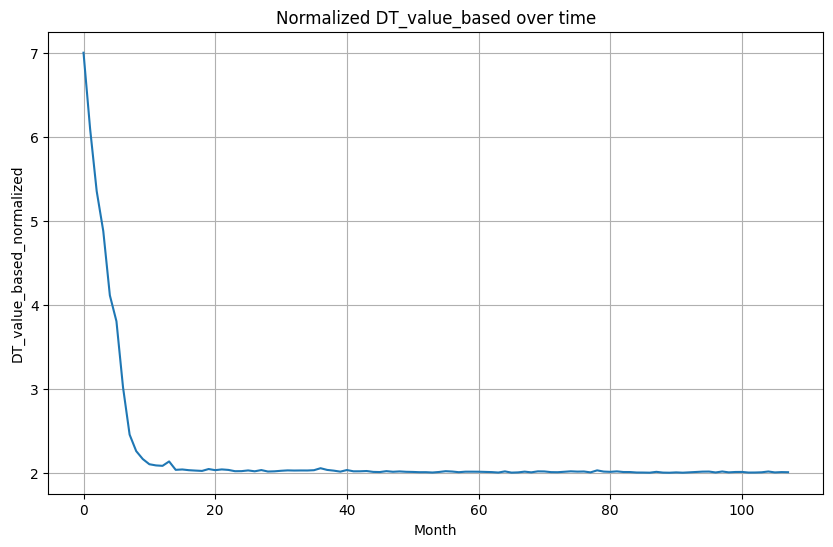

In [70]:
# VALUE-BASED TOKEN DEMAND MODEL
# Constants
k_Network = 10  #Network Efficiency

# Calculation of a_network
df['a_network'] = k_Network * np.exp(-df['entropy']) / (df['MAU'] ** 2)

# Calculation of DT_value_based
df['DT_value_based'] = df['a_network'] * df['MAU']

# Normalization of DT_value_based to the range [DT0, DT_MAX]
df['DT_value_based_normalized'] = DT0 + ((df['DT_value_based'] - df['DT_value_based'].min()) /
                                         (df['DT_value_based'].max() - df['DT_value_based'].min())) * (DT_max - DT0)

# Plotting of DT_value_based_normalized
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['DT_value_based_normalized'])
plt.title('Normalized DT_value_based over time')
plt.xlabel('Month')
plt.ylabel('DT_value_based_normalized')
plt.grid(True)
plt.show()



The fusion of two distinct token demand models - the User-Based Model and the Value Transferred Model - delivers a comprehensive estimation of token demand, which is driven by network transactions. This combined model captures both the demand driven by the number of active users (MAU) and the value transfer within the network (inferred from entropy as a measure of complexity or randomness).

In the User-Based Model, the demand for tokens increases with the average number of transactions per active user. This model essentially mirrors User Engagement, capturing the notion that as more users engage with the network, they would require more tokens to support their activities.

On the other hand, the Value Transferred Model, anchored in Metcalfe's Law and entropy, represents the network's complexity and the value transfer that happens within it. This model suggests that as the network's complexity increases (higher entropy) and more value is transferred (more transactions), there is a higher demand for tokens.

By blending these two models, we can better reflect the intricate dynamics of token demand in the network. The aggregate token demand, therefore, arises from both user engagement (transaction frequency per user) and the complexity of value transfer in the network:
$$D_{TX}^T= α ⋅ D_{user\_based}^T ⋅ N_{MAU} +(1-α) ⋅ D_{value\_based}^T ⋅ N_{MAU} \tag{32}$$

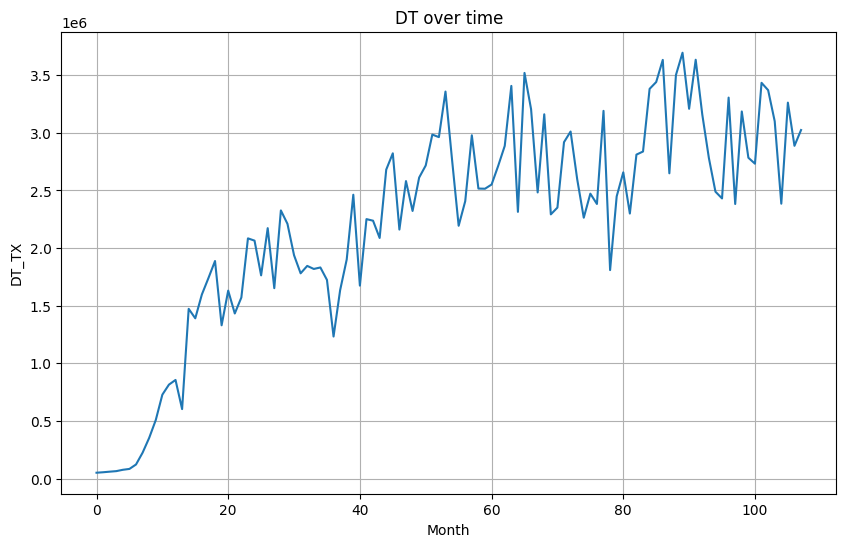

In [71]:
# Weight for DT_user_based
alpha = 0.2

# Calculate DT as the weighted sum of DT_user_based and DT_value_based_normalized
df['DT_transaction'] = alpha * df['DT_user_based'] * df['MAU'] + (1 - alpha) * df['DT_value_based_normalized'] * df['MAU']

# Plotting of DT
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['DT_transaction'])
plt.title('DT over time')
plt.xlabel('Month')
plt.ylabel('DT_TX')
plt.grid(True)
plt.show()


The DT_Network represents the total demand for tokens in the network at a given time, accounting for both the demand due to network nodes and the demand due to transactions:
$$D_{Network}^T = D_{nodes}^T + D_{tx}^T \tag{33}$$

- It serves to quantify the token requirement dictated purely by operational costs. This includes the resources needed to uphold the network's infrastructure, characterized by the $D_{nodes}^T$ component, and the resources demanded by the active users and value transfer dynamics, as denoted by the $D_{tx}^T$ component.
- This measure deliberately excludes any influence from speculative activity, i.e., token trading based on price speculation rather than operational necessity. By doing so, the $D_{Network}^T$ value presents a clearer picture of the genuine functional demand for tokens within the network.
- Additionally, $D_{Network}^T$ omits the contribution from staking. Staking is the act of setting aside a reserve pool of tokens to support network security, operations, and applications, which can substantially contribute to the **Total Value Locked** (TVL) in a network. By excluding the staking component, $D_{Network}^T$ maintains its focus on the transactional and operational aspects of the network.

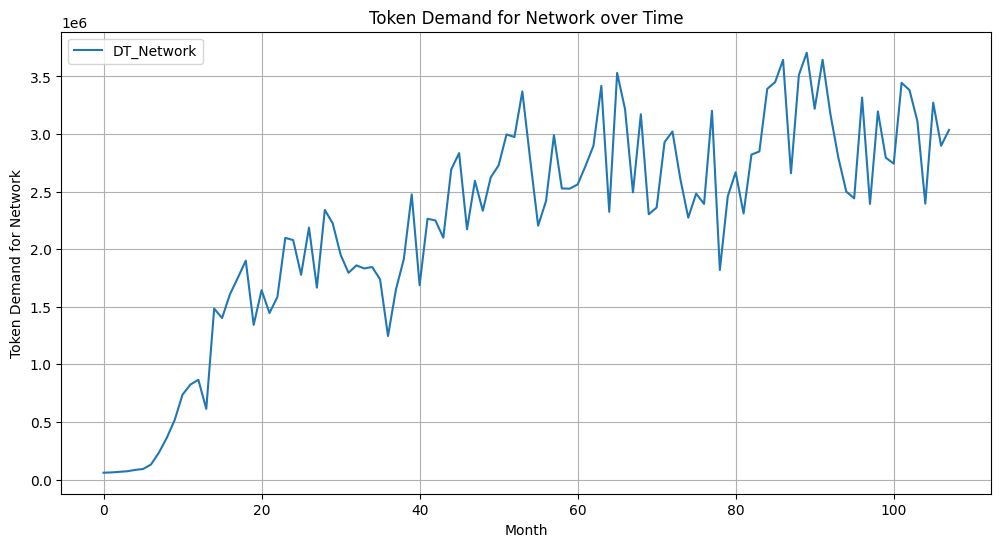

In [72]:
# Define DT_Network as the sum of DT_nodes and DT_transaction
df['DT_Network'] = df['DT_nodes'] + df['DT_transaction']

# Plotting DT_Network
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['DT_Network'], label='DT_Network')

plt.title('Token Demand for Network over Time')
plt.xlabel('Month')
plt.ylabel('Token Demand for Network')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


## 7.3 Staking Part modeling
The $D_{staking}^T$ model represents the token demand for staking in the network. Staking is a process where holders of a cryptocurrency participate in the network by locking or "staking" their tokens in a wallets or other constructions (i.e. smart contract)  to support the operations of a blockchain network, such as transaction validation, security, and governance. These participants are rewarded for staking their coins, thereby incentivizing this activity.

In the model, $D_{staking}^T$ is calculated as the cumulative token supply S_cumulative divided by a **staking ratio** (smooth_staking_ratio). The staking ratio is a time-dependent function, initially set high and then decreasing over time. This decreasing trend is overlaid with stochastic oscillations to represent the fluctuations in staking behavior over time.

The smooth_staking_ratio function used here is a proxy for the $\frac{MCAP}{TVL}$ metric. **MCAP** stands for Market Capitalization, which is the total value of all the tokens in circulation. **TVL** (Total Value Locked) is a metric often used in DeFi (Decentralized Finance) to measure the amount of crypto assets that are currently staked or locked in a specific protocol or platform.

As a ratio, $\frac{MCAP}{TVL}$ reflects the relationship between the total value of the tokens and the amount of those tokens currently being staked or used in applications. This ratio can give insights into the overall health and participation of users in a network.

In the real world, both the MCAP and the TVL can fluctuate due to a variety of factors including market dynamics, changes in the network, and user behavior. Therefore, it's reasonable to model the staking ratio as a time-dependent function with fluctuations.

To sum up, $D_{staking}^T$ is a modelled approximation of the token demand for staking, based on the cumulative token supply and a staking ratio that reflects real-world metrics and behaviors.
$$D_{staking}^T = \frac {S_{cumulative}}{r_{staking}} \tag{34}$$
Where:
- $S_{cumulative}$ - the cumulative amount of tokens available to the network
- $r_{staking} = rA_{staking}⋅Z_r^t$ - staking ratio
- $rA_{staking}=r_{staking}^{min}+(r_{staking}^{max}−r_{staking}^{min})⋅e^{−decay_{rate}⋅t}$ - mantissa of staking ratio
- $Z_r^t$ - fluctuations

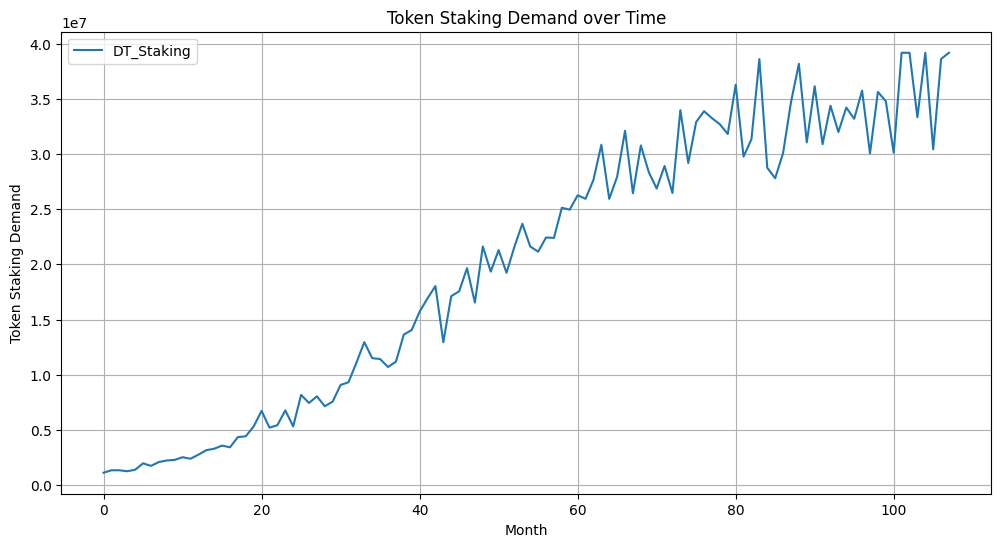

In [73]:
# Parameters for the time-dependent staking ratio
max_staking_ratio = 15
min_staking_ratio = 1.2
decay_rate = 0.05

# Time
t = df['Month']

# Calculate the smooth time-dependent staking ratio
smooth_staking_ratio = min_staking_ratio + (max_staking_ratio - min_staking_ratio) * np.exp(-decay_rate * t)

# Add stochastic fluctuations
np.random.seed(0)
fluctuations = np.random.normal(loc=0, scale=1, size=len(t))

# We are applying exponential function to the fluctuations to ensure they are always positive and mimic a "random walk" style
fluctuations = np.exp(fluctuations / 10)

# The smooth staking ratio is multiplied by these fluctuations
staking_ratio = smooth_staking_ratio * fluctuations

# Ensure that the staking ratio does not fall below the minimum staking ratio
staking_ratio = np.maximum(staking_ratio, min_staking_ratio)

# Calculate DT_Staking
df['DT_Staking'] =  df['S_cumulative'] /staking_ratio

# Plotting DT_Staking
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['DT_Staking'], label='DT_Staking')
plt.title('Token Staking Demand over Time')
plt.xlabel('Month')
plt.ylabel('Token Staking Demand')
plt.grid(True)
plt.legend()
plt.show()


##7.4 Total Demand
The total demand for tokens, represented as $DT_{total}$, is computed by combining the demand originating from the network deposits $D_{Network}^T$ and the demand stimulated by staking, represented as $DT_{Staking}$. The network deposit demand $D_{Network}^T$ itself is a composite of the demand from nodes $D_{Nodes}^T$ and the demand generated by transactions $D_{tx}^T$.

Nodes and transactions within the network generate an inherent demand for tokens as these tokens facilitate the operations and enable various functionalities within the network. This generates what we term as the **Network Deposit Demand**.

Moreover, staking presents another crucial source of token demand. In staking, network participants can lock their tokens for a certain period, contributing to the network's security and in return earning rewards. This staking process is especially important in **B2B2C** systems, where tokens can help enable and build individual DeFi applications, thereby increasing their demand.

In this context, the contribution of staking to the total token demand should not be underestimated. It adds another dimension of utility for the token, enhancing its intrinsic value by providing more use-cases for network participants, and thus potentially driving up demand.

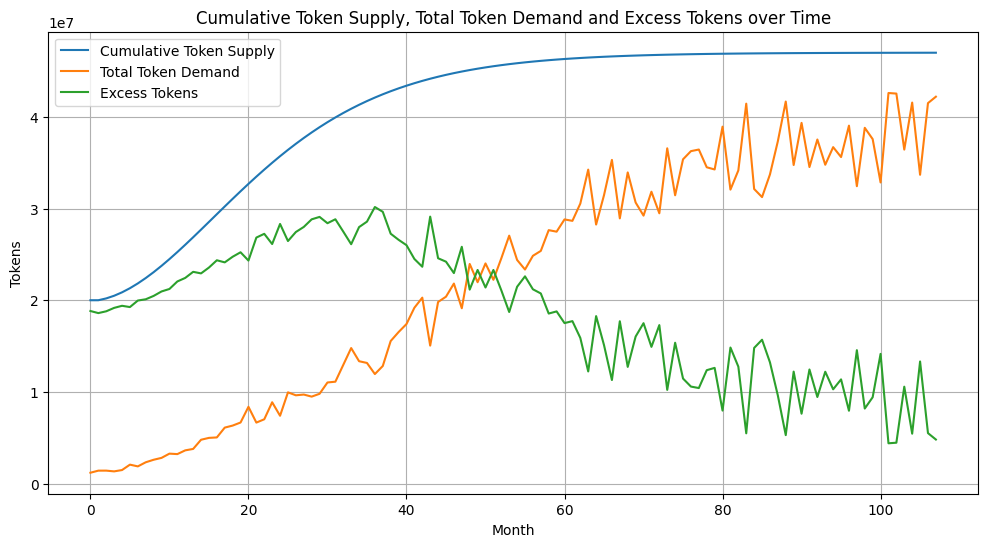

In [74]:
# Calculate DT_total
df['DT_total'] = df['DT_Network'] + df['DT_Staking']

# Calculate DT_xcapacity
df['DT_xcapacity'] = df['S_cumulative'] - df['DT_total']

# Plot Cumulative Token Supply, Total Token Demand and excess tokens
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['S_cumulative'], label='Cumulative Token Supply')
plt.plot(df['Month'], df['DT_total'], label='Total Token Demand')
plt.plot(df['Month'], df['DT_xcapacity'], label='Excess Tokens')
plt.title('Cumulative Token Supply, Total Token Demand and Excess Tokens over Time')
plt.xlabel('Month')
plt.ylabel('Tokens')
plt.legend()
plt.grid(True)
plt.show()



# #8. TOKEN PRICE
-------------
The key principle of the model is that it integrates different factors that could influence the token price, including entropy (unpredictability), demand-supply dynamics, yield curve (interest rate), and random fluctuations. It also applies the principle of viscosity to simulate the slowing down of price growth as it nears the upper limit. This combination of factors makes the model dynamic and responsive to different scenarios.
Price modeling is carried out through the use of stochastic differential equation commonly used in financial modeling, known as the geometric **Brownian motion (GBM)**. It describes the expected change in a quantity, here the price P_t of the token, as the sum of a deterministic trend and a random component:
$$dP_t=P_t μ_t^P dt+ P_t σ_t^P dZ_t \tag{35}$$
The main parts of the equation are:
- $P_t$: This represents the price of the token at time t.
- $μ_t^P$: This represents the expected return or "drift" of the token price, and can depend on a variety of factors.
- $σ_t^P$: This represents the standard deviation of the returns or "volatility" of the token price, expressing the level of uncertainty or risk associated with it.
- $dt$: This is an infinitesimal increment of time.
- $dZ_t$: This represents a Wiener process (or Brownian motion), a type of random process where the changes $dZ_t$ in consecutive, infinitesimally small time increments dt are independent, normally distributed with a mean of 0 and a variance of $dt$.

The deterministic part $P_t μ_t^P dt$ of the equation says that, on average, the price of the token grows at a rate of $μ_t^P$ per time unit.

The stochastic part $P_t σ_t^P dZ_t$ adds a random fluctuation to this deterministic trend, which is proportional to the token price (which means the model assumes a constant relative risk). The term $dZ_t$ introduces randomness, making the model stochastic. This means that the price $P_t$ follows a random walk and, more specifically, a geometric Brownian motion.
The approach currently utilized in our model provides a simple, mathematical description of the intricate and unpredictable behavior of financial market prices over time. It operates on the assumption that relative price changes are normally distributed and independent from each other. This renders the model straightforward and effective for many scenarios, making it a popular choice for various financial applications.

However, it is important to understand that all models, including ours, are approximations and simplifications of the realities of financial markets. Therefore, they have certain limitations. For instance, the assumption of normally distributed and independent price changes may not hold true in real-world markets, especially in situations of high volatility or significant market events.

In such cases, alternative models, such as the Jump Diffusion Model or Mean-Reverting Models, might offer more accurate representations. The Jump Diffusion Model, for instance, can account for sudden, significant price changes ("jumps"), while Mean-Reverting Models assume that prices tend to revert to a long-term average, which may be more suitable if we believe that our token price will behave in such a manner.

While these alternative models are not incorporated into our current model, they could be considered in future iterations or adaptations, depending on the characteristics of the token and its market behavior. Thus, it's essential to continually evaluate the performance of our model and consider modifications as necessary to reflect the evolving market dynamics.

##8.1 Nelson-Siegel-Svensson model
The Nelson-Siegel-Svensson (NSS) model is an extended version of the Nelson-Siegel (NS) model, commonly used to describe interest rate term structures or yield curves. A yield curve represents the relationship between the interest rate (or cost of borrowing) and the time to maturity of the debt for a given borrower in a given currency.

The NSS model defines the instantaneous forward rate as a function of four components: a long term factor, a short term factor, a medium term factor, and an over-demand factor:
$$Y(t)= β_0 + \frac{β_1 (1-e^{-t/τ_1})}{t/τ_1 } + β_2\left( \frac{1-e^{-t/τ_1}}{t/τ_1} -e^{-t/τ_1} \right) + β_3 \left( \frac{1-e^{-t/τ_2}}{t/τ_2} - e^{-t/τ_2} \right) = Y_0+Y_1+Y_2+Y_3 \tag{36}$$

Here's what each component represents:
- **$Y_0$ (Long term factor)**: This component, represented by beta0, is the long term interest rate or the level factor of the yield curve. It is a constant value that sets the asymptotic future interest rate as time tends to infinity.

- **$Y_1$ (Short term factor)**: This component captures the impact of short term rates and is responsible for the initial steepness of the yield curve. The beta1 parameter sets the slope at time zero and tau1 represents a decay factor. The term np.exp(-t/tau1) introduces a decay effect, meaning the influence of this factor decreases as time progresses.

- **$Y_2$ (Medium term factor)**: This component models the hump in the yield curve. beta2 sets the size of the hump, while tau1 again is a decay factor. The term (t/tau1) * np.exp(-t/tau1) means the influence of this factor increases initially, reaches a peak, and then decreases.

- **$Y_3$ (Over-demand factor)**: This component, unique to the NSS model, captures any additional influences on the interest rate not covered by the other three components. beta3 sets the size of this influence, while tau2 acts as a decay factor. Like Y2, the term (t/tau2) * np.exp(-t/tau2) introduces an increase, peak, and decrease effect.

The final yield curve is the sum of these four components, yielding a flexible model that can capture a variety of yield curve shapes.

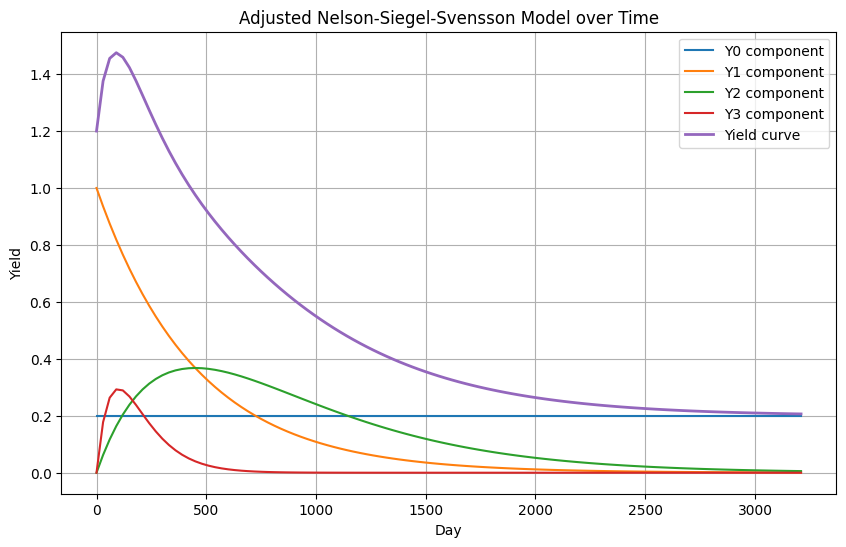

In [75]:

# Define the Nelson-Siegel-Svensson parameters
beta0 = 0.2
beta1 = 1
beta2 = 1
beta3 = 0.8
tau1 = 450
tau2 = 100

# Use 'Day' from df as timeline
t = df['Day'].values

# Calculate the four components of the Nelson-Siegel-Svensson model
Y0 = beta0
Y1 = beta1 * np.exp(-t/tau1)
Y2 = beta2 * (t/tau1) * np.exp(-t/tau1)
Y3 = beta3 * (t/tau2) * np.exp(-t/tau2)

# Calculate the yield curve
yield_curve = Y0 + Y1 + Y2 + Y3

# Add the yield curve to the DataFrame
df['yield_curve'] = yield_curve

# Plot the four components and the yield curve
plt.figure(figsize=(10, 6))
plt.plot(t, Y0*np.ones_like(t), label='Y0 component')
plt.plot(t, Y1, label='Y1 component')
plt.plot(t, Y2, label='Y2 component')
plt.plot(t, Y3, label='Y3 component')
plt.plot(t, yield_curve, label='Yield curve', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Yield')
plt.title('Adjusted Nelson-Siegel-Svensson Model over Time')
plt.legend()
plt.grid(True)
plt.show()



##8.2 The price simulation
The token price model we have developed is essentially a stochastic differential equation model based on Geometric Brownian Motion (GBM). It integrates elements of supply and demand, as well as a yield curve derived from the Nelson-Siegel-Svensson model, to predict the token price P_t over time.

This approach allows for the consideration of multiple variables affecting the price:

- **Supply and Demand**: The model takes into account the cumulative supply of tokens (S_cumulative) and the total demand for tokens (DT_total). The difference between these two factors impacts the mean return (Mu) of the token price.

- **Entropy**: The model also factors in entropy, which represents the randomness or uncertainty in the system. Higher entropy accelerates the token price growth rate, while lower entropy slows it down.

- **Yield Curve**: The yield curve (sigma), derived from the Nelson-Siegel-Svensson model, represents interest rates over time and is used to simulate the volatility of the token price.

- **Viscosity Factor**: As the price approaches an upper limit, a viscosity factor is applied to slow down the growth and prevent the price from exceeding this limit.

- **Random Fluctuations**: Random fluctuations in price are accounted for by incorporating a stochastic term $dZ_t$, following a normal distribution.

The model algorithm:
1. **Initialization**:
- Token price $P_t$ is initialized to $P_t^{Min}$ which is the minimum token price limit.
- $dZ_t$ is initialized with random normal values scaled by sqrt(dt) (square root of time step).
2. **Iteration over time**: The model iterates over time from the second time step to the end (since the first time step was used for initialization).

- Growth Rate $\mu$ calculation: $\mu_t^P$, the growth rate of token price, is calculated for each time step. It is determined by the entropy of the system and the difference between total demand for tokens and cumulative supply of tokens. The entropy reflects the unpredictability of the system, while the demand-supply difference reflects the scarcity or abundance of tokens in the system. A scaling factor (**entropy_scale**) is used to adjust the effect of entropy.
- Volatility (Sigma) Calculation: $\sigma_t^P$, the volatility of token price, is calculated for each time step. It is determined by the yield curve and scaled by a factor $sigma_{scale}$ to adjust the level of price fluctuations.
- Token Price Change Calculation: The change in token price $dP_t$ for each time step is calculated using a formula similar to geometric Brownian motion, which includes the growth rate, volatility, and a random factor $dZ_t$.

3. **Viscosity Effect**: If the token price exceeds a certain threshold close to the maximum limit $P_t^{max}$, a viscosity factor is applied to slow down the price growth.

4. **Token Price Adjustment**: After calculating the new token price, it is adjusted to ensure it stays within the predefined minimum and maximum limits
$P_t^{min}$ and $P_t^{max}$.

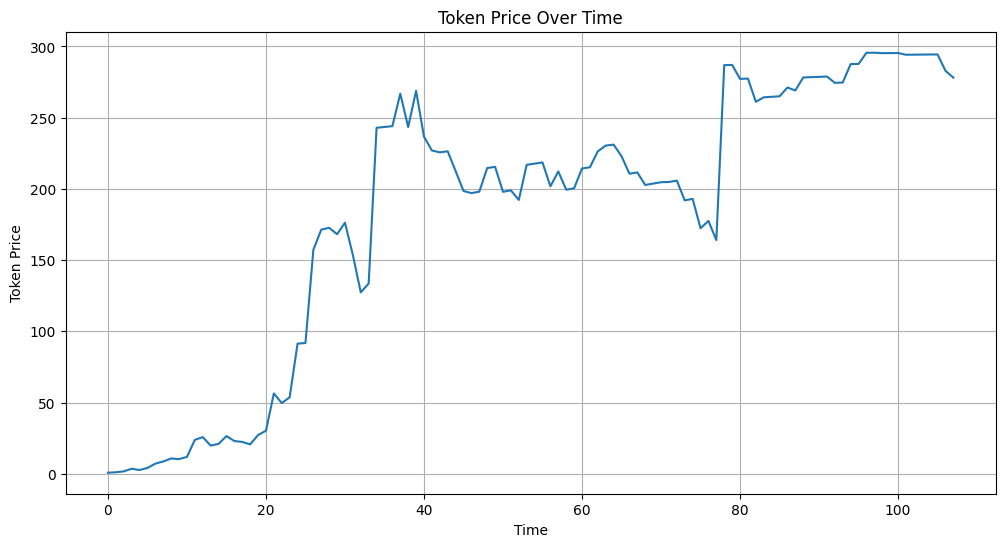

In [76]:
import numpy as np

# Constants
Pt_S_Min = 0.8  # Start (minimal price)
Pt_S_max = 300  # Maximum Price (external factor)
dt = 1e-2  # time step
viscosity_factor = 0.01  # intended to model the slowdown of price growth as it approaches the upper bound
entropy_scale = 8  #  impact of entropy on the growth rate of the token price
denom_scale = 0.1  #  prevent the growth rate from becoming excessively high in cases where the demand and supply are very close to each other.
sigma_scale = 2  # price fluctuations

# Initialize token price
df['P_t'] = Pt_S_Min

# Initialize dZ_t
df['dZ_t'] = np.random.normal(0, np.sqrt(dt), len(df))

# Calculate rate of change of total demand
df['DT_total_derivative'] = df['DT_total'].diff()
# Ensure no negative values
df['DT_total_derivative'] = df['DT_total_derivative'].clip(lower=0)

# Initial Mu_P_t_0
Mu_P_t_0 = entropy_scale / max((df.loc[0, 'DT_total'] - df.loc[0, 'S_cumulative']), denom_scale)

for i in range(1, len(df)):
    # Calculate Mu and Sigma
    Mu_P_t = max(Mu_P_t_0 - df.loc[i, 'DT_total_derivative'], 0)  # Adjust Mu_P_t based on the change in total demand
    Sigma_P_t = sigma_scale * df.loc[i, 'yield_curve']

    # Calculate dP_t
    df.loc[i, 'P_t'] = df.loc[i-1, 'P_t'] + df.loc[i-1, 'P_t'] * Mu_P_t * dt \
                       + df.loc[i-1, 'P_t'] * Sigma_P_t * df.loc[i, 'dZ_t']

    # Apply viscosity factor if price is approaching upper limit
    if df.loc[i, 'P_t'] > Pt_S_max * (1 - viscosity_factor):
        df.loc[i, 'P_t'] = df.loc[i-1, 'P_t'] + viscosity_factor * (Pt_S_max - df.loc[i-1, 'P_t'])

    # Ensure price stays within limits
    df.loc[i, 'P_t'] = max(min(df.loc[i, 'P_t'], Pt_S_max), Pt_S_Min)

# Plot the token price over time
plt.figure(figsize=(12, 6))
plt.plot(df['P_t'])
plt.title('Token Price Over Time')
plt.xlabel('Time')
plt.ylabel('Token Price')
plt.grid(True)
plt.show()


# #9. COMMON METRICS

## 9.1 Decentralization Measurement

### 9.1.1 Active Node Index
This index measures the proportion of nodes that are actively participating in the network. To calculate ANI, you would need to identify the number of active nodes and divide it by the total number of nodes.

$$ANI = \frac {N_{Active Nodes}} {N_{nodes}} \tag{37}$$

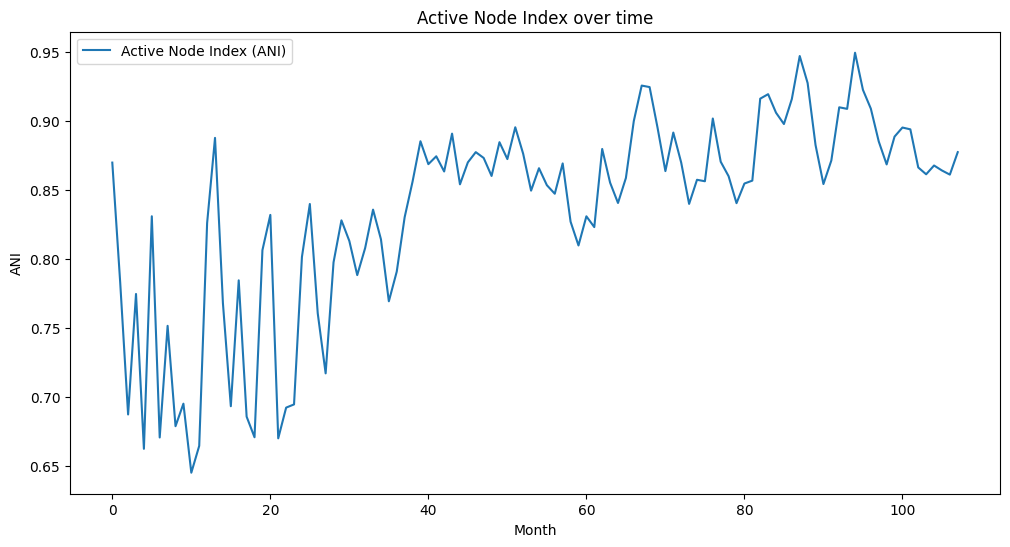

In [77]:
# Calculate the Active Node Index (ANI)
df['ANI'] = df['LuckyNodes'] / df['ValidatorNodes']

# Plot the ANI
plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['ANI'], label='Active Node Index (ANI)')
plt.title('Active Node Index over time')
plt.xlabel('Month')
plt.ylabel('ANI')
plt.legend()
plt.show()


### 9.1.2 Node Diversity
The concept of node dependency can play a significant role in network design decisions, particularly in **hybrid networks** such as DGT. These networks are unique in that they feature a blend of centralized and decentralized elements, hence the term 'hybrid'. Node dependency in this context refers to the nodes that are controlled or influenced by a group or consortium of entities, as opposed to independent nodes, which are operated by individual entities with no common control.

The more traditional model of decentralization, such as Nakamoto's, has limitations in the context of these hybrid networks. Nakamoto's decentralization metric was designed with fully public, permissionless blockchains like Bitcoin in mind. In these networks, the primary consideration is ensuring that no single entity has control over more than 50% of the network's resources, to prevent so-called '51% attacks'. In hybrid networks, however, control of the network is often intentionally concentrated within a group or consortium, while still allowing for some level of independent participation. This difference in network structure requires a different approach to measuring and analyzing decentralization.

####9.1.2.1 Independent Nodes
In our model, we start by calculating the number of independent nodes. In a real-world scenario, the number of these nodes is determined by a myriad of factors. We model these factors through a network utility metric, which captures the network's attractiveness for individuals with limited capital who wish to participate as independent node operators. This is particularly relevant in the public sector of DGTs, where independent operators can earn transaction fees. However, due to their limited resources, the number of these independent nodes will likely be small.

The number of independent nodes in the network is modeled using three factors: the network utility $U_{network}$, the total number of nodes $Nodes$, and a predefined maximum ratio of independent nodes in the network $r_{ind}^{max}$ (maximum independent nodes ratio):
$$N_{independent}= U_{network} \cdot r_{ind}^{max} \cdot Nodes \tag{38}$$
Where:
- $U_{network}$ (Network Utility): The **network utility** is a measure that we previously derived from Sarni's Law with some modifications. It takes into account network performance ($A_t$), entropy, and the number of actual users. The idea here is that the more useful the network is (a higher utility value), the more incentive there is for entities to run their independent nodes. This parameter reflects the attractiveness or "pull" of the network for entities to become independent nodes.

- $Nodes$ (Total Number of Nodes): The total number of nodes in the network provides the overall potential pool from which independent nodes can arise. This is a factor of the network's size and growth over time.

- $r_{ind}^{max}$ (Maximum Independent Nodes Ratio): This is a parameter that defines the maximum proportion of total nodes that can become independent nodes. This parameter can be set based on the nature of the network, its rules and policies, and the level of decentralization desired. This ratio sets a ceiling to the number of independent nodes in the network.

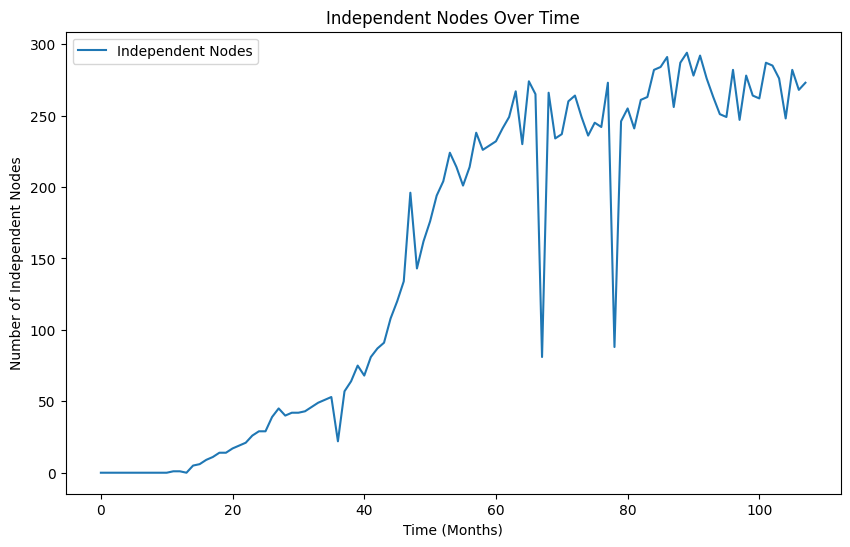

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# maximum ratio of independent nodes to all nodes
max_independent_nodes_ratio = 0.3

# calculate the number of independent nodes, proportional to network utility
df['Independent_Nodes'] = (df['U_network'] * df['Nodes'] * max_independent_nodes_ratio).astype(int)

# plot the number of independent nodes over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Independent_Nodes'], label='Independent Nodes')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Independent Nodes')
plt.title('Independent Nodes Over Time')
plt.legend()
plt.show()


####9.1.2.2 Node ownership dynamic
The algorithm we have developed models the dynamics of node ownership in a Decentralized Governance Technology (DGT) network, with a particular focus on the concept of Node Dependency and Entities_Multinode.

**Node Dependency**: In the context of DGTs, a node is said to be dependent if it is controlled or managed by a specific entity or organization. It's not entirely self-managed as an independent node. It depends on the policies, rules, or management of the controlling entity.

DGT networks are often hybrid in nature, mixing elements of both public and private network structures. This hybridity often leads to a significant number of dependent nodes. It's a function of the unique nature of DGTs that are designed to enable both inclusivity (like public networks) and efficiency/security (like private networks). Therefore, nodes in such networks are often controlled or influenced by specific entities (consortium, alliances, companies), leading to their classification as dependent nodes.

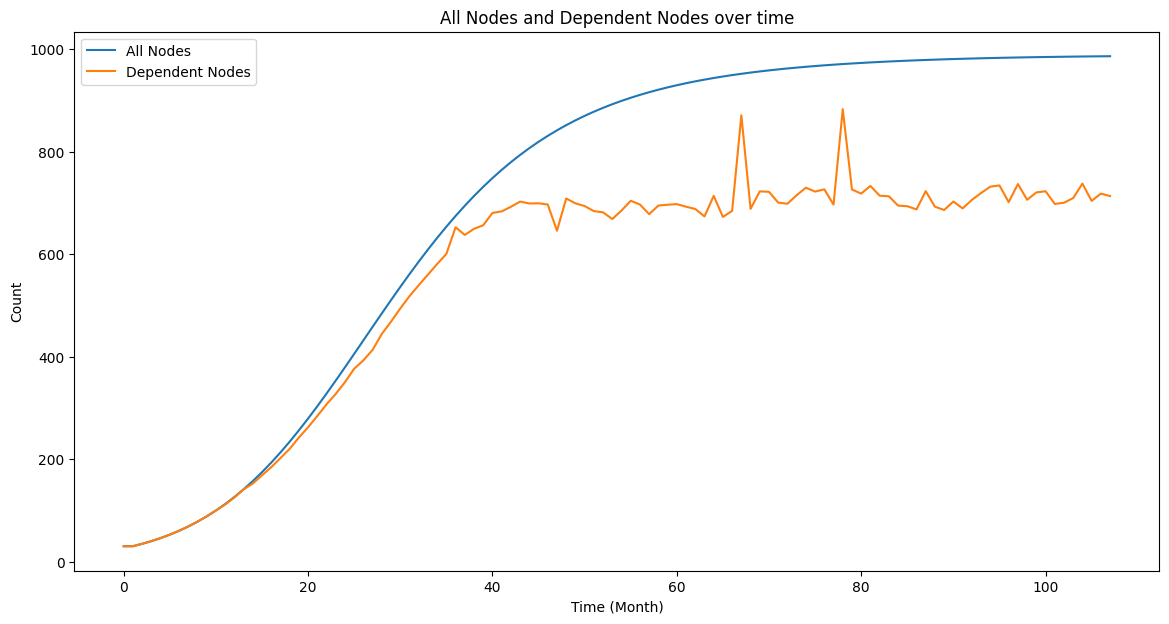

In [79]:
# Set initial parameter
threshold_ratio = 0.7  # Ratio of moderately to highly dependent nodes
df['Dependent_Nodes']= df['Nodes'] - df['Independent_Nodes']
# Initialize lists to store results
mod_dependent_nodes = [df.loc[0, 'Dependent_Nodes'] * threshold_ratio]
high_dependent_nodes = [df.loc[0, 'Dependent_Nodes'] * (1 - threshold_ratio)]

# Compute types of dependent nodes for each time step
for i in range(1, len(df)):
    # Compute new dependent nodes
    mod_dependent_nodes.append(df.loc[i, 'Dependent_Nodes'] * threshold_ratio)
    high_dependent_nodes.append(df.loc[i, 'Dependent_Nodes'] * (1 - threshold_ratio))

# Store results in the DataFrame
df['Moderately_Dependent_Nodes'] = mod_dependent_nodes
df['Highly_Dependent_Nodes'] = high_dependent_nodes

# Plotting the results
plt.figure(figsize=(14,7))

# Plotting All Nodes
plt.plot(df['Month'], df['Nodes'], label='All Nodes')

# Plotting Dependent Nodes
dependent_nodes_sum = df['Moderately_Dependent_Nodes'] + df['Highly_Dependent_Nodes']
plt.plot(df['Month'], dependent_nodes_sum, label='Dependent Nodes')

plt.legend(loc='upper left')
plt.title('All Nodes and Dependent Nodes over time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.show()


#### 9.1.2.3 Dominance of the Initial Consortium
The algorithm we have developed simulates the evolution of control over a network initiated by a consortium over time. The key concepts here are the notion of the "consortium", which refers to a group of organizations or entities that have come together to launch and initially control the network, and the "other entities", which are entities that join the network over time and progressively control more of its nodes.

The algorithm is built upon the understanding that in hybrid or consortium-based networks (like a Distributed Ledger Technology or DLT), initial control is often centralized with the founding consortium. However, over time, as more entities join the network, this control becomes more decentralized.

The "decay rate" is a crucial parameter in this model. It represents how quickly the consortium is reducing its influence over the network. A higher decay rate signifies that the consortium is relinquishing its control more quickly, thus leading to faster decentralization. The minimum number of nodes controlled by the consortium is set to a fixed number (in this case, 3) to ensure that the consortium retains some minimum influence over the network.

The evolution is captured by the model in three metrics:

- **Consortium Nodes**: The number of nodes controlled by the consortium, which decreases over time based on an exponential decay function.

- **Other Entity Nodes**: The number of nodes controlled by other entities, which is simply the difference between the total number of dependent nodes and the number controlled by the consortium. This number increases over time as the consortium's control decreases.

- **Dependent Nodes**: The total number of dependent nodes, which remains constant over time.

The simulation provides valuable insights into the decentralization process of the network. It highlights that the control of a consortium-launched network tends to become more dispersed over time, which may be an important consideration for entities looking to join such a network. It also provides a quantitative tool to study the dynamics of control in hybrid networks, enabling network designers to model and anticipate changes in network control and adjust their strategies accordingly.

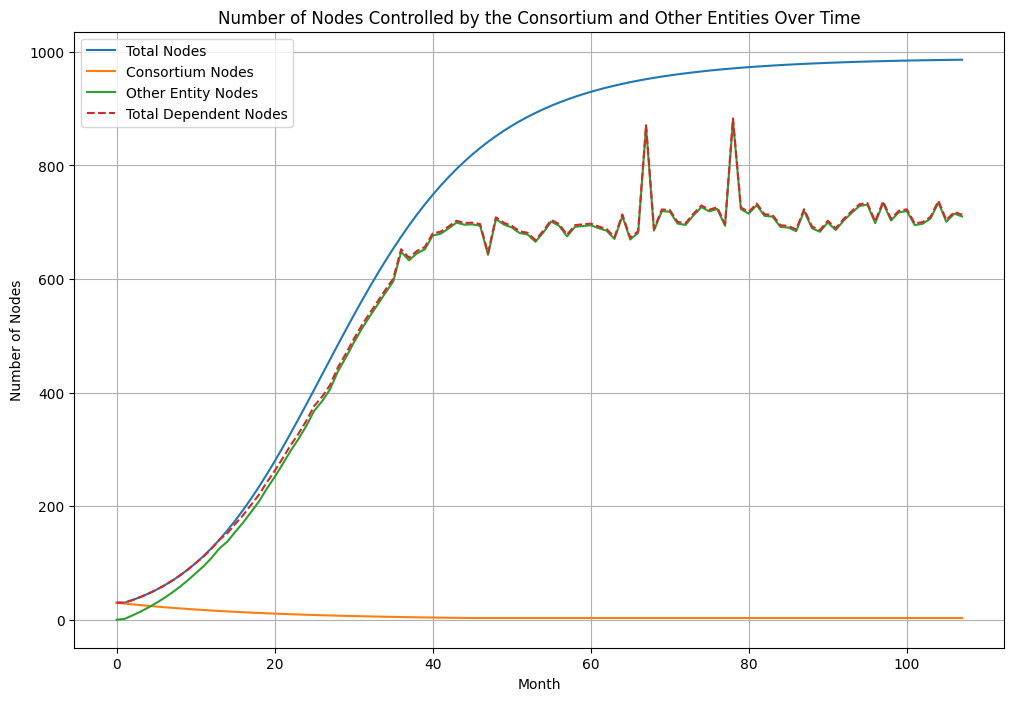

In [80]:
# Define decay rate for the consortium nodes
decay_rate = 0.05

# Initialize list to hold the number of nodes controlled by the consortium for each month
consortium_nodes = []

# Initial and final number of consortium nodes
initial_consortium_nodes = 30
final_consortium_nodes = 3

# Iterate over each month
for i in range(len(df)):
    # At month 0, the consortium controls all nodes
    if i == 0:
        consortium_nodes_current = initial_consortium_nodes
    else:
        # Apply exponential decay, but not less than the final number of consortium nodes
        consortium_nodes_current = max(consortium_nodes[i-1] * (1 - decay_rate), final_consortium_nodes)

    consortium_nodes.append(consortium_nodes_current)

# Update the number of nodes controlled by other entities
df['Other_Entity_Nodes'] = df['Dependent_Nodes'] - consortium_nodes

# Update the number of nodes controlled by the consortium
df['Consortium_Nodes'] = consortium_nodes


# Plot the number of nodes controlled by the consortium and other entities over time
plt.figure(figsize=(12, 8))
plt.plot(df['Month'], df['Nodes'], label='Total Nodes')
plt.plot(df['Month'], df['Consortium_Nodes'], label='Consortium Nodes')
plt.plot(df['Month'], df['Other_Entity_Nodes'], label='Other Entity Nodes')
plt.plot(df['Month'], df['Dependent_Nodes'], label='Total Dependent Nodes', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes Controlled by the Consortium and Other Entities Over Time')
plt.legend()
plt.grid(True)
plt.show()


####9.1.2.4 Multinode Entities
Entities Multinode refers to the entities (which could be organizations, groups, etc.) in a network that control or influence multiple nodes. In the context of this model, these entities exhibit varied levels of influence or control over the nodes based on their interest and capabilities.

The algorithm designed to simulate the evolution of Entities Multinode over time accounts for several key factors:

- **Initial Conditions**: The algorithm starts with an initial condition where only one entity, the consortium, controls all the nodes in the network.

- **Entity Interest**: This factor reflects the entity's willingness or motivation to control multiple nodes. It is assumed to follow a power law distribution, which means a small number of entities have a high level of interest in controlling multiple nodes while the majority have a lower level of interest.

- **Time Dependent Capability**: The algorithm assumes that entities become more capable of controlling multiple nodes over time. The capability is modeled with a time-skew function which is a decreasing function of time, representing the assumption that the number of nodes an entity can effectively control decreases as time progresses. This could be due to various reasons such as increasing complexity, regulatory restrictions, competition, or other factors.

- **Node Distribution among Entities**: At each time step, the algorithm calculates the number of nodes controlled by the consortium and by other entities. The consortium's control over nodes decreases over time, modeled by a reduction proportional to its interest level. The remaining nodes are considered to be controlled by other entities.

- **Update Entities Multinode**: The number of Entities Multinode at a given time step is computed by dividing the number of nodes controlled by other entities by the average number of nodes an entity can control at that time (which decreases due to the time-skew function). This is then rounded up to the nearest integer to reflect that the number of entities must be an integer.

The result is a time series of Entities Multinode, which models the dynamics of the network as entities gain control over nodes over time. The model captures the basic dynamics of network growth, the diminishing control of the consortium, and the emergence of other influential entities. However, it's important to note that the model is quite simplified and may not capture all the complexities and nuances of real-world networks.

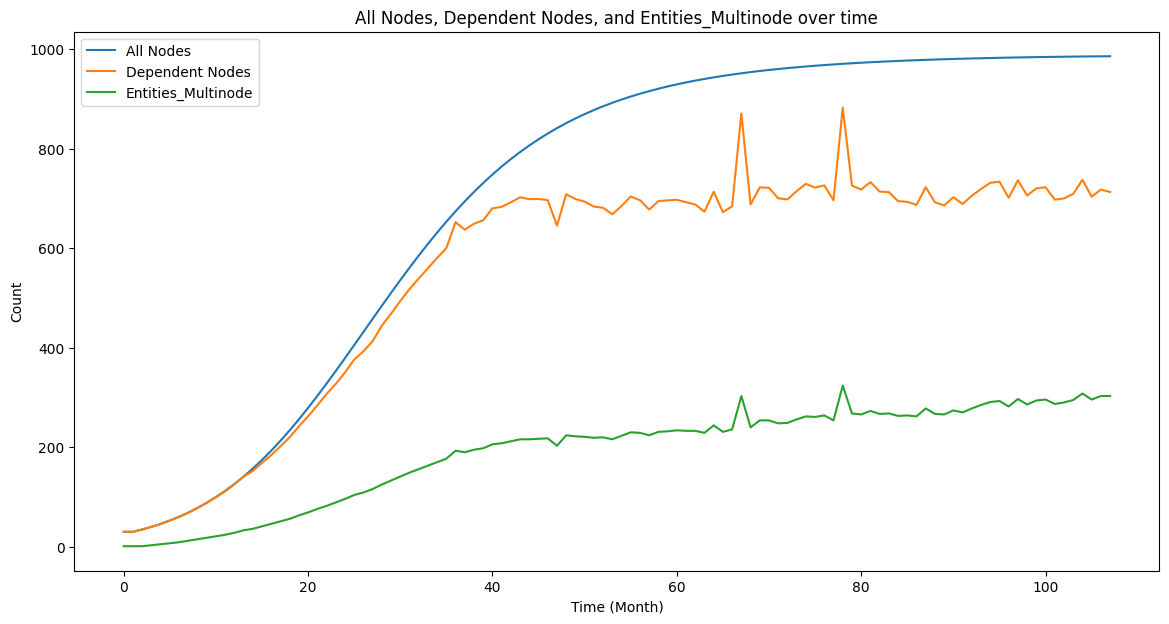

In [81]:
# Define the initial number of entities controlling multiple nodes.
initial_EM = 1

# Initialize a list to store the number of entities controlling multiple nodes at each time step.
Entities_Multinode = [initial_EM]

# Define the distribution for the interest level of entities in controlling multiple nodes.
# This is represented as a power law distribution, which implies that a small number of entities
# have a high interest level while the majority of entities have a lower interest level.
entity_interest = np.random.power(3, size=len(df))

# Define a function that represents how the capability of entities to control multiple nodes changes over time.
# Here, it's assumed that entities become better at controlling nodes over time, so the number of nodes per entity decreases.
# We'll redefine it as an exponential decay to better reflect the comment.
def time_skew(t):
    return np.exp(-t / 200.0)

# Calculate the Entities_Multinode for each time step.
for i in range(1, len(df)):
    # Compute the number of nodes controlled by other entities at this time step.
    dependent_nodes = df.loc[i, 'Dependent_Nodes']
    other_entity_nodes = df.loc[i, 'Other_Entity_Nodes']

    # Compute the number of entities controlling multiple nodes at this time step.
    # This is done by dividing the number of nodes controlled by other entities by the number of nodes per entity,
    # which is assumed to decrease over time due to the time_skew function.
    new_EM = max(initial_EM, np.floor(other_entity_nodes / (4 * time_skew(i))))
    Entities_Multinode.append(new_EM)

# Store the calculated number of entities controlling multiple nodes in the DataFrame.
df['Entities_Multinode'] = Entities_Multinode

# Plotting the results
plt.figure(figsize=(14,7))

# Plotting All Nodes
plt.plot(df['Month'], df['Nodes'], label='All Nodes')

# Plotting Dependent Nodes
plt.plot(df['Month'], df['Dependent_Nodes'], label='Dependent Nodes')

# Plotting Entities_Multinode
plt.plot(df['Month'], df['Entities_Multinode'], label='Entities_Multinode')

plt.legend(loc='upper left')
plt.title('All Nodes, Dependent Nodes, and Entities_Multinode over time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.show()


#### 9.1.2.5 Node Distributions
Here is a description of the algorithm for calculating the distribution of dependent nodes among Entity_Multinodes:

1. **Create an initial array for the Entities**: For a given month, the function **distribute_nodes** initializes an array with size equal to  Multinodes Entity. This array, ArrEntities, will eventually store the number of nodes owned by each entity. The first entity is always the Consortium.

2. **Assign Nodes to the Consortium**: The Consortium, represented by the first element of the ArrEntities array, is assigned nodes according to the 'Consortium_Nodes' column in the DataFrame for the given month.

3. **Calculate the number of High and Low Interest Entities**: The total number of entities (minus the Consortium) is split into two groups: `Entities_High` and `Entities_Low`. `Entities_High` represents entities with high interest, and Entities_Low represents entities with lower interest. The division between high and low interest entities is dynamic, with `Entities_Low` increasing over time from zero to 80% of the total entities.

4. **Assign Nodes to High Interest Entities**: High interest entities are assigned 80% of the available nodes. The exact distribution among the high interest entities follows a **Pareto-like** law: a minority of the high interest entities control a majority (80%) of the nodes. The minimum number of nodes for a high interest entity is set to 3.

8. **Assign Nodes to Low Interest Entities**: If there are any low interest entities, they are assigned the remaining 20% of the nodes, distributed equally among them.

9. **Sort Entities by Nodes Owned**: Finally, the entities are sorted by the number of nodes they own, from highest to lowest, and the updated array is returned.

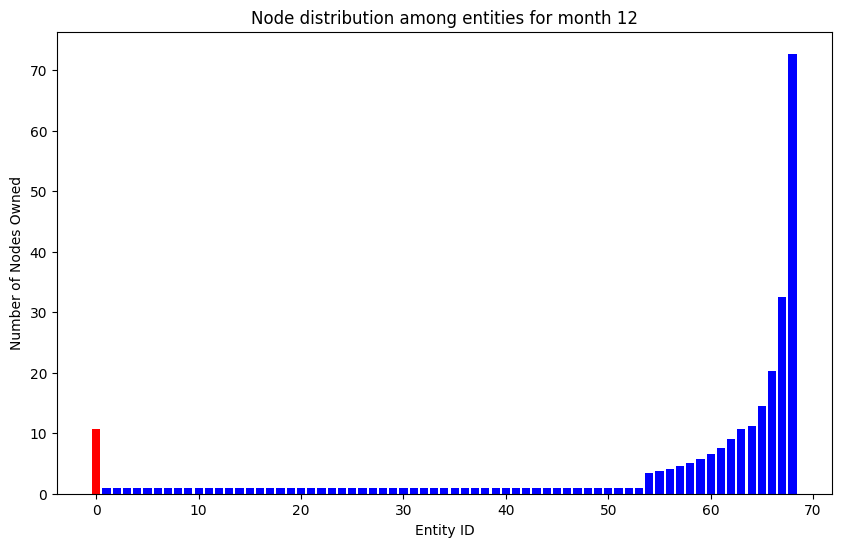

In [82]:
import numpy as np

# Function for generating Pareto distribution
def pareto_distribution(entities, a=1.16):
    """
    entities: array of entity identifiers
    a: shape parameter. a=1.16 is equivalent to 80/20 distribution
    """
    x_m = 1  # scale parameter, minimum value
    distribution = (a - 1) / x_m * (x_m / entities) ** a
    return distribution

def distribute_nodes(month, df):
    # Node assignment to the consortium
    ArrEntities = np.zeros(int(df.loc[month, 'Entities_Multinode']))
    ArrEntities[0] = df.loc[month, 'Consortium_Nodes']  # Indexing starts at 0

    # Entities classification
    total_other_entities = int(df.loc[month, 'Entities_Multinode'] - 1)
    Entities_Low = round(total_other_entities * min(month / 12.0, 0.8))  # Linearly increasing to 80% over a year
    Entities_High = total_other_entities - Entities_Low

    # Node assignment
    total_other_nodes = df.loc[month, 'Other_Entity_Nodes']
    nodes_high = round(total_other_nodes * 0.8)
    nodes_low = total_other_nodes - nodes_high

    # Low entity nodes assignment
    if Entities_Low > 0:
        ArrEntities[-Entities_Low:] = nodes_low / Entities_Low  # Assuming that it is divisible

    # High entity nodes assignment (Pareto Distribution)
    entities_high = np.arange(1, Entities_High + 1)
    distributions_high = pareto_distribution(entities_high)
    normalized_distributions_high = nodes_high * distributions_high / distributions_high.sum()
    ArrEntities[1:Entities_High+1] = normalized_distributions_high

    return ArrEntities

# Example usage:
# Get the array for a specific month, e.g. 12
ArrEntities = distribute_nodes(20, df)

# Plotting
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(ArrEntities)
sorted_ArrEntities = ArrEntities[sorted_indices]
plt.bar(range(len(sorted_ArrEntities)), sorted_ArrEntities, color='blue')
plt.bar(0, ArrEntities[0], color='red')  # Highlight the consortium
plt.xlabel('Entity ID')
plt.ylabel('Number of Nodes Owned')
plt.title(f'Node distribution among entities for month {12}')
plt.show()


####9.1.2.6 Maximum of Dependeced Nodes
Main limitations of the algorithm include:

1. Entities are treated as discrete whole numbers, which limits the flexibility of the model.
2. Distribution of nodes is based on the Pareto principle, which may not be accurate in every scenario.
3. Low-interest entities are assumed to be identical and share nodes equally.
4. Entities' interest levels are static and do not change over time.
5. Once nodes are distributed to entities, there is no mechanism for reallocation in future periods.
6. The algorithm assumes entities get better at controlling nodes over time, which may not always be the case.
7. The algorithm relies heavily on the proper initialization and accuracy of the input DataFrame.

With respect to the behavior of the system, the algorithm indeed captures some common aspects of economic agent behavior in a hybrid network.

Initially, the consortium has dominance, controlling a majority of the nodes. This might reflect the early stage of network development where a few key entities are essential for setting up and maintaining the network. The consortium has the resources and expertise needed to control more nodes, thus exerting significant influence on the network.

Over time, however, as more entities join the network, the maximum number of nodes owned by a single entity increases, suggesting the entry of other large participants. This could reflect the maturation of the network and the diversification of node ownership. The system becomes more decentralized as more entities become capable of controlling a significant number of nodes.

Eventually, the growth in the maximum number of nodes fades, becoming symmetrical to the behavior of the total number of nodes. This could indicate a stabilization period where the network has reached a more balanced state. The influence of large entities is less pronounced, and small participants with fewer nodes become more relevant. This shift could be due to a variety of factors, including changing market dynamics, increased competition, and regulatory interventions.


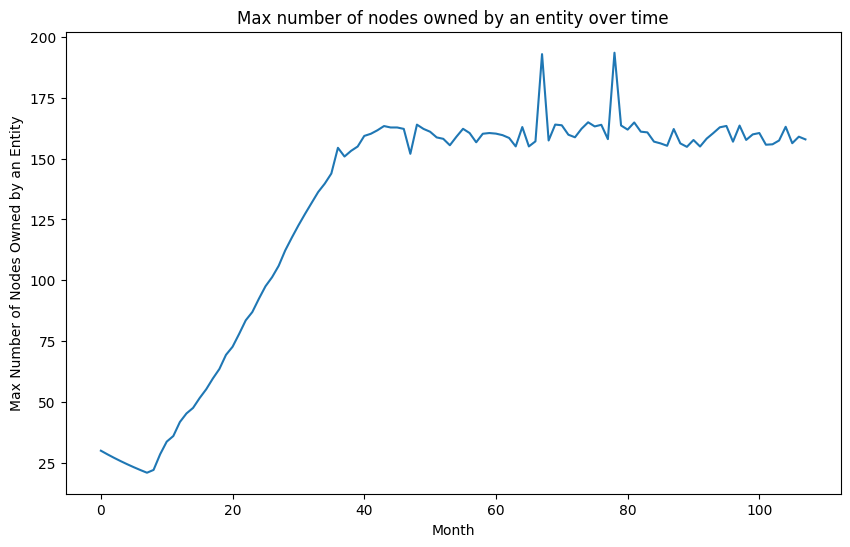

In [83]:
# Calculate the max nodes for each month and store it in 'max_nodes' column
df['max_nodes'] = [np.max(distribute_nodes(month, df)) for month in df['Month']]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['max_nodes'])
plt.xlabel('Month')
plt.ylabel('Max Number of Nodes Owned by an Entity')
plt.title('Max number of nodes owned by an entity over time')
plt.show()



####9.1.2.7 Node Diversity Index
These indices can provide a comprehensive picture of the level of decentralization in the network. They each highlight different aspects of decentralization - the number of entities, the distribution of nodes among these entities, and the dominance of the largest entity. Together, they can provide a more nuanced understanding of decentralization than any single index.

1. **Shannon Diversity Index (SDI)**: This index is a measure of diversity in a system and is borrowed from the field of ecology where it's used to quantify the biodiversity of ecosystems. In this context, the SDI measures the diversity in node distribution among different economically independent entities.

- The index is calculated by summing the products of the proportion of nodes controlled by each entity and the natural logarithm of this proportion, and then taking the negative of this sum.
- A higher SDI indicates a higher level of diversity, meaning that the nodes are more evenly distributed among the entities. A lower SDI indicates a lower level of diversity, meaning that a few entities control most of the nodes.
- This index is important for decentralization as it measures not only the number of entities in the network, but also how the nodes are distributed among these entities. A network can have many entities, but if a few entities control most of the nodes, it's not very decentralized.
2. **Node Diversity Index (NDI)**: This index represents the diversity in node distribution adjusted for the total number of entities. It's a variation of the Shannon Diversity Index.

- The NDI is calculated by dividing the Shannon Diversity Index by the natural logarithm of the number of entities.
- The NDI ranges between 0 (no diversity, all nodes are controlled by one entity) and 1 (maximum diversity, nodes are evenly distributed among all entities).
- This index is also important for decentralization as it gives a measure of diversity that's adjusted for the number of entities. This allows for better comparisons between networks of different sizes.
3. **Largest Entity Node Ratio (LE Ratio)**: This index represents the proportion of nodes controlled by the largest entity in the network.

- The LE Ratio is calculated by dividing the number of nodes controlled by the largest entity by the total number of nodes.
- The LE Ratio ranges between 0 (the largest entity controls none of the nodes) and 1 (the largest entity controls all nodes).
- This index provides a simple measure of decentralization. A lower LE Ratio indicates a more decentralized network, while a higher LE Ratio indicates a less decentralized network. This is because in a decentralized network, no single entity should control a large proportion of the nodes.

<ipython-input-84-2e7b214dfe2b>:15: RuntimeWarning: invalid value encountered in double_scalars
  NDI = SDI / np.log(len(node_distribution))


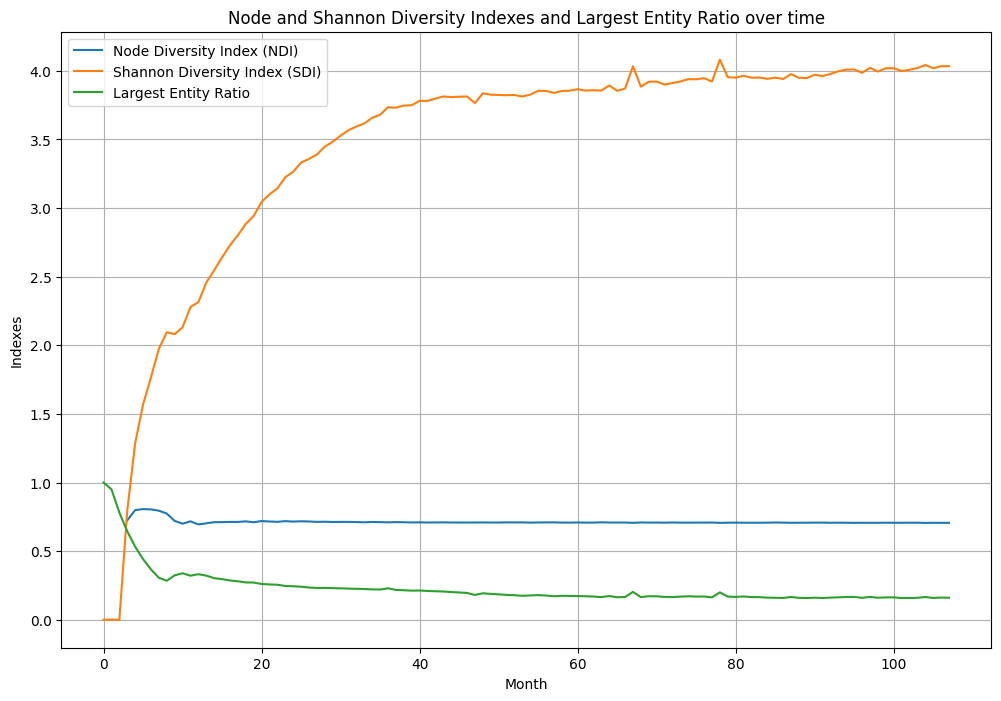

In [84]:
# Helper function to compute Shannon Diversity Index
def compute_SDI(arr):
    total = np.sum(arr)
    proportions = arr / total
    return -np.sum(proportions * np.log(proportions))

# Initialize lists to store SDI and NDI values
SDI_values = []
NDI_values = []

# Loop over each month to calculate SDI and NDI
for i in df['Month']:
    node_distribution = distribute_nodes(i, df)
    SDI = compute_SDI(node_distribution)
    NDI = SDI / np.log(len(node_distribution))

    SDI_values.append(SDI)
    NDI_values.append(NDI)

# Add SDI and NDI to the dataframe
df['SDI'] = SDI_values
df['NDI'] = NDI_values

# Calculate the proportion of nodes controlled by the largest entity
df['Largest_Entity_Ratio'] = df['max_nodes'] / df['Nodes']

# Plotting
plt.figure(figsize=(12,8))

plt.plot(df['Month'], df['NDI'], label='Node Diversity Index (NDI)')
plt.plot(df['Month'], df['SDI'], label='Shannon Diversity Index (SDI)')
plt.plot(df['Month'], df['Largest_Entity_Ratio'], label='Largest Entity Ratio')

plt.xlabel('Month')
plt.ylabel('Indexes')
plt.legend()
plt.title('Node and Shannon Diversity Indexes and Largest Entity Ratio over time')
plt.grid(True)
plt.show()


###9.1.3 Token distribution
This metric gauges the dispersion of token holdings among participants in the network. Traditionally, one might employ the Gini coefficient, a statistical measure of dispersion, for this purpose. The Gini coefficient reflects the degree of equality or inequality within a distribution - a Gini coefficient of 0 corresponds to perfect equality (all participants hold an equal number of tokens), while a coefficient of 1 indicates maximum inequality (one participant holds all the tokens). The Gini coefficient's computation involves evaluating the cumulative distribution of token holders against their respective token balances. To track changes in token distribution, this index can be calculated at regular time intervals.

However, in our specific scenario, we opt for a less complex approach due to the constrained computational resources of Jupyter and the intended modeling nature of the calculations. Here, we consider three participant categories that contribute to token distribution: the consortium, nodes, and users.

- The **consortium** that initialized the network, despite not being a wholly centralized participant, is treated as a single entity.

- **Nodes**, which accrue tokens via a minting mechanism, have a number that increases following a set model. We model the distribution of nodes as a stochastic process, where at the inception, nodes with a high transaction processing rate (usually owned by the consortium) dominate. Over time, these are gradually overshadowed by other participants. By the end, a few leader nodes emerge, controlling a substantial percentage of the network's transactions. As transactions equate to SLA in our model, this also leads to a significant accumulation of tokens by these nodes. However, nodes in our model continually distribute their tokens to users.

- **Users** store tokens in their accounts (sometimes for use in DeFi applications). We posit that the distribution of wealth among users changes over time. Initially, a minority of users control the majority of wealth, but over time, this concentration dilutes, although it remains roughly normally distributed. This deterministic modeling approach significantly simplifies our calculations. An alternative would be a stochastic approach, which we are implementing outside of this Jupyter Notebook.

- Lastly, we operate on the assumption that the **consortium**, having initially received 20% of the tokens, gradually diminishes its dominance. According to a fixed off-chain policy established at the network's inception, the consortium progressively distributes its tokens.

This simplified approach allows for an understanding of the overall inequality dynamics and can be used as a quick and intuitive tool for decision-making based on observed trends. While it does not capture the intricacies of token distribution as accurately as the Gini or Theil indices might, it serves as a feasible alternative in a resource-constrained or model-focused scenario.

####9.1.3.1 Transaction Reward Rate
**Transaction Reward Rate** (TRR), represents the average number of tokens rewarded per transaction processed in the network. This value is derived from the token supply allocated for Service Level Agreement (**SLA**) rewards, divided by the total number of transactions (TX) processed in the network in a given time period.

This characteristic is crucial as it represents the economic incentive for nodes to participate in transaction processing. Essentially, it's the **'payment'** a node receives for each transaction it processes. Therefore, this value has both economic and operational significance in the network.

The dramatic drop in the transaction reward rate over time can be interpreted from two perspectives:

- **Economic perspective**: Initially, when the network is young and there are only a few nodes, the reward per transaction is high to incentivize early adopters. As the network matures and more nodes join, the token supply for rewards might be spread across a higher number of transactions, which would result in a lower reward per transaction.

- **Operational perspective**: In the early stages, each node might be processing fewer transactions due to lower network activity. As the network grows, the number of transactions processed by each node increases, leading to a decrease in the average reward per transaction.

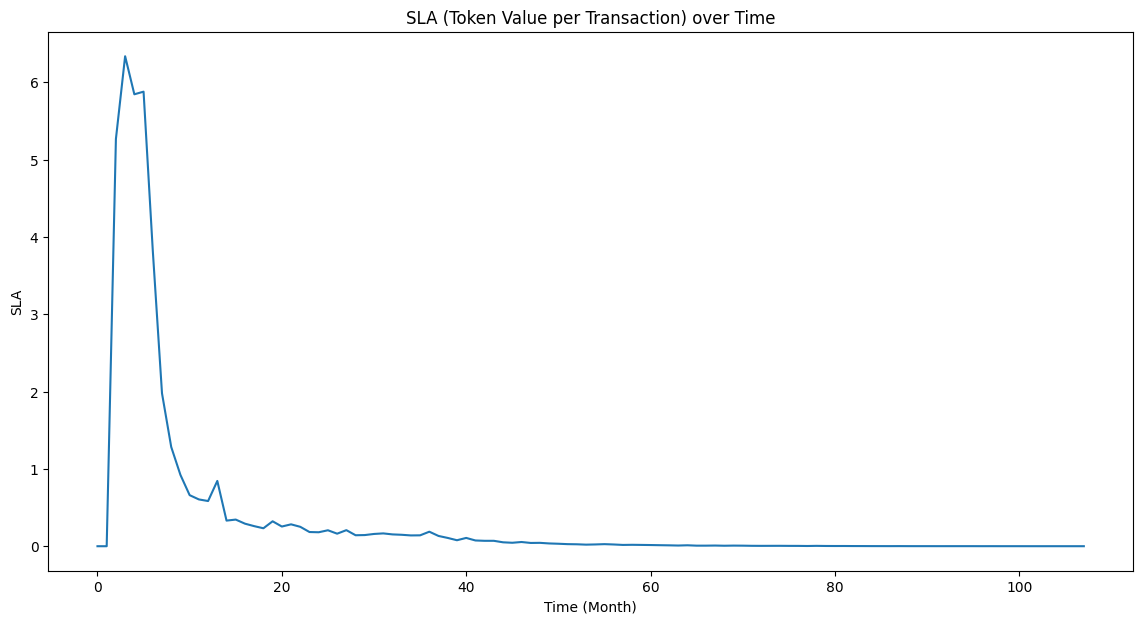

In [85]:
import matplotlib.pyplot as plt

# Calculate SLA
df['SLA'] = df['S_SLA'] / df['TX']

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(df['Month'], df['SLA'])
plt.title('SLA (Token Value per Transaction) over Time')
plt.xlabel('Time (Month)')
plt.ylabel('SLA')
plt.show()


####9.1.3.2 Transaction distribution
Transaction distribution is a key component in our blockchain economic model. Our approach emphasizes fairness, transparency, and sustainability, aiming to ensure the network's viability and prosperity over the long term.

Our model assumes that the number of transactions processed by each node is not uniformly distributed. Instead, it depends on the node's activity level. We categorize nodes into two groups - "highly active" and "moderately active".

Highly active nodes are nodes that frequently participate in transaction validation and are an integral part of the network's operation. The proportion of these nodes decreases over time, from 100% at the network's inception to 20% at later stages.

Moderately active nodes represent the balance of nodes in the network. Their share increases over time as the network matures and more nodes share the workload.

Transactions are distributed between these two groups according to their activity levels, and this distribution evolves as the network matures. At the start, all nodes are considered highly active and handle all transactions. As the network grows and more nodes join, transactions start getting distributed among a larger pool of nodes.

The number of transactions processed by each node within a group is not fixed. Instead, we employ a stochastic process (specifically, a normal distribution with added Gaussian noise) to simulate the natural variability in the number of transactions a node might process. This introduces a realistic degree of randomness into our model, allowing for a more nuanced and accurate representation of a live blockchain network.

This transaction distribution model is vital for calculating the tokens earned by nodes as a reward for their contribution to the network. It also forms the basis for determining the flow of tokens within the network ecosystem, including the amount of tokens transferred to users. Thus, it plays a central role in shaping the economic dynamics of our simulated blockchain environment.

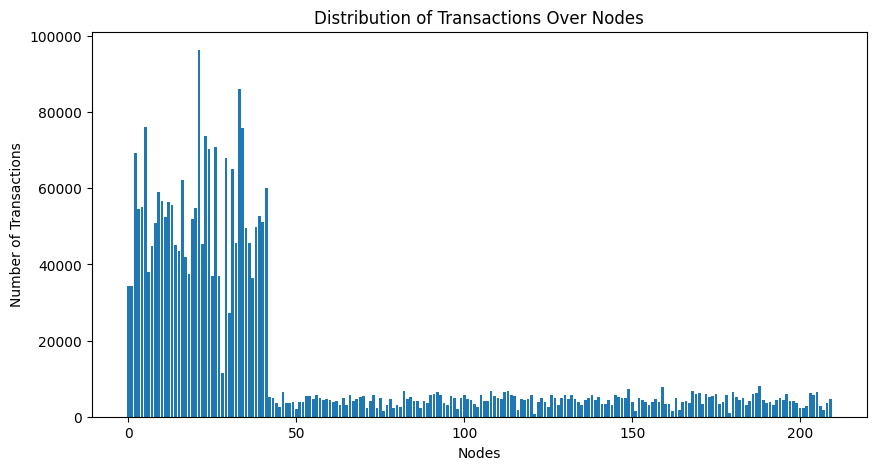

In [86]:
def redistribute_transactions(transactions):
    # Calculate mean of transactions
    mean_tx = np.mean(transactions)

    # Generate Gaussian noise with a standard deviation of 30% of the mean
    noise = np.random.normal(scale=0.3*mean_tx, size=len(transactions))

    # Add the noise to the transactions
    redistributed_transactions = transactions + noise

    # Make sure the redistributed transactions are non-negative
    redistributed_transactions = np.where(redistributed_transactions < 0, 0, redistributed_transactions)

    return redistributed_transactions


def get_highly_active_nodes(month, total_nodes):
    # Define skewness rate
    Transaction_Skew_Rate = min(month / 12, 1)  # Assuming 12 months in a year, and capping at 1

    # Calculate the number of highly active nodes
    # Highly active nodes decrease from 100% to 20%
    Highly_Active_Nodes = int((1 - 0.8 * Transaction_Skew_Rate) * total_nodes)

    return Highly_Active_Nodes


def get_transaction_distribution(month, total_tx, total_nodes):
    # Determine the average of all transactions
    avg_tx = total_tx/total_nodes

    # Determine the average transaction for moderately active nodes
    moderately_avg_tx = 0.3 * avg_tx

    # Get the number of highly active nodes
    highly_active_nodes = get_highly_active_nodes(month, total_nodes)

    # Get the moderately active nodes
    moderately_active_nodes = total_nodes - highly_active_nodes

    # Determine the number of transactions for low nodes
    moderately_active_node_tx = moderately_avg_tx * moderately_active_nodes

    # Determine the number of transactions for high nodes
    highly_active_node_tx = total_tx - moderately_active_node_tx

    return highly_active_node_tx, moderately_active_node_tx


def distribute_transactions_stochastic(month, df):
    total_tx = df['TX'][month]
    total_nodes = df['LuckyNodes'][month]

    # Get the transaction distribution for highly active nodes and moderately active nodes
    highly_active_node_tx, moderately_active_node_tx = get_transaction_distribution(month, total_tx, total_nodes)

    # Get the number of highly active nodes
    highly_active_nodes = get_highly_active_nodes(month, total_nodes)

    # Get the moderately active nodes
    moderately_active_nodes = total_nodes - highly_active_nodes

    # Initialize transaction arrays
    transactions_highly_active = np.full(int(highly_active_nodes), highly_active_node_tx / highly_active_nodes)
    transactions_moderately_active = np.full(int(moderately_active_nodes), moderately_active_node_tx / moderately_active_nodes)

    # Apply the stochastic redistribution
    transactions_highly_active = redistribute_transactions(transactions_highly_active)
    transactions_moderately_active = redistribute_transactions(transactions_moderately_active)

    # Combine the two arrays
    transactions = np.concatenate((transactions_highly_active, transactions_moderately_active))

    return transactions



# Test the function with a specific month
month = 20
transactions = distribute_transactions_stochastic(month, df)

# Create an array representing nodes
nodes = np.arange(len(transactions))

# Plot the distribution of transactions over nodes
plt.figure(figsize=(10, 5))
plt.bar(nodes, transactions)
plt.xlabel('Nodes')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions Over Nodes')
plt.show()

####9.1.3.3 NODES-USERS TOKEN FLOW

The computational model presented here illustrates the flow and distribution of tokens within a blockchain network, accounting for both nodes and users as primary actors. This token circulation process is an integral part of the blockchain economy, maintaining its health and stability.

Nodes are the key elements that support network functionality by verifying transactions and adding them to the blockchain. Their efforts are rewarded by a minting mechanism that provides them with tokens in return for their contribution. The reward is determined by the Transaction Reward Rate, which we have previously defined in our calculations.

In each month, nodes receive tokens based on the total number of transactions they validate. This creates an incentive mechanism for nodes to actively contribute to the network and its security.

However, nodes do not hoard these tokens indefinitely. They put these tokens back into circulation in the economy, thereby contributing to the liquidity and stability of the token in the marketplace. Nodes may sell these tokens for fiat currency, use them to pay for expenses, or distribute them in other ways. For the purposes of our model, we consider that nodes, on average, spend a certain percentage of their token holdings every month. This spending rate is a parameter in our model.

The tokens not spent by nodes accumulate over time, leading to an increasing balance of tokens on their wallets. This represents the wealth accumulation by nodes for their service to the network.

Users, on the other hand, receive tokens in two main ways - directly from the consortium and through transactions with nodes. The former is a steady influx determined by the consortium's initial token distribution plan, while the latter depends on the spending habits of nodes.

Our model helps visualize this dynamic interaction between nodes and users over time. The balance of tokens for nodes and users is calculated for each month and then plotted to show the growth and distribution pattern. Understanding this flow of tokens is critical to assess the health and viability of a blockchain network and its economy.

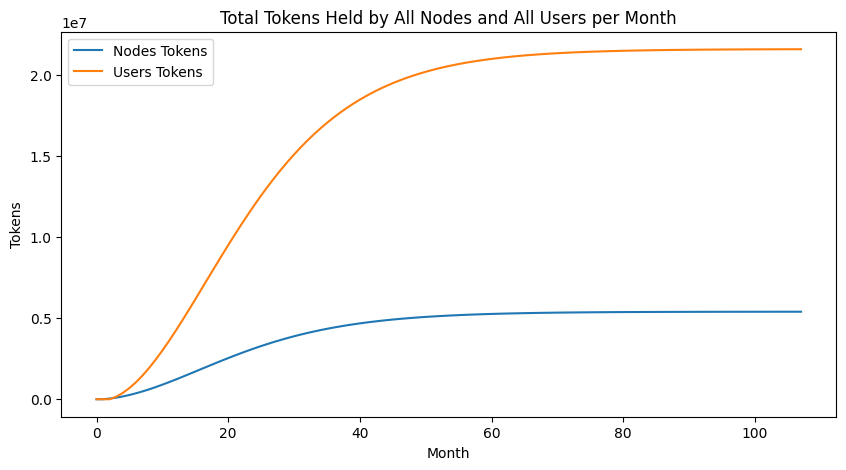

In [87]:
# Define parameters
NODES_SPENDING_RATE = 0.8
NODES_SAVING_RATE = 1 - NODES_SPENDING_RATE

# Calculate the amount of tokens all nodes earn each month
df['Nodes_Earnings'] = df['TX'] * df['SLA']

# Calculate the amount of tokens all nodes spend each month
df['Nodes_Spending'] = df['Nodes_Earnings'].shift().fillna(0) * NODES_SPENDING_RATE

# Calculate the amount of tokens all nodes hold each month
df['Nodes_Tokens'] = df['Nodes_Earnings'].cumsum() * NODES_SAVING_RATE

# Calculate the amount of tokens all users hold each month
df['Users_Tokens'] = df['Nodes_Spending'].cumsum()

# Plot the total tokens held by all nodes and all users each month
plt.figure(figsize=(10, 5))
plt.plot(df['Nodes_Tokens'], label='Nodes Tokens')
plt.plot(df['Users_Tokens'], label='Users Tokens')
plt.xlabel('Month')
plt.ylabel('Tokens')
plt.title('Total Tokens Held by All Nodes and All Users per Month')
plt.legend()
plt.show()


####9.1.3.4 CONSORTIUM-USERS TOKEN FLOW

<Axes: >

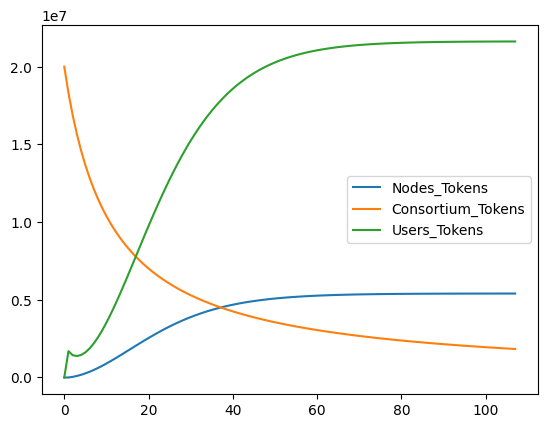

In [88]:
distribution_rate = 10  # or whatever value you wish to use
def calculate_consortium_tokens_hyperbolic(S_immidiate_distributed, max_months, distribution_rate, month):
    # Avoid division by zero error
    if month == 0:
        return S_immidiate_distributed
    # Normalized month to range between 0 and 1
    norm_month = month / max_months

    # Calculate the remaining tokens using a hyperbolic function
    tokens = S_immidiate_distributed * (1 / (1 + norm_month * distribution_rate))

    # Return the remaining tokens
    return tokens

# Calculate the consortium's token balance for each month
df['Consortium_Tokens'] = df['Month'].apply(lambda x: calculate_consortium_tokens_hyperbolic(S_immidiate_distributed, len(df), distribution_rate, x))
# Calculate the consortium's token distribution for each month
df['Consortium_Distribution'] = df['Consortium_Tokens'].shift(fill_value=S_immidiate_distributed) - df['Consortium_Tokens']

# Add the consortium's distribution to the users' token balance
df['Users_Tokens'] += df['Consortium_Distribution']

# Plot the token balances of the nodes, the consortium, and the users over time
df[['Nodes_Tokens', 'Consortium_Tokens', 'Users_Tokens']].plot()



####9.1.3.5 User's  token distribution

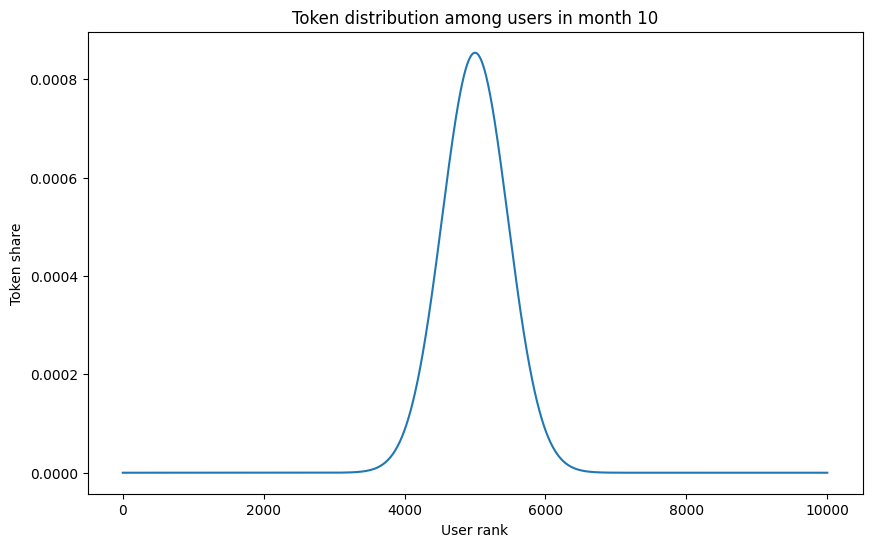

In [89]:
import numpy as np
from scipy.stats import norm

def calculate_user_share(n_users, month, user_rank):
    """
    Calculate the token share for a given user rank in a specific month.

    Parameters:
    - n_users: Total number of users.
    - month: Current month.
    - user_rank: Rank of the user.

    Returns:
    - The token share for the user.
    """
    # Parameters for the distribution's shape
    peak = n_users / 2  # The peak is at the middle user
    scale = month * n_users / (total_months * 2)  # The distribution gets wider over time

    # Calculate the density of the normal distribution at the user's rank
    density = norm.pdf(user_rank, peak, scale)

    # Normalize the density to get a share of total tokens
    share = density / norm.pdf(np.arange(1, n_users + 1), peak, scale).sum()

    return share
# Define the number of users and the month to plot
n_users = 10000
month = 10
total_months = df['Month'].max()

# Create a list of all user ranks
user_ranks = np.arange(1, n_users + 1)

# Calculate the token share for each user
token_shares = [calculate_user_share(n_users, month, rank) for rank in user_ranks]

# Plot the token shares
plt.figure(figsize=(10, 6))
plt.plot(user_ranks, token_shares)
plt.xlabel('User rank')
plt.ylabel('Token share')
plt.title('Token distribution among users in month {}'.format(month))
plt.show()


####9.1.3.6  TDI Practical Calculation
The provided algorithm serves as an alternative to the well-known GINI or Theil indices, often used to measure inequality. These traditional indices use sophisticated mathematical approaches to accurately describe wealth distribution. However, their complexity can sometimes mask the overall trends and hide the "big picture".

Instead, the algorithm we developed uses a simpler, yet still valuable, approach to measure token distribution inequality. Specifically, it calculates a ratio between the sum of tokens held by the bottom percentage of holders and the sum held by the top percentage of holders.

This approach gives a clear and direct indicator of wealth disparity within the token holders. When the index is close to 1, it indicates that the wealth distribution is more equal, as the sums held by the top and bottom percentage are similar. On the other hand, when the index is significantly lower than 1, it suggests that the top holders possess substantially more tokens than those at the bottom.

Additionally, rather than dynamically calculating user share distributions, this algorithm employs a deterministic approach. This means we assume a predefined, known evolution of the token distribution among users, moving from 10% of users holding 90% of tokens at the beginning, to 40% of users holding 60% at the end.

This deterministic approach is not only more computationally efficient, it also aligns well with real-world scenarios, where the distribution of wealth can often follow predictable trends due to certain economic or policy factors. Of course, the assumed distribution can be easily adjusted to model different situations.

It's important to note that this method provides a simplified view of the distribution and may overlook some nuances of the token distribution process. Nevertheless, it offers a valuable tool to quickly and intuitively understand the overall inequality dynamics, enabling swift decision-making based on the observed trends.


<ipython-input-86-8b18f9d2a63c>:65: RuntimeWarning: invalid value encountered in double_scalars
  transactions_moderately_active = np.full(int(moderately_active_nodes), moderately_active_node_tx / moderately_active_nodes)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time taken: 1688475194.7992177


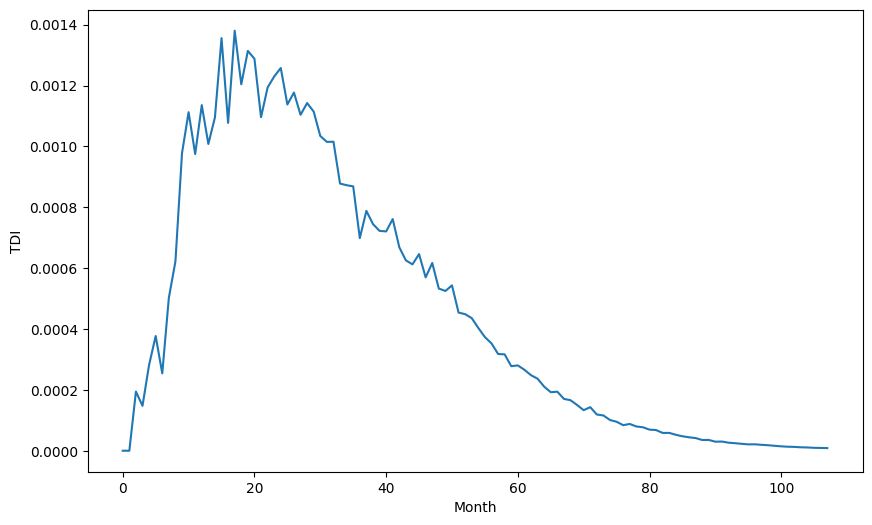

In [90]:
import time

def calculate_optimized_TDI(df):
    start_time = time.process_time()
    df['TDI'] = np.nan

    for month in df['Month']:
        # Calculate shares for nodes
        n_nodes = int(df.loc[month, 'LuckyNodes'])
        transactions = distribute_transactions_stochastic(month, df)
        node_earnings = transactions * df.loc[month, 'SLA']

        # Calculate shares for users
        total_user_tokens = df.loc[month, 'Users_Tokens'] * df.loc[month, 'SLA']
        top_percentage = 0.1 + 0.3 * month / df['Month'].max()  # Adjust as per the given evolution
        bottom_percentage = 1 - top_percentage
        top_sum = top_percentage * total_user_tokens
        bottom_sum = bottom_percentage * total_user_tokens

        # Shares for the consortium
        consortium_share = df.loc[month, 'Consortium_Tokens']

        # Create an array with node earnings, top and bottom user sums, and consortium share
        all_sums = np.concatenate([node_earnings, [top_sum, bottom_sum, consortium_share]])

        # Calculate TDI
        sorted_sums = np.sort(all_sums)
        percentage_index = int(all_sums.size * 0.1)

        low_10_percent = sorted_sums[:percentage_index].sum()
        high_10_percent = sorted_sums[-percentage_index:].sum() if percentage_index > 0 else 1

        df.loc[month, 'TDI'] = low_10_percent / high_10_percent

    print("Time taken:", time.time() - start_time)

calculate_optimized_TDI(df)
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['TDI'])
plt.xlabel('Month')
plt.ylabel('TDI')
plt.show()


Take note that our model suggests an increasing level of decentralization in terms of token distribution during the first third of the network's lifespan. Following this, however, the level of decentralization appears to decrease and stabilizes at a certain point. This trend reflects the nature of our simplified metric: it measures the disparity between the 'wealthiest' and the 'poorest' in the network. It is common in interactive networks for a significant portion of the gains to accrue to a small number of participants.

However, the absolute values provided by this simplified index are less reflective of the true level of decentralization. If we were to assess decentralization using a more sophisticated tool like the Gini coefficient, which considers the distribution of averages, we would likely find a higher level of decentralization. Therefore, while our simplified measure offers a broad-brush indication of decentralization trends, it doesn't capture the full depth and complexity of token distribution within the network.

###9.1.4 Consortium Influence Index (CII)
This index shows the proportion of tokens that are held by the consortium compared to the total number of tokens in the network.

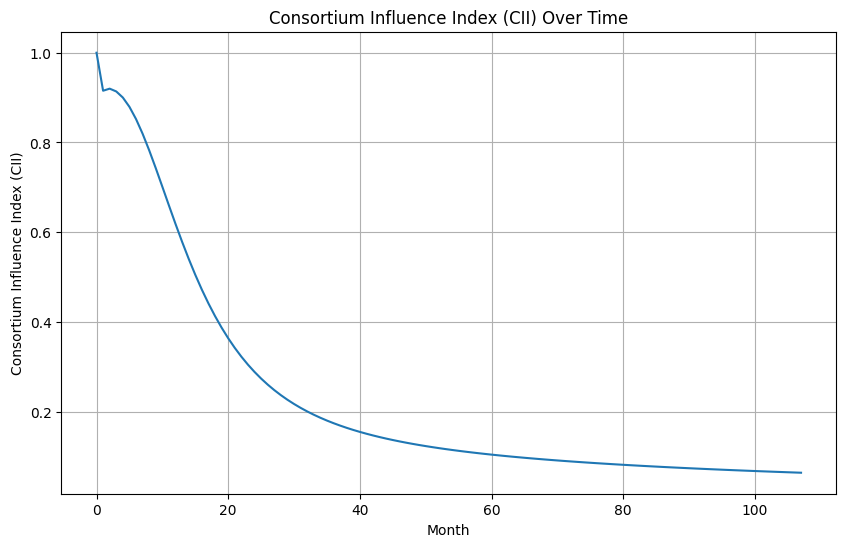

In [91]:
import matplotlib.pyplot as plt

# Calculate the Consortium Influence Index (CII)
df['CII'] = df['Consortium_Tokens'] / (df['Users_Tokens'] + df['Nodes_Tokens'] + df['Consortium_Tokens'])

# Plot the CII over time
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['CII'])
plt.xlabel('Month')
plt.ylabel('Consortium Influence Index (CII)')
plt.title('Consortium Influence Index (CII) Over Time')
plt.grid(True)
plt.show()


###9.1.5 Calculation of Decentralization Metric
The Decentralization Metric is a combined measure that reflects the overall level of decentralization within a network or system. It's an aggregate measure of several factors:

- **Token Distribution Index** (TDI): This factor represents the degree of inequality in the distribution of tokens amongst participants in the network. A higher TDI indicates more inequality, i.e., tokens are concentrated in the hands of a few, which suggests a more centralized system. A lower TDI suggests a more equitable distribution, indicating a more decentralized system.

- **Node Diversity Index** (NDI): This factor represents the diversity among active nodes in the network. A higher NDI indicates less diversity, which can mean that a few nodes are dominating the network, suggesting a more centralized system. A lower NDI indicates more diversity amongst nodes, pointing towards a more decentralized system.

- **Consortium Influence Index** (CII): This factor quantifies the degree of influence the consortium (or any centralized authority) has on the overall system. A higher CII indicates a more centralized system, where the consortium holds more power. A lower CII indicates a more decentralized system.

- **Active Node Index** (ANI): This factor represents the proportion of nodes that are active within the network. A higher ANI indicates more active participation, suggesting a more decentralized system.

The Decentralization Metric $D_C^M$ is calculated as a weighted sum of these factors, each contributing according to its predefined weight. It's calculated as follows:

$$D_C^M = (1 - TDI) + (1 - NDI) + (1 - CII) + ANI \tag{39}$$

Each index is subtracted from 1 (except ANI) so that a higher value of the metric indicates more decentralization. The values are then normalized by dividing by the sum of the weights to ensure the metric lies between 0 and 1.

The growth of this metric over time would indicate an increasing level of decentralization within the system. Conversely, a decline in this metric would indicate increasing centralization. It's important to note that while this metric provides a holistic view of the system's decentralization, it's a simplification and may not capture all nuances related to decentralization.

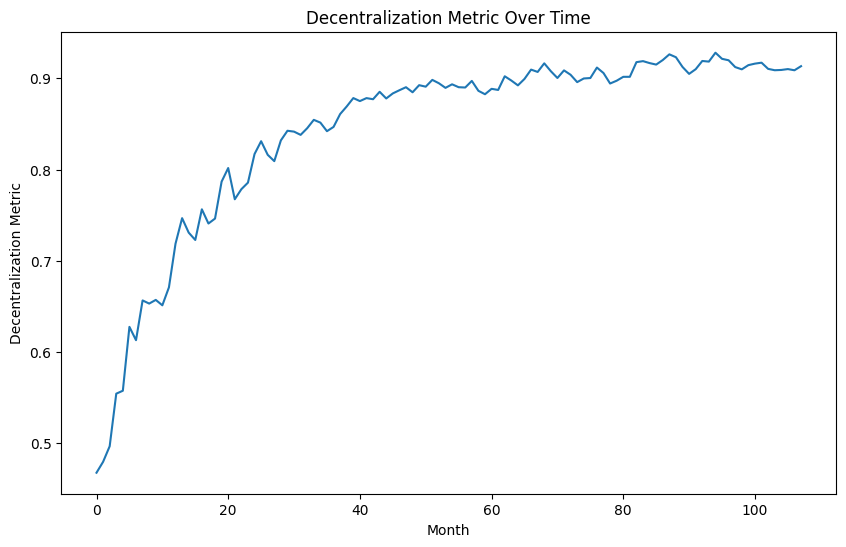

In [92]:
# Define the weights
weights = {
    'TDI': 0.25,
    'Largest_Entity_Ratio': 0.25,  # This is NDI
    'CII': 0.25,
    'ANI': 0.25
}

# Calculate the weighted decentralization metric
df['Decentralization_Metric'] = 0
for index, weight in weights.items():
    df['Decentralization_Metric'] += weight * (1 - df[index] if index != 'ANI' else df[index])

# Normalize the decentralization metric
df['Decentralization_Metric'] /= sum(weights.values())

# Plot the decentralization metric over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Decentralization_Metric'])
plt.xlabel('Month')
plt.ylabel('Decentralization Metric')
plt.title('Decentralization Metric Over Time')
plt.show()



## 9.2 Agregated Metrics

###9.2.1 Transaction Throughput
Transaction Throughput, or Transactions Per Second (TPS), is a measurement used to assess the ability of a network to handle and process transactions. In essence, it quantifies how many transactions a network can process each second.

TPS is a key performance indicator for many traditional centralized systems. In blockchain systems, especially in public networks like Bitcoin or Ethereum, TPS is a critical metric due to the inherent scalability limitations of these systems. Low TPS rates in such systems can lead to slower transaction confirmations and higher transaction costs.

In a hybrid cluster-based network, however, the focus shifts from pure TPS to the scalability and resilience of the network. This is because such networks are designed to increase their capacity as the network grows. In these networks, nodes are grouped into clusters, each of which can process transactions concurrently. As more nodes join the network and form new clusters, the total processing capacity of the network increases.

For this reason, while TPS remains an important metric to measure the performance of individual clusters, it is not the sole determiner of the network's capacity. Other factors, such as the network's ability to add and integrate new clusters, the efficiency of inter-cluster communication, and the network's overall stability and security, also play crucial roles in the overall network performance.

In our model, we calculate TPS as the total number of transactions (TX) divided by the number of seconds in a month. This gives an average TPS for each month, providing a glimpse into the transaction processing capacity of the network over time. However, as described above, it is important to remember that TPS is just one piece of the overall performance picture in a hybrid cluster-based network.

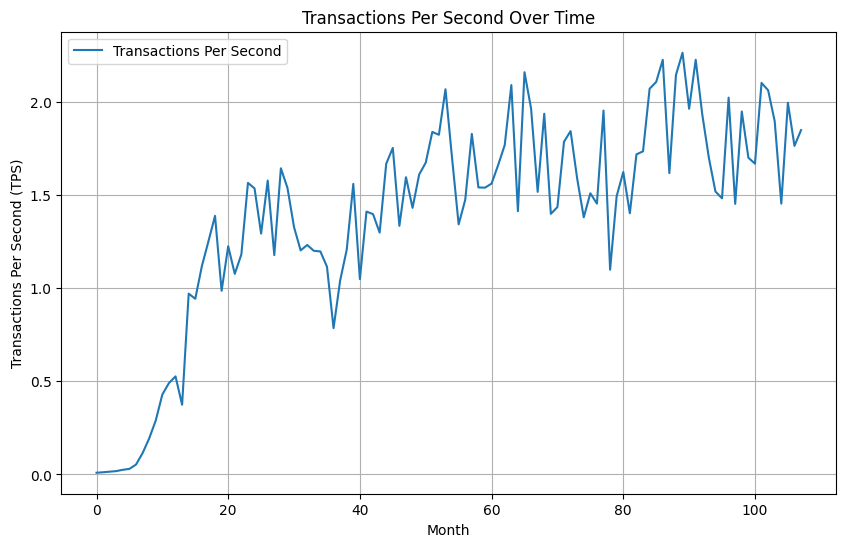

In [93]:
# Constants
SECONDS_IN_MONTH = 30 * 24 * 60 * 60 # Approximate average seconds in a month

# Calculate Transactions per Second (TPS)
df['TPS'] = df['TX'] / SECONDS_IN_MONTH

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['TPS'], label='Transactions Per Second')
plt.xlabel('Month')
plt.ylabel('Transactions Per Second (TPS)')
plt.title('Transactions Per Second Over Time')
plt.legend()
plt.grid(True)
plt.show()


###9.2.2 Market Cap
**Market capitalization** (often shortened to market cap) is a well-established measure of a company's size and value in traditional financial markets. It's calculated by multiplying the company's outstanding shares by the current market price of one share.

In the context of cryptocurrencies, market cap is calculated similarly: it's the product of the **circulating supply** of tokens and the price of each token. Circulating supply refers to the number of tokens that are publicly available and circulating in the market. This differs from the total supply, which includes tokens that may be locked, reserved, or not yet issued.

So, in our model, the market cap is calculated by multiplying the circulating supply $S_{cumulative}$ by the price of the token $P_t$ for each month.

Market cap is a crucial indicator of a cryptocurrency's value and standing in the market. A high market cap often implies a widely used token, and significant investor interest. Comparing market caps can help investors understand the relative size of one cryptocurrency compared to another.

However, it's important to note that market cap, like any other single metric, should not be used in isolation when evaluating a cryptocurrency's value or potential for future growth. It provides a useful snapshot of a token's current value, but it doesn't necessarily reflect the project's potential, the usefulness of its technology, or its user adoption rate.

That's why we use it in our model in conjunction with other metrics, like the Node Diversity Index, Staking Ratio, and Transaction Throughput, to provide a more complete picture of the network's evolution and performance.

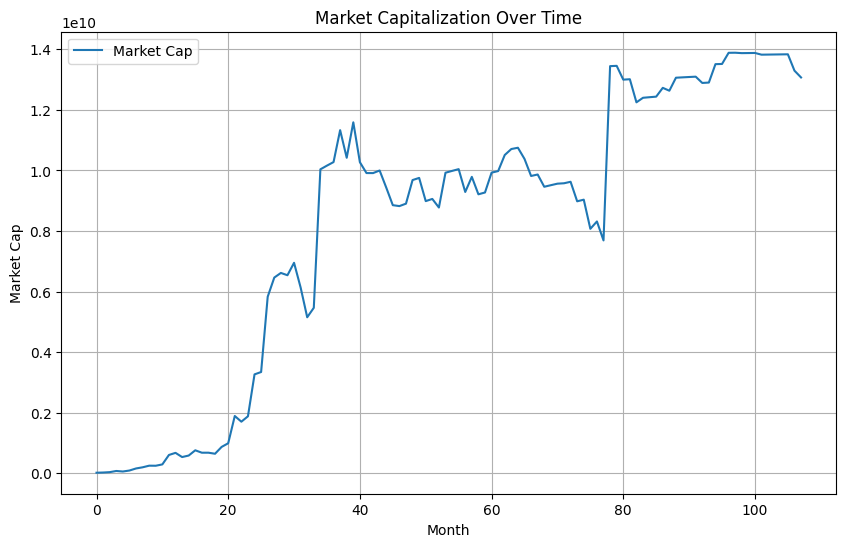

In [94]:
# Calculate Market Cap
df['Market_Cap'] = df['S_cumulative'] * df['P_t']

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['Market_Cap'], label='Market Cap')
plt.xlabel('Month')
plt.ylabel('Market Cap')
plt.title('Market Capitalization Over Time')
plt.legend()
plt.grid(True)
plt.show()


###9.2.3 TVL
**Total Value Locked** (TVL) is a metric widely used in the realm of decentralized finance (**DeFi**) to gauge the size and growth of different DeFi protocols. It measures the total amount of assets currently being staked or locked in a particular protocol, platform, or ecosystem.

In the context of a blockchain network, TVL represents the amount of the network's native tokens that are staked or otherwise committed to the network's operation. It signifies the level of participants' trust and engagement in the network.

The TVL calculation for our model is done by multiplying the staking part $DT_{Staking}$ by the value of the token $P_t$. The staking part represents the demand for tokens for staking in the network. In other words, it's the proportion of total tokens that network participants have chosen to stake. The value of the token is the current market price for a single token.

Thus, TVL in this context would mean the total value (in terms of market price) of all tokens currently being staked in the network. It serves as a measure of the network's security, as a higher TVL would imply a greater level of security due to the larger amount of tokens staked. It also indicates the level of participation and commitment of network participants.

However, like any metric, it has limitations and should be used alongside other metrics to get a comprehensive understanding of the network's state and progress. It provides a snapshot of the network's current state, but does not necessarily reflect its future potential or viability.

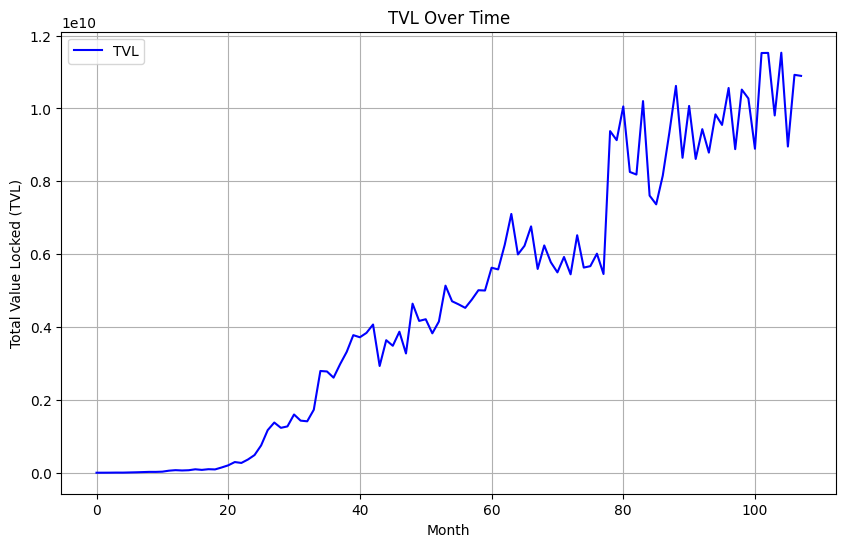

In [95]:
import matplotlib.pyplot as plt

# Calculate the Total Value Locked (TVL)
df['TVL'] = df['DT_Staking'] * df['P_t']

# Plot the TVL
plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['TVL'], label='TVL', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Value Locked (TVL)')
plt.title('TVL Over Time')
plt.legend()
plt.grid(True)
plt.show()


##9.4 Conclusion and Model Insights
This comprehensive model delivers a multi-faceted analysis of a hybrid cluster-based blockchain network, from the perspective of both network growth and economic dynamics. It's designed to bridge the gap between the technology's performance characteristics and its economic outcomes.

The model initiates with an examination of core network parameters - the number of nodes, users, and transactions, each signifying the network's functionality and practical utility. The modelling then transitions to the economic features, specifically, token supply and demand, which drive the economic viability of the network.

It's worth noting that the model is not intended to deliver precise future predictions, but rather, it provides an exploratory tool for understanding how various parameters interact and influence each other. By setting initial and terminal conditions, the model exhibits the network's potential behavior and performance.

A key aspect of this model lies in the computation of composite indices such as network entropy and Network Utility. These metrics allow us to evaluate the network's performance not solely on the basis of endogenous characteristics but also in response to the external environment.
The results of our simulations provide insights into the feasibility of a system operating under given parameters, revealing key findings that could guide future strategies to maintain desired network characteristics.

While this model provides a robust initial analysis, it's still at an early stage of development and includes several assumptions and simplifications. Future plans for this model involve comparing its results with open data and refining underlying parameters and coefficients accordingly. Some sections of the model may require adjustment or further specification. Moreover, additional theoretical generalizations could be incorporated to increase the depth and breadth of the analysis. The long-term vision for this model is to integrate Artificial Intelligence techniques for more sophisticated comparisons with real-world data.

Nonetheless, like any model, this one has limitations. It is primarily deterministic and doesn't incorporate certain stochastic or unpredictable elements that might influence the network's performance. The model also assumes a direct correlation between the number of nodes and the number of users, which might not always hold true. Furthermore, it assumes that all nodes are equally powerful and that they contribute equally to the network, which isn't typically the case in real-world networks. Despite these limitations, this model provides a valuable tool for understanding and exploring the dynamics of a hybrid cluster-based blockchain network.

Remember that the model's key purpose is to provide insights and stimulate further research and investigation into blockchain network economics and growth dynamics, rather than predicting exact future states.

We believe that this model provides a valuable tool for understanding and exploring the dynamics of a hybrid cluster-based blockchain network. The next steps will be to improve and refine the model based on feedback and new data, with the aim of developing a more accurate and useful tool for blockchain network analysis.

This model is currently optimized for Google Colab. The code snippet below, which saves the model output, is specifically designed for this environment and may require modifications if used elsewhere.

In [96]:
import datetime

# Get current date and time
current_datetime = datetime.datetime.now()

# Format the date and time to a string of format "YYYYMMDD_HHMMSS"
datetime_string = current_datetime.strftime("%Y%m%d_%H%M%S")

# Append this string to your filename
FileName = '/content/drive/My Drive/' + Model_Version + '_' + datetime_string + '.csv'

# Save the dataframe to a csv file
df.to_csv(FileName, index=False)
